In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dbfread import DBF
from haversine import haversine
from tqdm.notebook import tqdm
# import matplotlib.font_manager as fm
# font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
# font_list[:]

In [2]:
%matplotlib inline
import platform
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
!pip install dbfread
!pip install haversine

In [4]:
#데이터 연결(성별나이)
age1902= pd.read_csv(r'./4개지역_FLOW_AGE_201902.CSV', sep = '|')
age1903= pd.read_csv(r'./4개지역_FLOW_AGE_201903.CSV', sep = '|')
age1904= pd.read_csv(r'./4개지역_FLOW_AGE_201904.CSV', sep = '|')
age1904= pd.read_csv(r'./4개지역_FLOW_AGE_201905.CSV', sep = '|')
age2002= pd.read_csv(r'./4개지역_FLOW_AGE_202002.CSV', sep = '|')
age2003= pd.read_csv(r'./4개지역_FLOW_AGE_202003.CSV', sep = '|')
age2004= pd.read_csv(r'./4개지역_FLOW_AGE_202004.CSV', sep = '|')
age2005= pd.read_csv(r'./4개지역_FLOW_AGE_202005.CSV', sep = '|')

In [5]:
#데이터 연결(시간)
time1902= pd.read_csv(r'./4개지역_FLOW_TIME_201902.CSV', sep = '|')
time1903= pd.read_csv(r'./4개지역_FLOW_TIME_201903.CSV', sep = '|')
time1904= pd.read_csv(r'./4개지역_FLOW_TIME_201904.CSV', sep = '|')
time1905= pd.read_csv(r'./4개지역_FLOW_TIME_201905.CSV', sep = '|')
time2002= pd.read_csv(r'./4개지역_FLOW_TIME_202002.CSV', sep = '|')
time2003= pd.read_csv(r'./4개지역_FLOW_TIME_202003.CSV', sep = '|')
time2004= pd.read_csv(r'./4개지역_FLOW_TIME_202004.CSV', sep = '|')
time2005= pd.read_csv(r'./4개지역_FLOW_TIME_202005.CSV', sep = '|')

In [6]:
#데이터 연결(지하철역 매칭된 버스정류장 승하차)
bus_train_num_1 = pd.read_csv('./1902버스지하철매칭 월별 승하차 합계.csv', index_col=0)
bus_train_num_2 = pd.read_csv('./1903버스지하철매칭 월별 승하차 합계.csv', index_col=0)
bus_train_num_3 = pd.read_csv('./1904버스지하철매칭 월별 승하차 합계.csv', index_col=0)
bus_train_num_4 = pd.read_csv('./1905버스지하철매칭 월별 승하차 합계.csv', index_col=0)
bus_train_num_5 = pd.read_csv('./2002버스지하철매칭 월별 승하차 합계.csv', index_col=0)
bus_train_num_6 = pd.read_csv('./2003버스지하철매칭 월별 승하차 합계.csv', index_col=0)
bus_train_num_7 = pd.read_csv('./2004버스지하철매칭 월별 승하차 합계.csv', index_col=0)
bus_train_num_8 = pd.read_csv('./2005버스지하철매칭 월별 승하차 합계.csv', index_col=0)

In [7]:
#1~7까지는 id가 있음
bus_col = bus_train_num_1.columns
bus_col

Index(['표준버스정류장ID', '역명', '사용년월', '00시승차총승객수', '00시하차총승객수', '1시승차총승객수',
       '1시하차총승객수', '2시승차총승객수', '2시하차총승객수', '3시승차총승객수', '3시하차총승객수', '4시승차총승객수',
       '4시하차총승객수', '5시승차총승객수', '5시하차총승객수', '6시승차총승객수', '6시하차총승객수', '7시승차총승객수',
       '7시하차총승객수', '8시승차총승객수', '8시하차총승객수', '9시승차총승객수', '9시하차총승객수', '10시승차총승객수',
       '10시하차총승객수', '11시승차총승객수', '11시하차총승객수', '12시승차총승객수', '12시하차총승객수',
       '13시승차총승객수', '13시하차총승객수', '14시승차총승객수', '14시하차총승객수', '15시승차총승객수',
       '15시하차총승객수', '16시승차총승객수', '16시하차총승객수', '17시승차총승객수', '17시하차총승객수',
       '18시승차총승객수', '18시하차총승객수', '19시승차총승객수', '19시하차총승객수', '20시승차총승객수',
       '20시하차총승객수', '21시승차총승객수', '21시하차총승객수', '22시승차총승객수', '22시하차총승객수',
       '23시승차총승객수', '23시하차총승객수', '지하철역'],
      dtype='object')

In [8]:
#8번째는 역명만 있음
bus_col_ = bus_train_num_8.columns
bus_col_

Index(['역명', '사용년월', '00시승차총승객수', '00시하차총승객수', '1시승차총승객수', '1시하차총승객수',
       '2시승차총승객수', '2시하차총승객수', '3시승차총승객수', '3시하차총승객수', '4시승차총승객수', '4시하차총승객수',
       '5시승차총승객수', '5시하차총승객수', '6시승차총승객수', '6시하차총승객수', '7시승차총승객수', '7시하차총승객수',
       '8시승차총승객수', '8시하차총승객수', '9시승차총승객수', '9시하차총승객수', '10시승차총승객수',
       '10시하차총승객수', '11시승차총승객수', '11시하차총승객수', '12시승차총승객수', '12시하차총승객수',
       '13시승차총승객수', '13시하차총승객수', '14시승차총승객수', '14시하차총승객수', '15시승차총승객수',
       '15시하차총승객수', '16시승차총승객수', '16시하차총승객수', '17시승차총승객수', '17시하차총승객수',
       '18시승차총승객수', '18시하차총승객수', '19시승차총승객수', '19시하차총승객수', '20시승차총승객수',
       '20시하차총승객수', '21시승차총승객수', '21시하차총승객수', '22시승차총승객수', '22시하차총승객수',
       '23시승차총승객수', '23시하차총승객수', '지하철역'],
      dtype='object')

In [9]:
#1~7을 위한 승차, 하차 인원만 뽑아주는 col
up_col = ['표준버스정류장ID', '역명', '00시승차총승객수', '1시승차총승객수','2시승차총승객수', '3시승차총승객수', '4시승차총승객수', '5시승차총승객수',  '6시승차총승객수', '7시승차총승객수','8시승차총승객수',  '9시승차총승객수',  '10시승차총승객수','11시승차총승객수',  '12시승차총승객수','13시승차총승객수', '14시승차총승객수',  '15시승차총승객수','16시승차총승객수', '17시승차총승객수','18시승차총승객수', '19시승차총승객수', '20시승차총승객수','21시승차총승객수',  '22시승차총승객수', '23시승차총승객수',  '지하철역']
down_col = ['표준버스정류장ID', '역명', '00시하차총승객수', '1시하차총승객수','2시하차총승객수', '3시하차총승객수', '4시하차총승객수', '5시하차총승객수',  '6시하차총승객수', '7시하차총승객수','8시하차총승객수',  '9시하차총승객수',  '10시하차총승객수','11시하차총승객수',  '12시하차총승객수','13시하차총승객수', '14시하차총승객수',  '15시하차총승객수','16시하차총승객수', '17시하차총승객수','18시하차총승객수', '19시하차총승객수', '20시하차총승객수','21시하차총승객수',  '22시하차총승객수', '23시하차총승객수',  '지하철역']

In [10]:
bus_train_num_1[up_col]

,표준버스정류장ID,역명,00시승차총승객수,1시승차총승객수,2시승차총승객수,3시승차총승객수,4시승차총승객수,5시승차총승객수,6시승차총승객수,7시승차총승객수,...,15시승차총승객수,16시승차총승객수,17시승차총승객수,18시승차총승객수,19시승차총승객수,20시승차총승객수,21시승차총승객수,22시승차총승객수,23시승차총승객수,지하철역
0,100000001,종로2가사거리,181,351,109,339,104,0,256,790,...,591,562,472,547,540,361,532,489,297,종로3가(탑골공원)
1,100000002,창경궁.서울대학교병원,36,2,0,0,1041,1133,1142,3583,...,4312,4881,5414,5542,3581,2835,1448,950,740,혜화
2,100000003,명륜3가.성대입구,482,24,0,0,1067,2285,2012,4035,...,5722,6635,7412,6944,5619,5582,6713,7625,3362,혜화
3,100000004,종로2가.삼일교,69,188,83,113,63,161,98,243,...,1417,1696,1578,1700,1519,1503,1570,1627,620,을지로3가
4,100000005,혜화동로터리.여운형활동터,108,12,0,0,933,1208,1433,2808,...,2196,2293,2444,2338,1699,1402,1563,1607,497,한성대입구(삼선교)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10526,124900106,둔촌푸르지오아파트사거리,0,0,0,0,0,13,191,456,...,462,524,539,609,521,305,224,217,16,길동
10527,124900107,둔촌주공아파트1.4단지후문,0,0,0,0,0,15,111,257,...,133,93,92,103,73,18,35,42,2,둔촌동
10528,124900108,암사삼성.현대아파트,1,0,0,0,0,0,34,246,...,128,142,179,258,269,169,98,89,45,암사
10529,124900111,가래여울,0,0,0,0,0,0,0,1,...,2,0,1,0,2,2,2,0,0,고덕


In [11]:
bus_train_num_1[down_col]

,표준버스정류장ID,역명,00시하차총승객수,1시하차총승객수,2시하차총승객수,3시하차총승객수,4시하차총승객수,5시하차총승객수,6시하차총승객수,7시하차총승객수,...,15시하차총승객수,16시하차총승객수,17시하차총승객수,18시하차총승객수,19시하차총승객수,20시하차총승객수,21시하차총승객수,22시하차총승객수,23시하차총승객수,지하철역
0,100000001,종로2가사거리,166,337,153,418,48,1,185,471,...,999,925,1116,1136,895,480,327,388,178,종로3가(탑골공원)
1,100000002,창경궁.서울대학교병원,65,3,0,0,1626,1988,2697,5283,...,1938,1572,1314,1201,849,473,525,448,194,혜화
2,100000003,명륜3가.성대입구,240,27,0,0,1944,3046,2738,4628,...,4318,4033,4141,3920,2951,2022,1680,1446,765,혜화
3,100000004,종로2가.삼일교,27,66,44,46,465,681,729,938,...,992,1148,1268,1164,800,595,573,550,156,을지로3가
4,100000005,혜화동로터리.여운형활동터,283,29,0,0,1335,1802,2012,2950,...,4867,4956,5081,5216,3701,2207,1865,1529,826,한성대입구(삼선교)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10526,124900106,둔촌푸르지오아파트사거리,0,0,0,0,0,16,14,34,...,70,86,67,62,45,26,16,18,7,길동
10527,124900107,둔촌주공아파트1.4단지후문,0,0,0,0,0,5,4,22,...,22,20,36,44,33,19,17,10,3,둔촌동
10528,124900108,암사삼성.현대아파트,1,0,0,0,0,0,30,102,...,52,104,93,92,49,27,19,12,5,암사
10529,124900111,가래여울,7,0,0,0,0,0,0,288,...,87,100,78,84,63,40,42,40,22,고덕


In [12]:
#8번을 위한 id없는 col
up_col_ = ['역명', '00시승차총승객수', '1시승차총승객수','2시승차총승객수', '3시승차총승객수', '4시승차총승객수', '5시승차총승객수',  '6시승차총승객수', '7시승차총승객수','8시승차총승객수',  '9시승차총승객수',  '10시승차총승객수','11시승차총승객수',  '12시승차총승객수','13시승차총승객수', '14시승차총승객수',  '15시승차총승객수','16시승차총승객수', '17시승차총승객수','18시승차총승객수', '19시승차총승객수', '20시승차총승객수','21시승차총승객수',  '22시승차총승객수', '23시승차총승객수',  '지하철역']
down_col_ = ['역명', '00시하차총승객수', '1시하차총승객수','2시하차총승객수', '3시하차총승객수', '4시하차총승객수', '5시하차총승객수',  '6시하차총승객수', '7시하차총승객수','8시하차총승객수',  '9시하차총승객수',  '10시하차총승객수','11시하차총승객수',  '12시하차총승객수','13시하차총승객수', '14시하차총승객수',  '15시하차총승객수','16시하차총승객수', '17시하차총승객수','18시하차총승객수', '19시하차총승객수', '20시하차총승객수','21시하차총승객수',  '22시하차총승객수', '23시하차총승객수',  '지하철역']

In [13]:
bus_train_num_8[up_col_]

,역명,00시승차총승객수,1시승차총승객수,2시승차총승객수,3시승차총승객수,4시승차총승객수,5시승차총승객수,6시승차총승객수,7시승차총승객수,8시승차총승객수,...,15시승차총승객수,16시승차총승객수,17시승차총승객수,18시승차총승객수,19시승차총승객수,20시승차총승객수,21시승차총승객수,22시승차총승객수,23시승차총승객수,지하철역
0,123전자타운.2001아울렛,34,0,0,0,0,54,995,1026,2172,...,1180,1097,1050,1125,1014,534,347,283,207,양천구청
1,12번지건영아파트,164,0,0,0,0,9,95,297,219,...,568,656,759,986,1058,976,831,796,529,구파발
2,14단지상가,96,0,0,0,0,14,85,140,215,...,403,510,624,770,912,708,662,684,390,마들
3,1호선구일역,61,0,0,0,0,157,359,1430,1125,...,570,545,691,752,729,507,437,317,199,남구로
4,2001아울렛중계점,8,0,0,0,0,22,45,49,84,...,217,218,199,199,139,123,60,95,33,중계
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6506,힐스테이트서울숲리버,1,0,0,0,0,11,43,112,267,...,194,234,324,433,419,285,272,237,180,금호
6507,힐스테이트송파.송파한라비발디,186,48,0,0,0,0,90,144,323,...,328,396,549,788,854,496,518,468,442,장지
6508,힐스테이트입구,1,0,0,0,0,34,36,141,136,...,144,94,74,79,70,32,11,21,17,길음
6509,힐탑,0,0,0,0,0,0,0,0,28,...,29,23,29,29,37,21,39,37,19,녹번


In [14]:
bus_train_num_8[down_col_]

,역명,00시하차총승객수,1시하차총승객수,2시하차총승객수,3시하차총승객수,4시하차총승객수,5시하차총승객수,6시하차총승객수,7시하차총승객수,8시하차총승객수,...,15시하차총승객수,16시하차총승객수,17시하차총승객수,18시하차총승객수,19시하차총승객수,20시하차총승객수,21시하차총승객수,22시하차총승객수,23시하차총승객수,지하철역
0,123전자타운.2001아울렛,0,0,0,0,9,97,329,423,403,...,1467,1603,1502,966,1164,881,492,295,18,양천구청
1,12번지건영아파트,0,0,0,0,210,475,1262,1073,850,...,321,367,246,235,164,101,66,25,1,구파발
2,14단지상가,0,0,0,0,155,427,1021,1177,751,...,419,472,377,323,192,158,87,78,7,마들
3,1호선구일역,0,0,0,0,6,81,305,304,223,...,283,339,445,456,251,223,243,95,15,남구로
4,2001아울렛중계점,0,0,0,0,3,9,34,30,71,...,218,170,140,97,78,87,51,7,3,중계
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6506,힐스테이트서울숲리버,0,0,0,0,1,35,74,189,117,...,162,128,160,135,140,91,82,43,0,금호
6507,힐스테이트송파.송파한라비발디,9,0,0,0,0,1,7,23,22,...,13,9,19,9,12,5,10,20,22,장지
6508,힐스테이트입구,0,0,0,0,1,19,12,26,26,...,93,75,111,95,100,91,149,70,10,길음
6509,힐탑,0,0,0,0,0,1,1,2,14,...,1,5,6,3,8,3,0,0,0,녹번


# 같은 지하철역 기준으로 버스정류장들의 인원을 합해주는 groupby/sum 실행

In [15]:
bt_up_1 = bus_train_num_1[up_col].groupby('지하철역').sum()
bt_down_1 = bus_train_num_1[down_col].groupby('지하철역').sum()
bt_up_2 = bus_train_num_2[up_col].groupby('지하철역').sum()
bt_down_2 = bus_train_num_2[down_col].groupby('지하철역').sum()
bt_up_3 = bus_train_num_3[up_col].groupby('지하철역').sum()
bt_down_3 = bus_train_num_3[down_col].groupby('지하철역').sum()
bt_up_4 = bus_train_num_4[up_col].groupby('지하철역').sum()
bt_down_4 = bus_train_num_4[down_col].groupby('지하철역').sum()
bt_up_5 = bus_train_num_5[up_col].groupby('지하철역').sum()
bt_down_5 = bus_train_num_5[down_col].groupby('지하철역').sum()
bt_up_6 = bus_train_num_6[up_col].groupby('지하철역').sum()
bt_down_6 = bus_train_num_6[down_col].groupby('지하철역').sum()
bt_up_7 = bus_train_num_7[up_col].groupby('지하철역').sum()
bt_down_7 = bus_train_num_7[down_col].groupby('지하철역').sum()
bt_up_8 = bus_train_num_8[up_col_].groupby('지하철역').sum()
bt_down_8 = bus_train_num_8[down_col_].groupby('지하철역').sum()


In [16]:
#ID없는 8번은 그림그릴 때 id자리가 빠져야 하는데 0시 자리가 빠지기에 자리 만들어줌
bt_up_8['표준버스정류장ID'] = 0
bt_down_8['표준버스정류장ID'] = 0
bt_up_8 = bt_up_8[['표준버스정류장ID', '00시승차총승객수', '1시승차총승객수', '2시승차총승객수', '3시승차총승객수', '4시승차총승객수', '5시승차총승객수',
       '6시승차총승객수', '7시승차총승객수', '8시승차총승객수', '9시승차총승객수', '10시승차총승객수',
       '11시승차총승객수', '12시승차총승객수', '13시승차총승객수', '14시승차총승객수', '15시승차총승객수',
       '16시승차총승객수', '17시승차총승객수', '18시승차총승객수', '19시승차총승객수', '20시승차총승객수',
       '21시승차총승객수', '22시승차총승객수', '23시승차총승객수']]
bt_down_8 = bt_down_8[['표준버스정류장ID', '00시하차총승객수', '1시하차총승객수', '2시하차총승객수', '3시하차총승객수', '4시하차총승객수', '5시하차총승객수',
       '6시하차총승객수', '7시하차총승객수', '8시하차총승객수', '9시하차총승객수', '10시하차총승객수',
       '11시하차총승객수', '12시하차총승객수', '13시하차총승객수', '14시하차총승객수', '15시하차총승객수',
       '16시하차총승객수', '17시하차총승객수', '18시하차총승객수', '19시하차총승객수', '20시하차총승객수',
       '21시하차총승객수', '22시하차총승객수', '23시하차총승객수']]

In [17]:
#수범형 지하철유동인구 파일에서 가져온 중구 노원구 전철역
Seoul_junggu = ['서대문', '충정로', '시청', '회현', '서울역', '을지로입구', '명동', '을지로3가', '을지로4가', '충무로', '동대입구', '약수', '버티고개', '청구', '신당', '동대문역사문화공원', ]
Seoul_nowon = ['수락산', '마들', '노원', '중계', '하계', '월계', '광운대', '석계', '태릉입구', '화랑대', '공릉', '상계', '당고개']

In [18]:
bt_index = bt
for dong in Seoul_junggu:
    if dong in bt_index:
        bt_up_1.loc[dong][1:].plot(figsize=(20,10))
    else:
        pass

NameError: name 'bt_index' is not defined

In [19]:
for dong in Seoul_junggu:
    if dong in bt_index:
        bt_down_1.loc[dong][1:].plot(figsize=(20,10))
    else:
        pass

NameError: name 'bt_index' is not defined

# 정해진 월, 원하는 역 승하차 인구 시각화

In [20]:
#월, 역 승하차 시각화 함수
#df에는 업다운 위에서 만들어준 것 넣어주면 되고, 역을 넣을 때는 문자열로 넣어줘야 한다
def drawing(df, station):
    bt_index = df.index
    bt_index = list(bt_index)
    bt_index
    if station in bt_index:
        df.loc[station][1:].plot(figsize=(20,10))
        plt.title("{}역 주위 버스 시간별 승하차".format(station))
        plt.xlabel("Time")
        plt.ylabel("Number of Population")
        plt.grid()
        plt.show()
    else:
        print('{}역은 데이터에 존재하지 않습니다'.format(station))
        

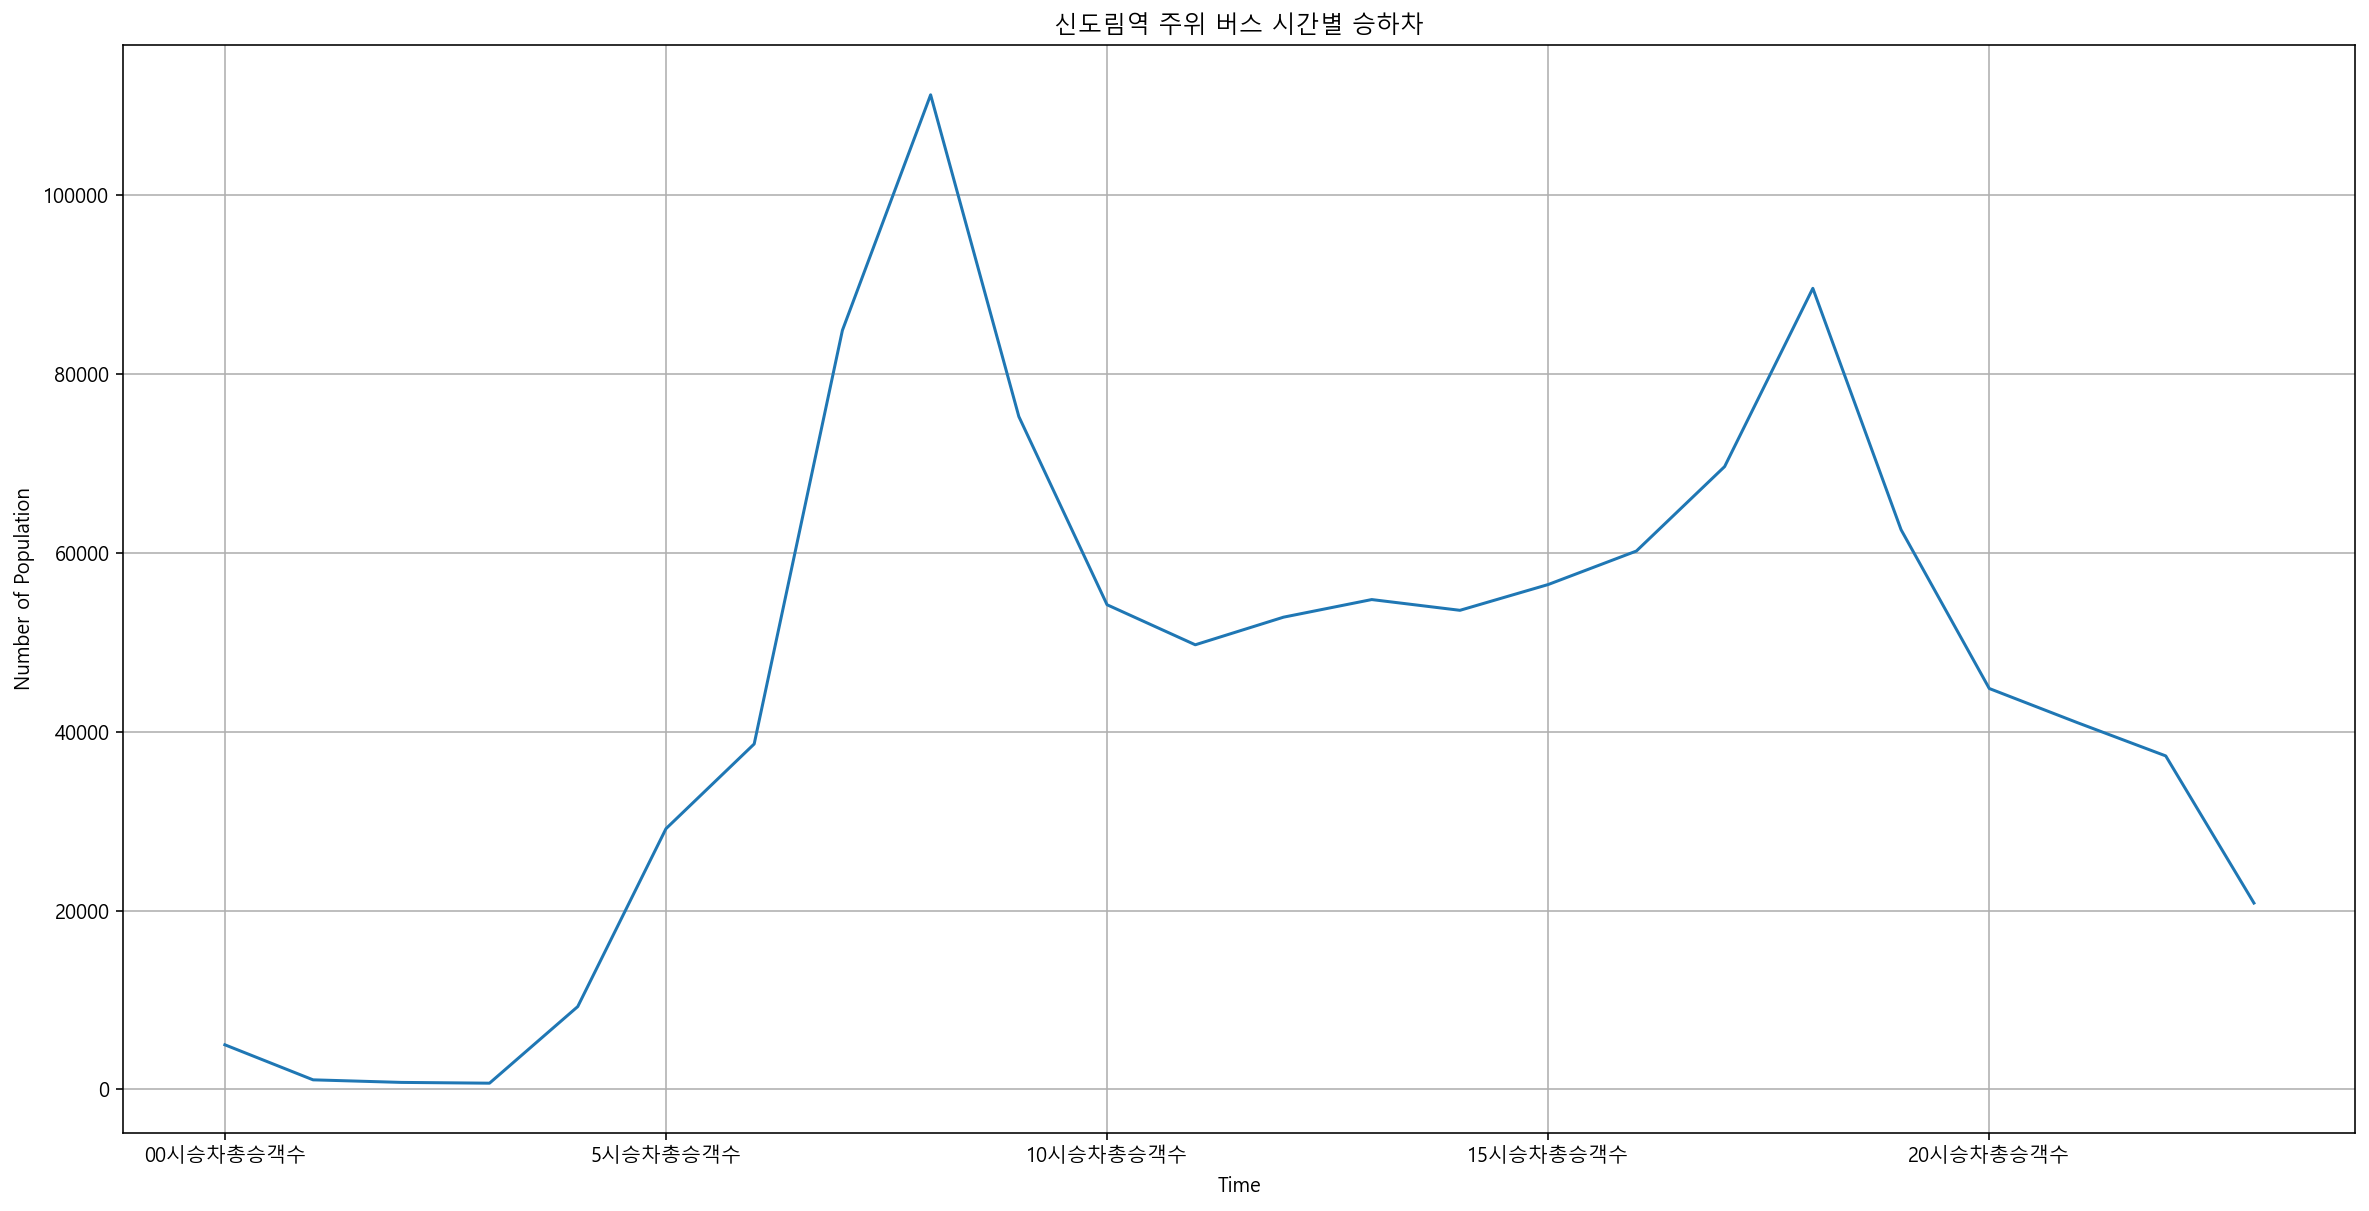

In [21]:
drawing(bt_up_8, '신도림')

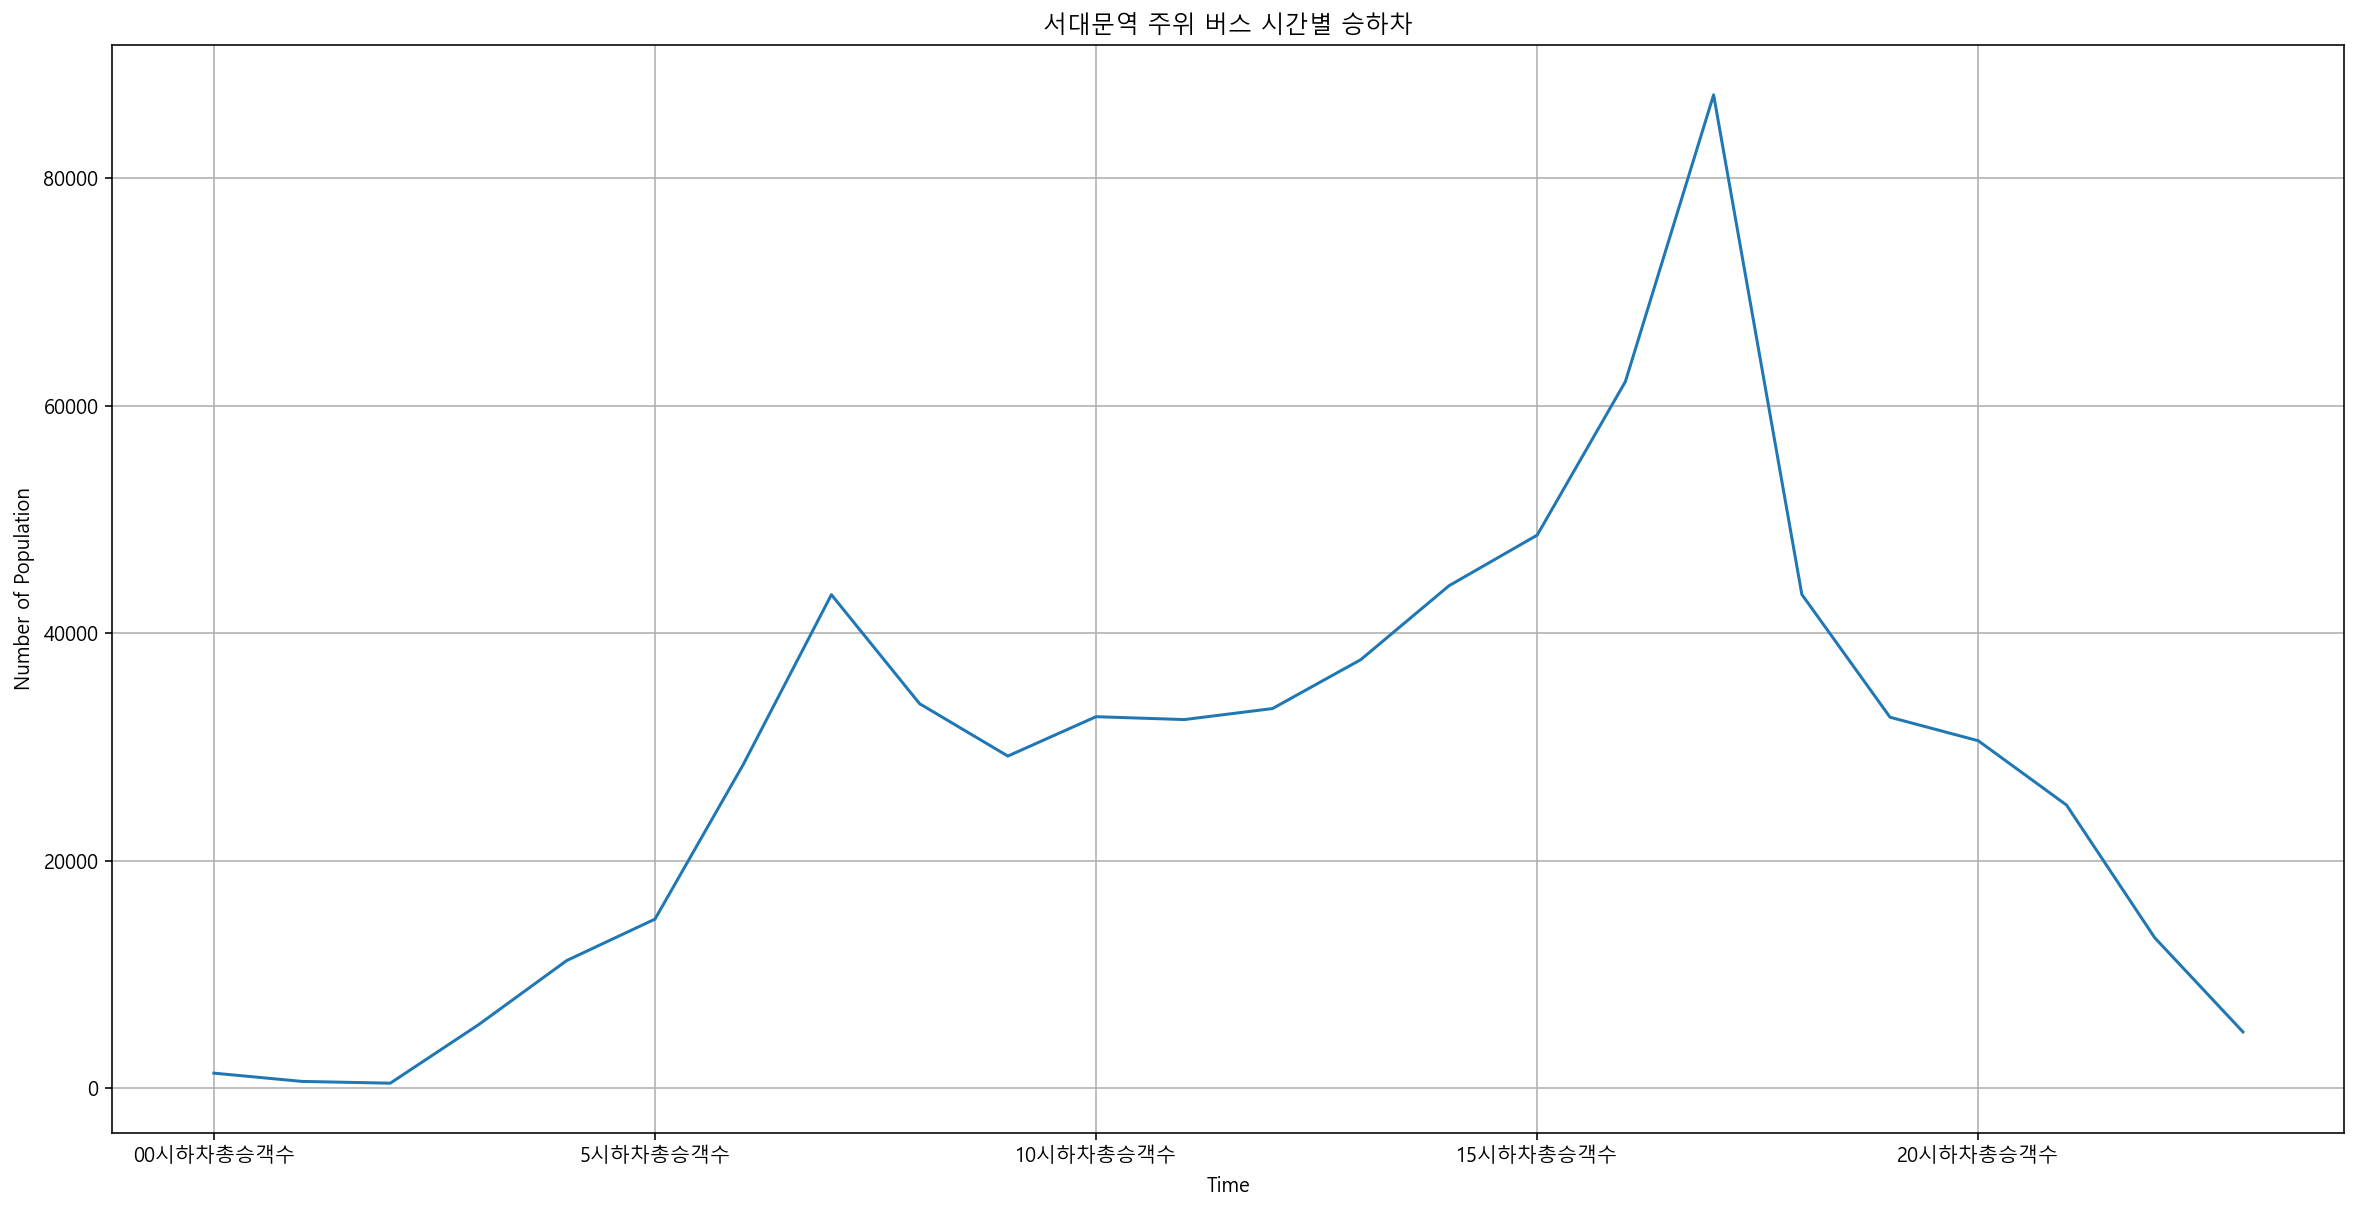

충정로역은 데이터에 존재하지 않습니다


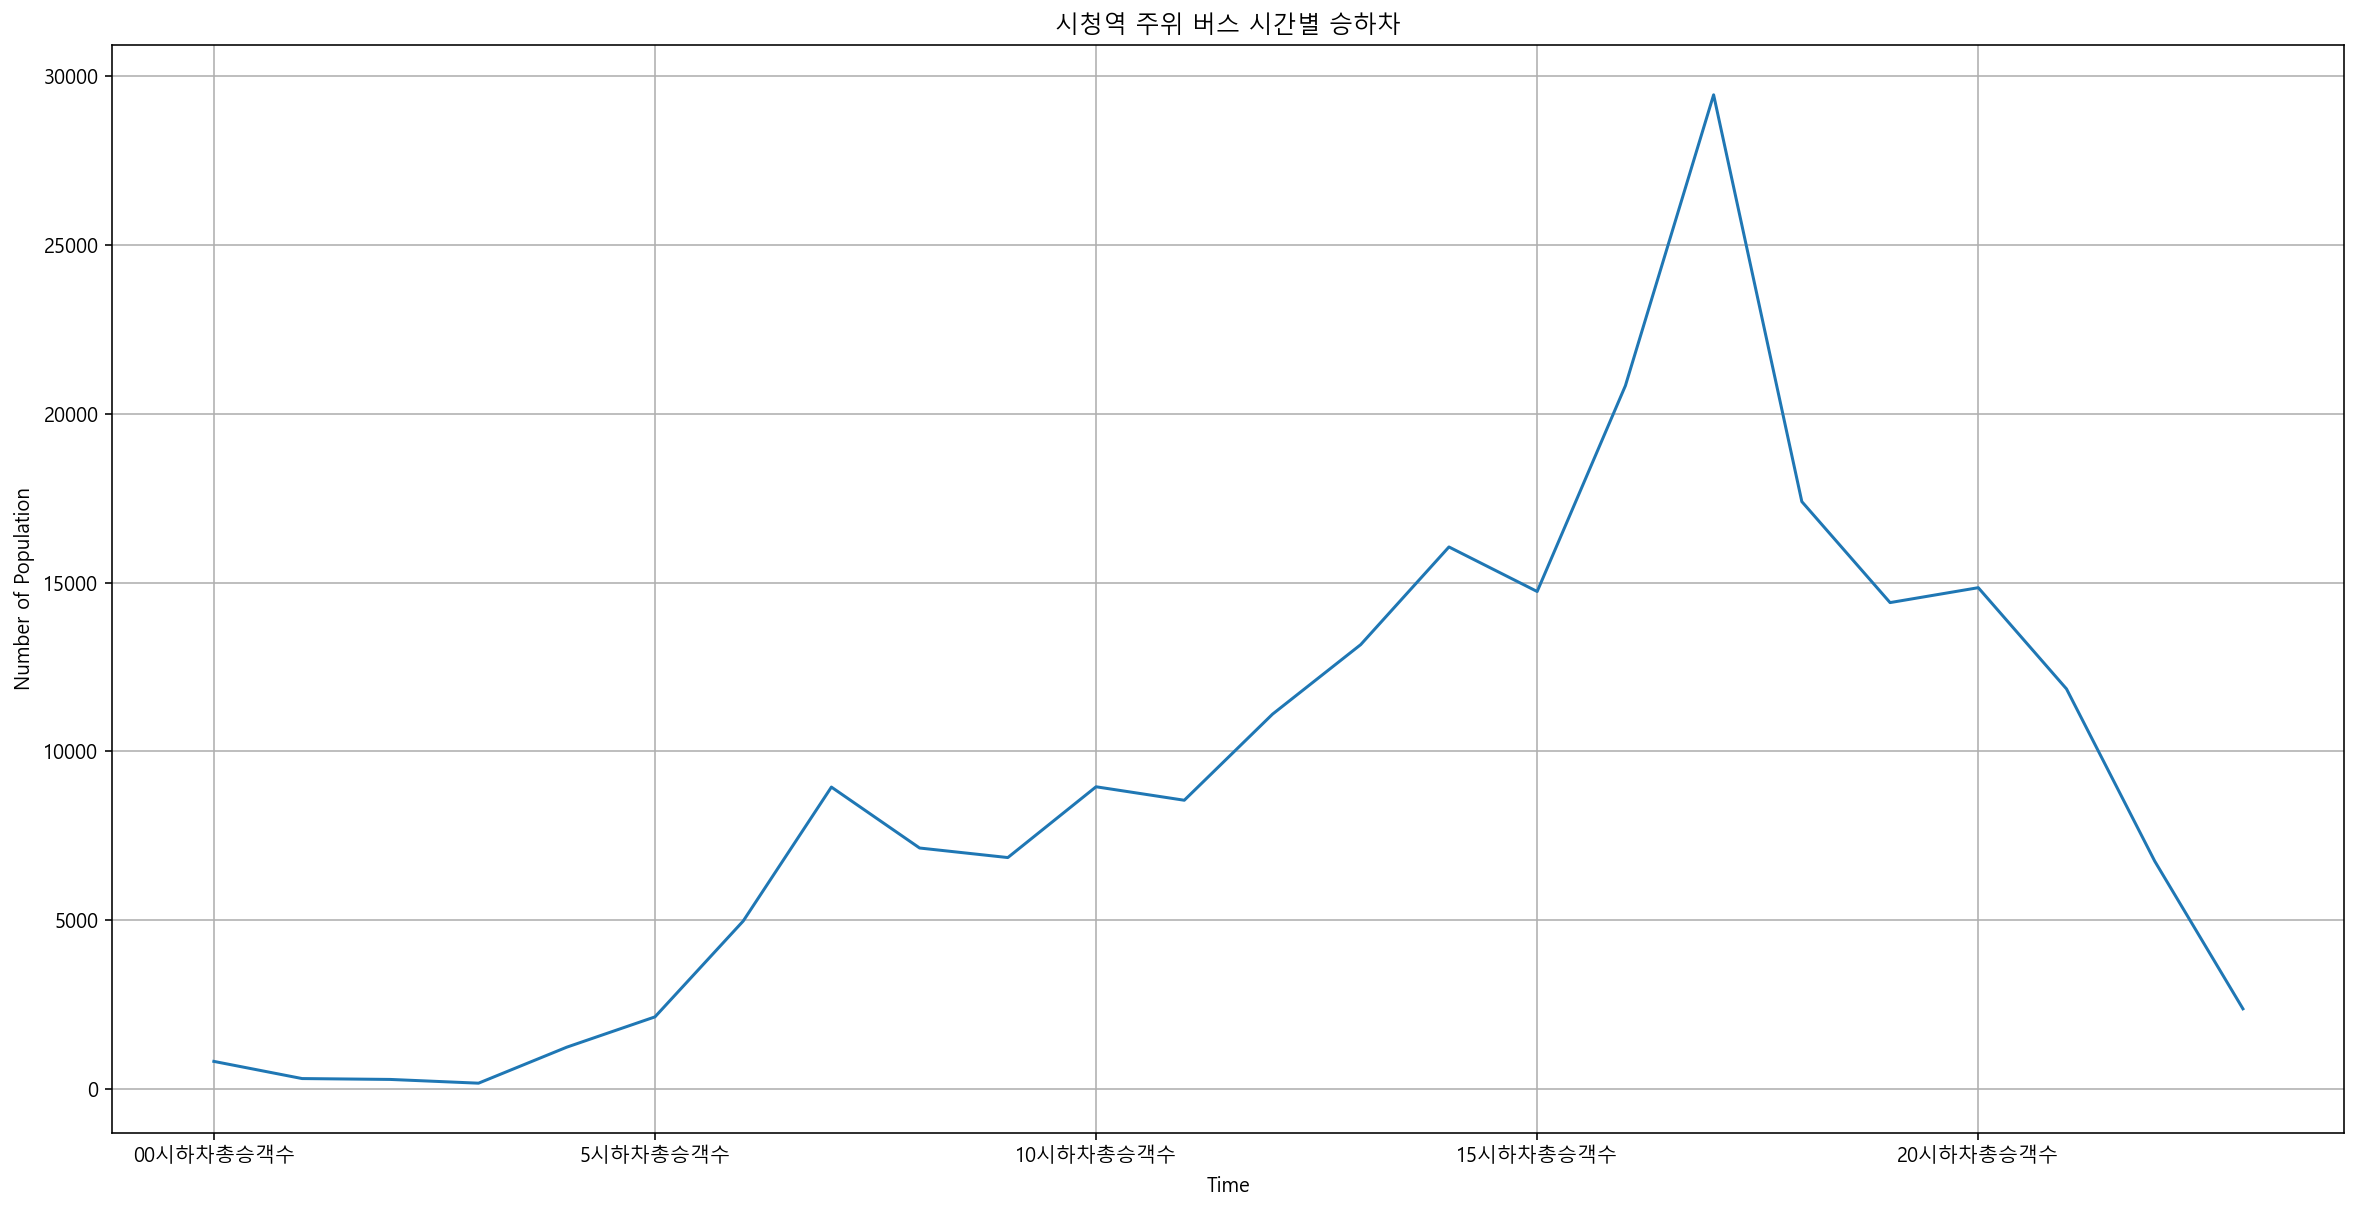

회현역은 데이터에 존재하지 않습니다


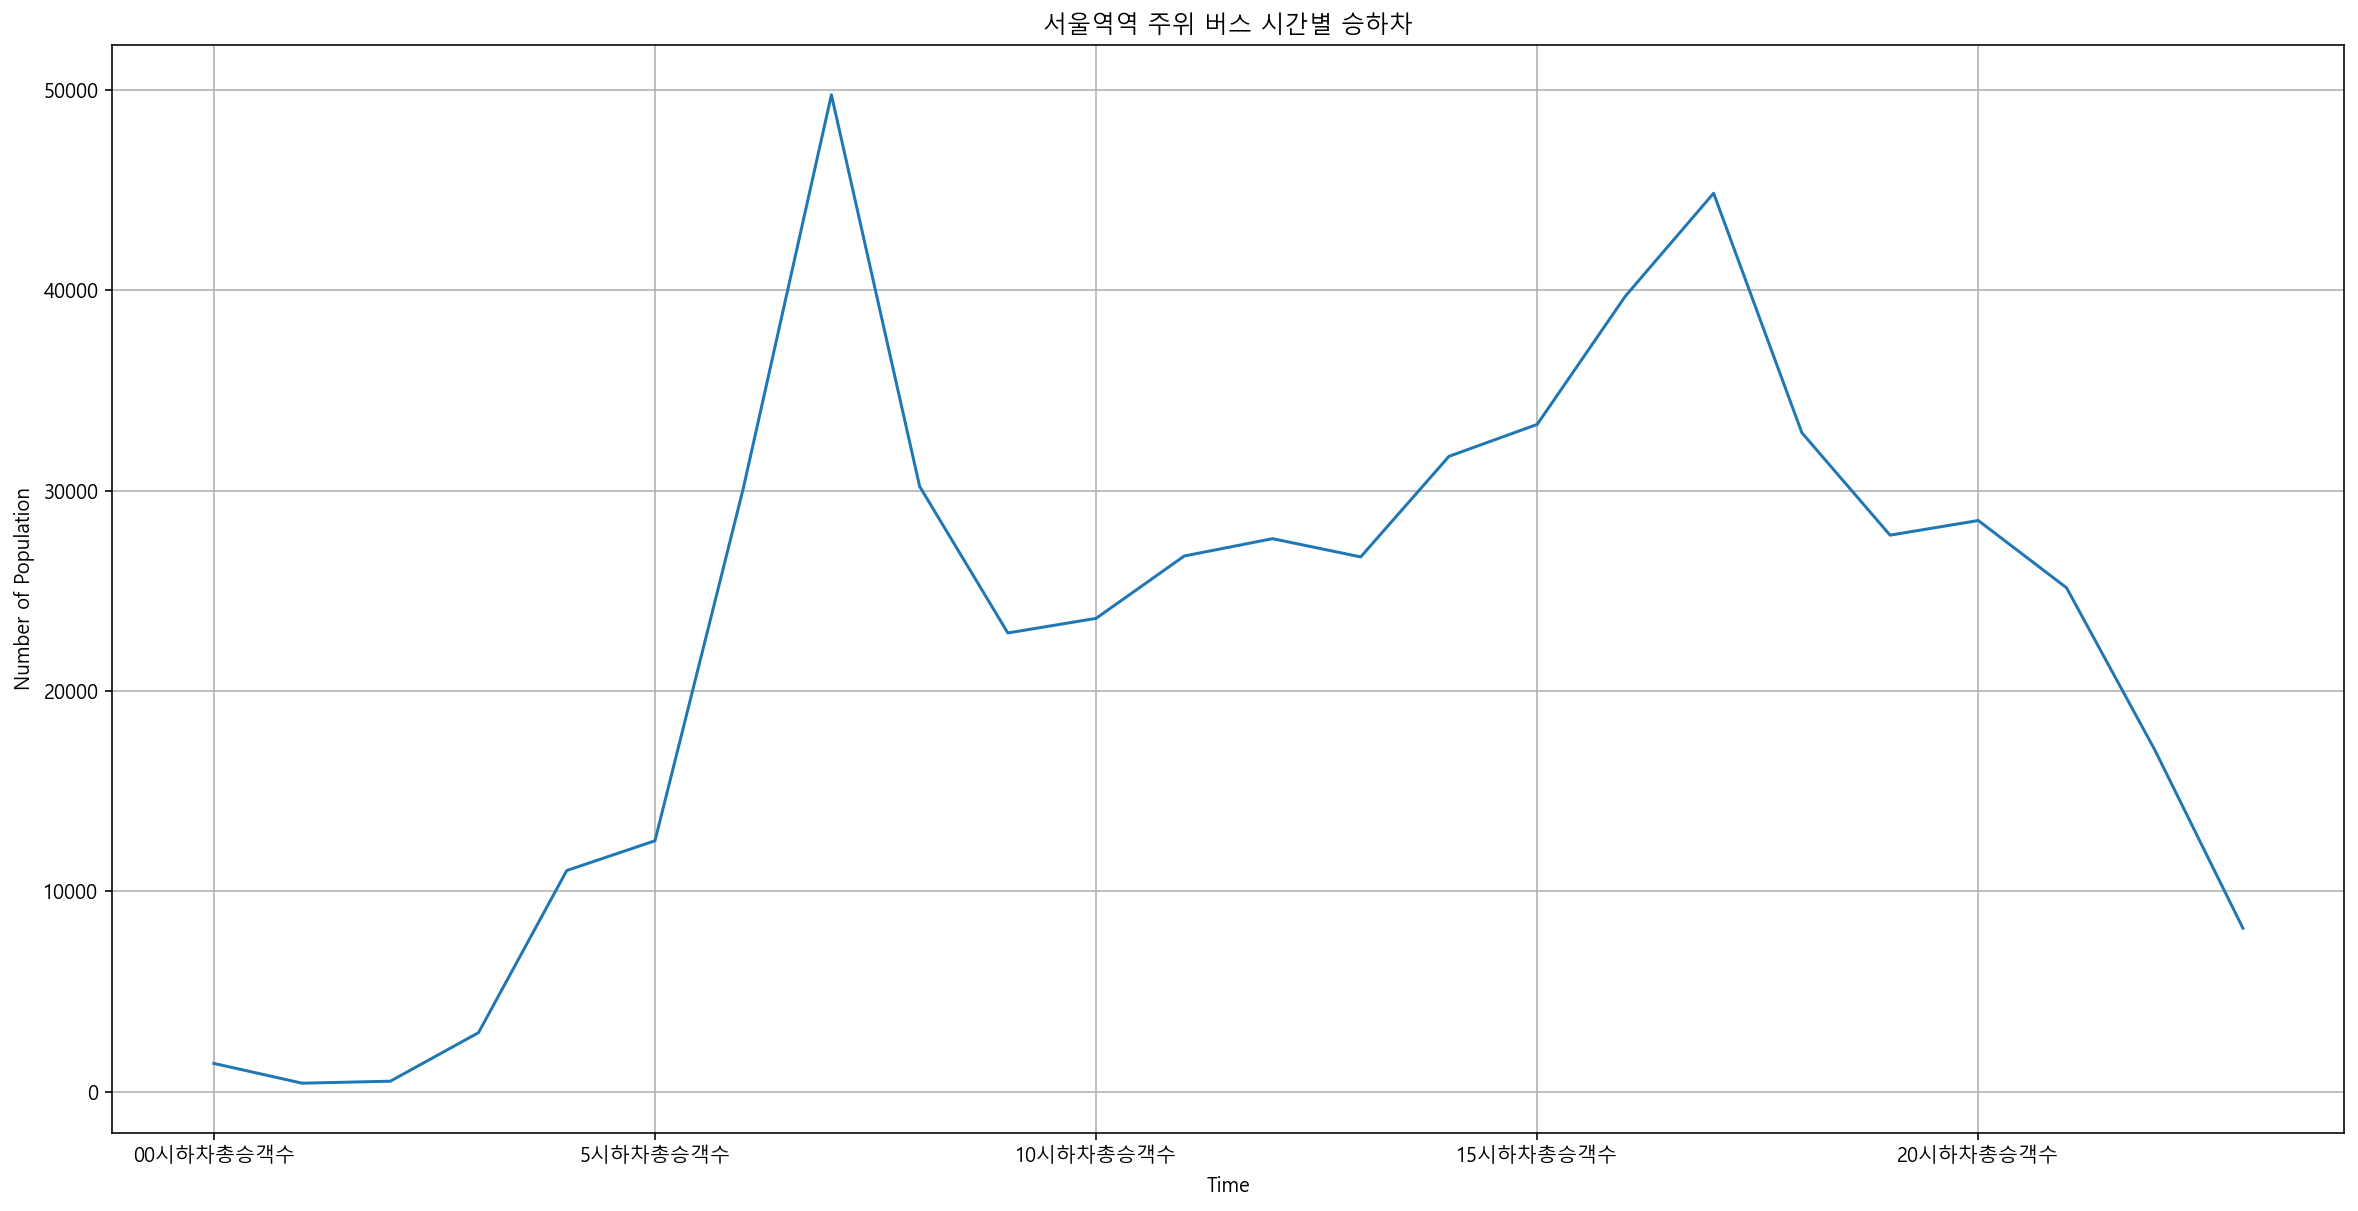

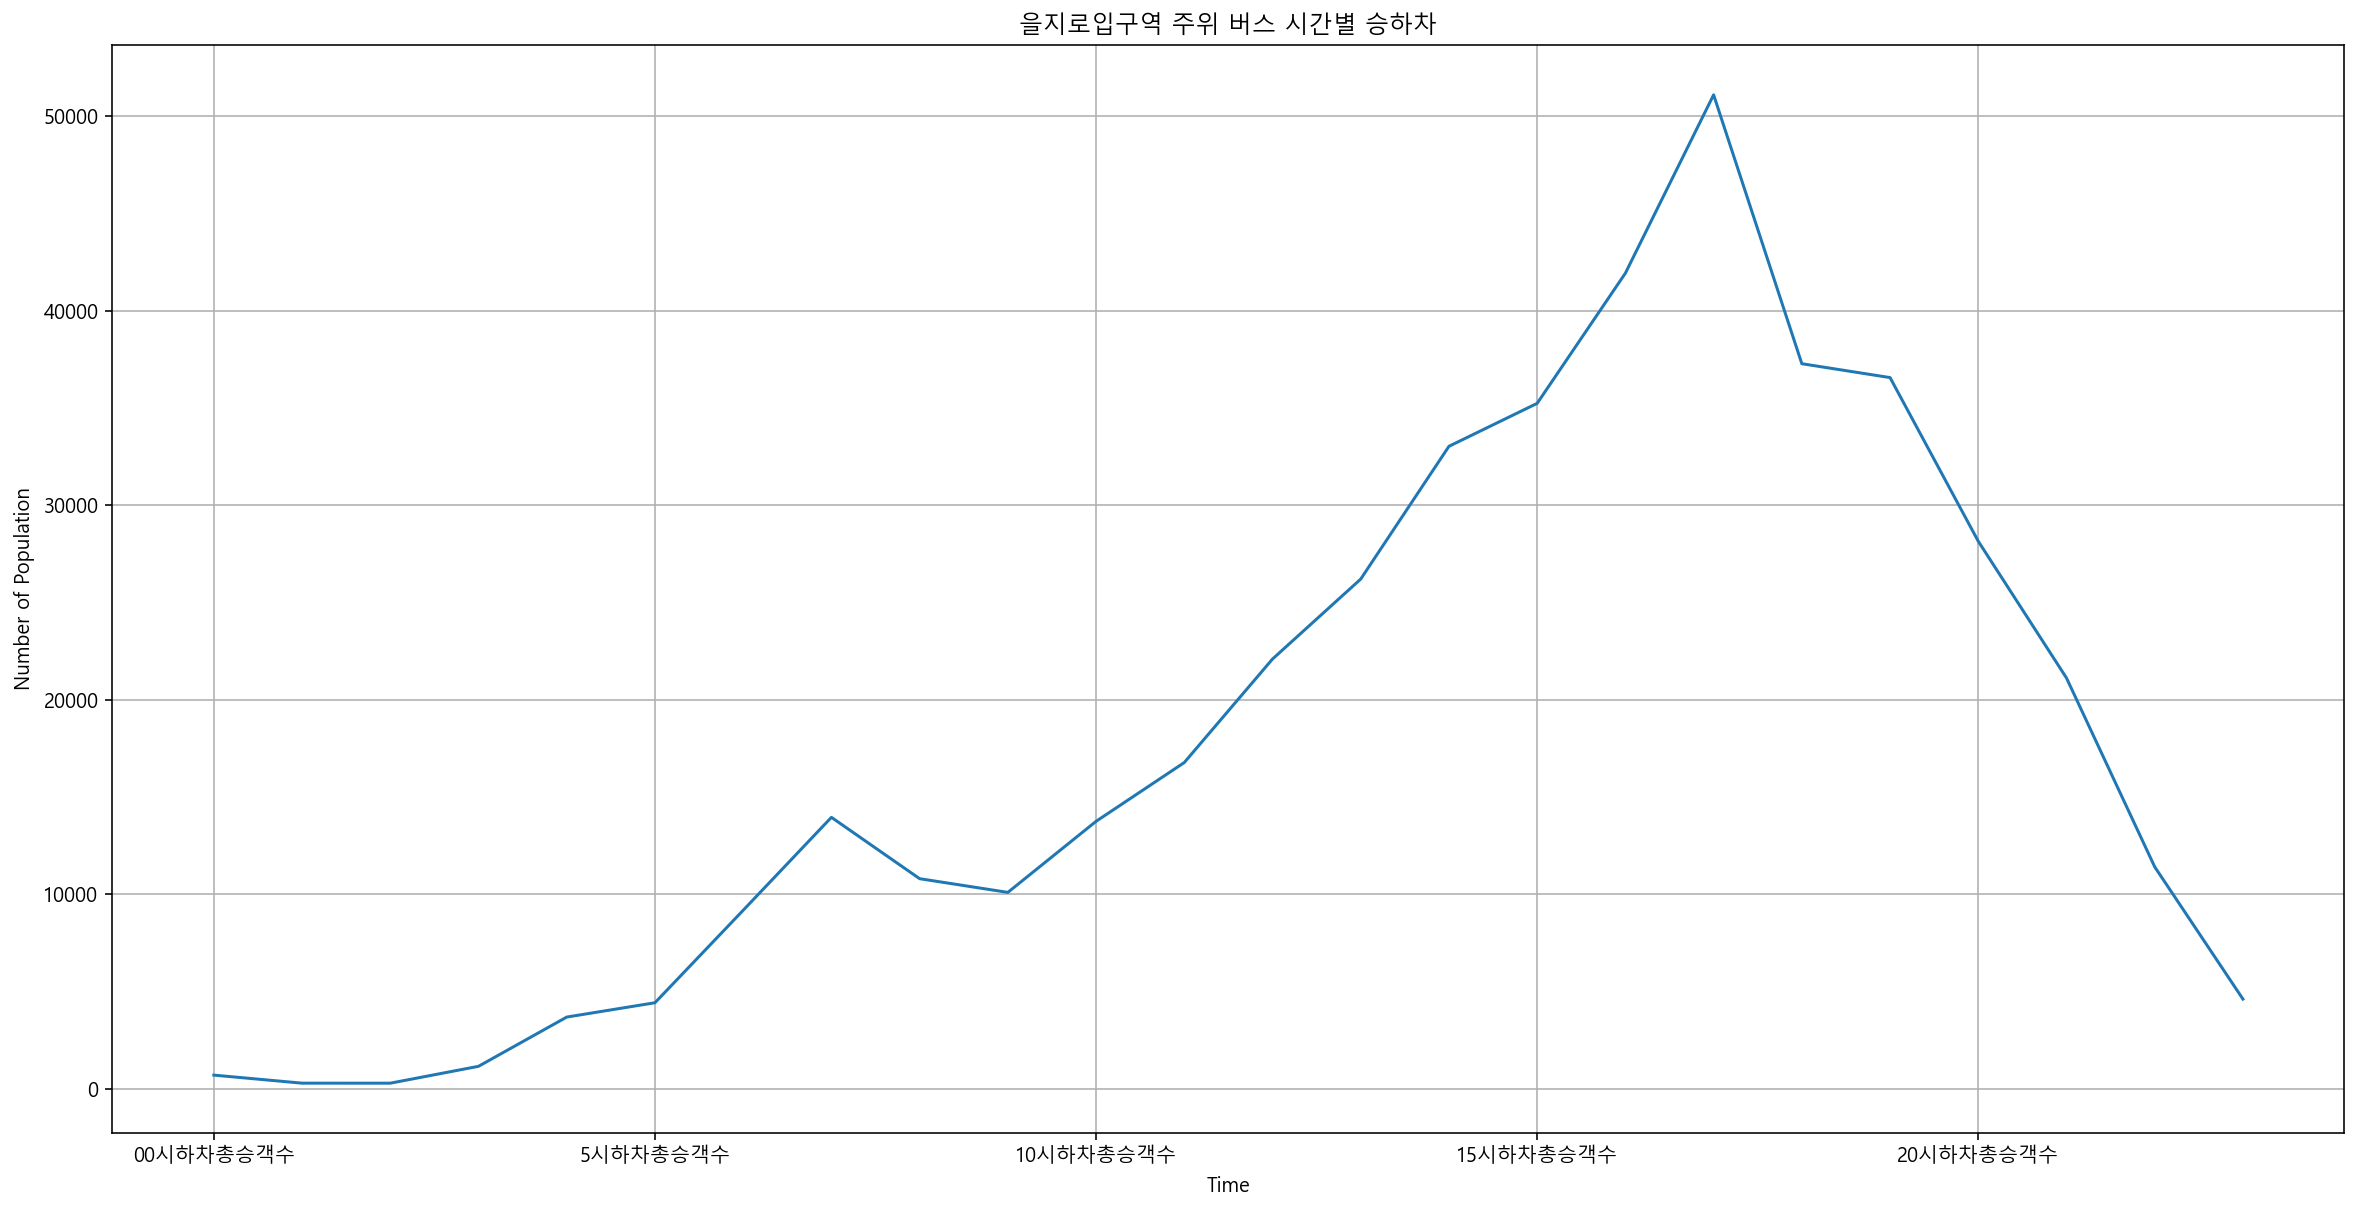

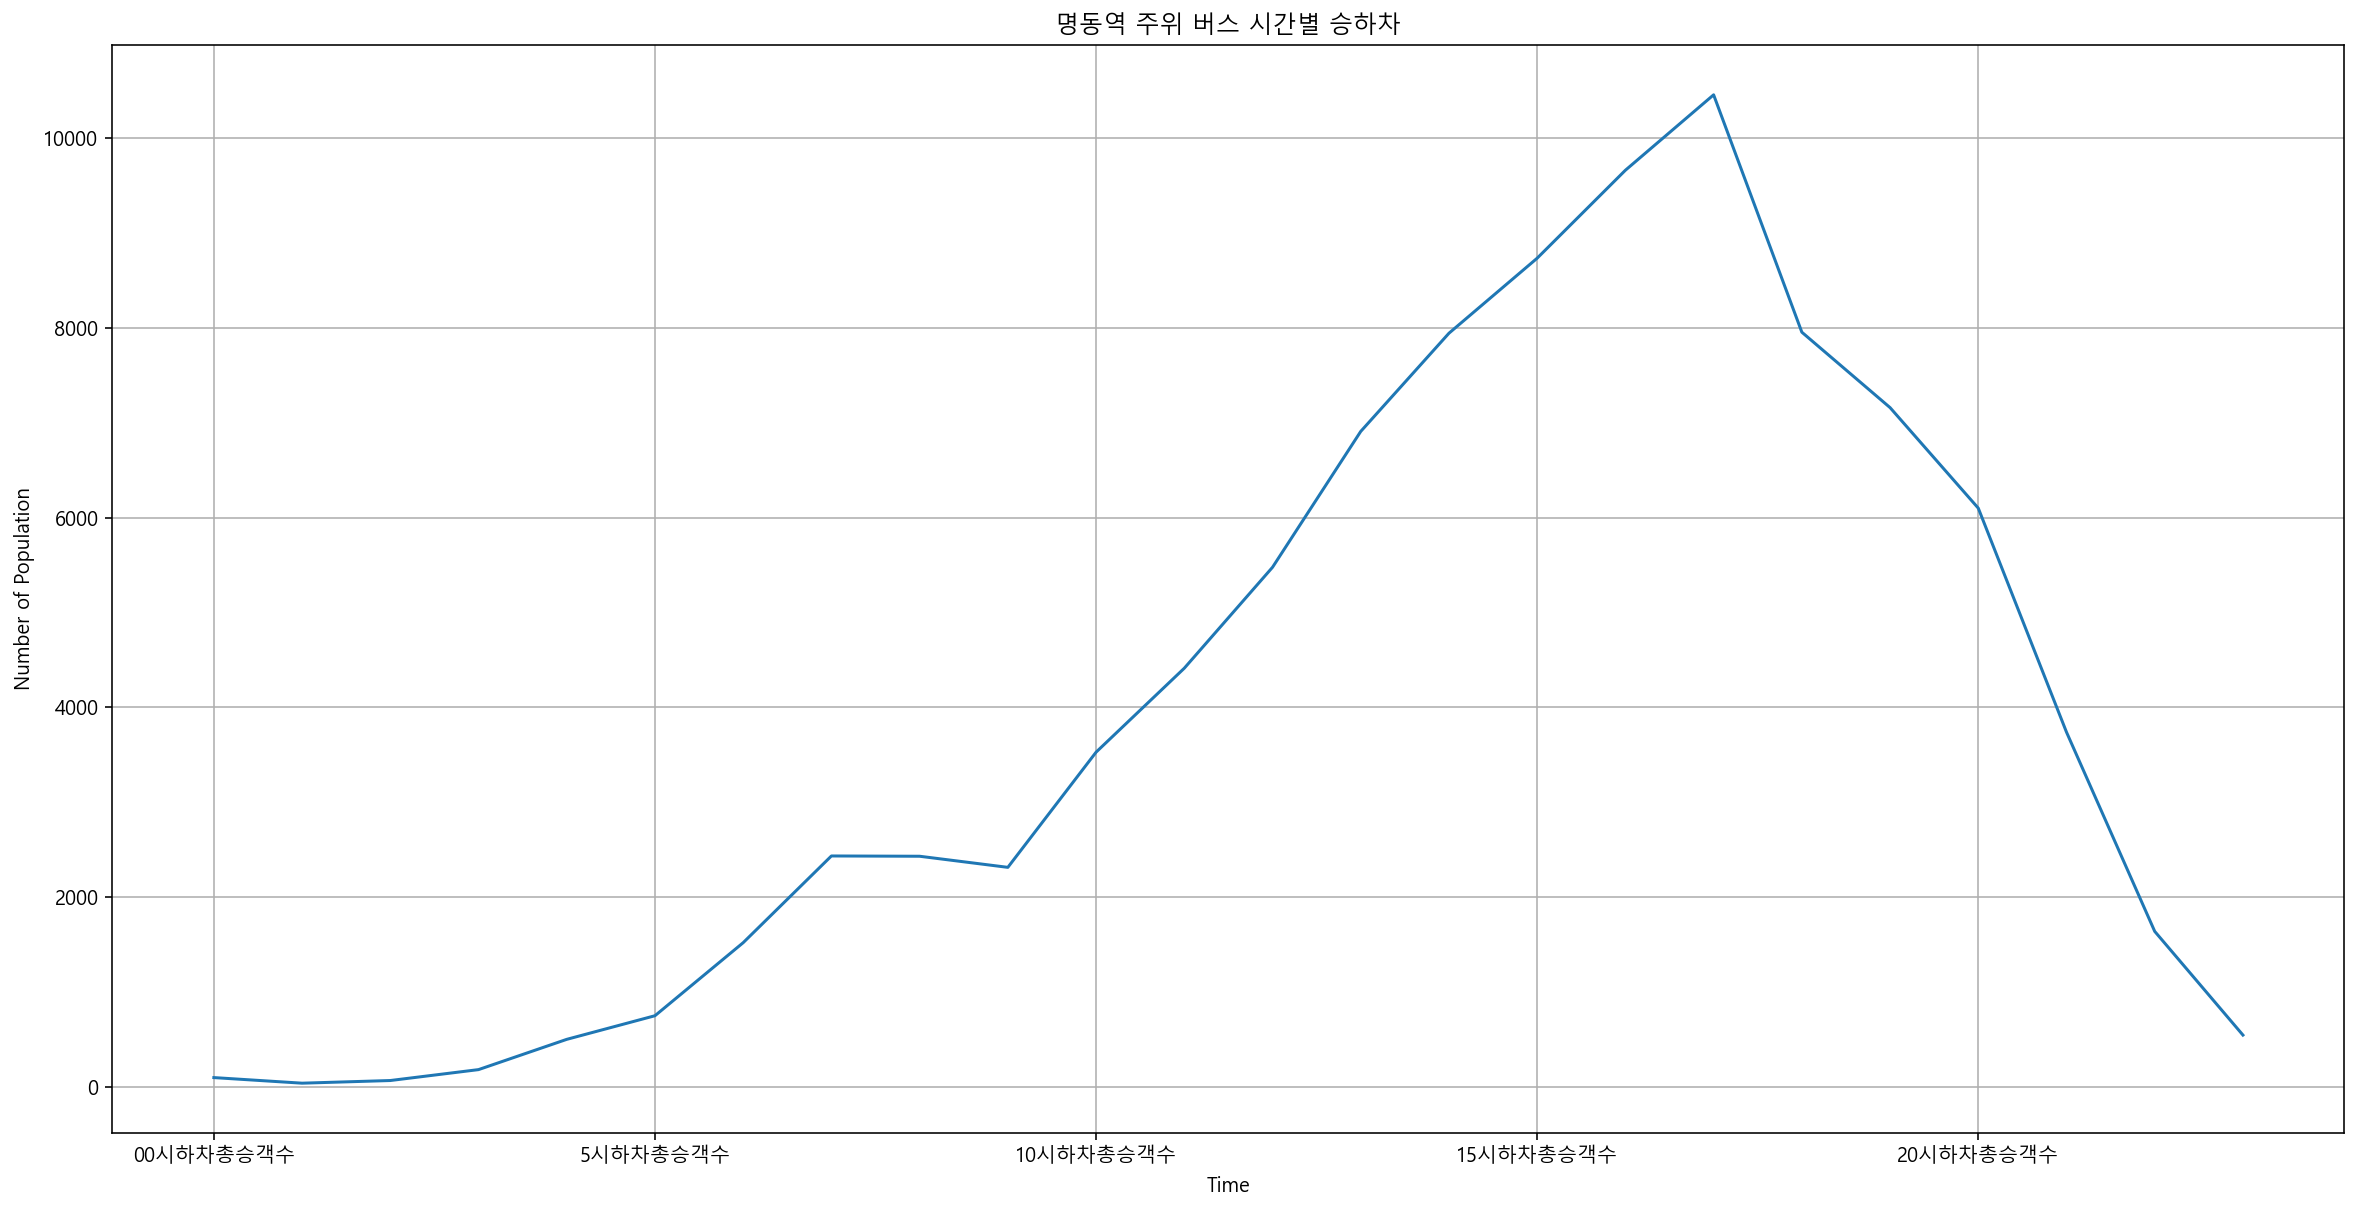

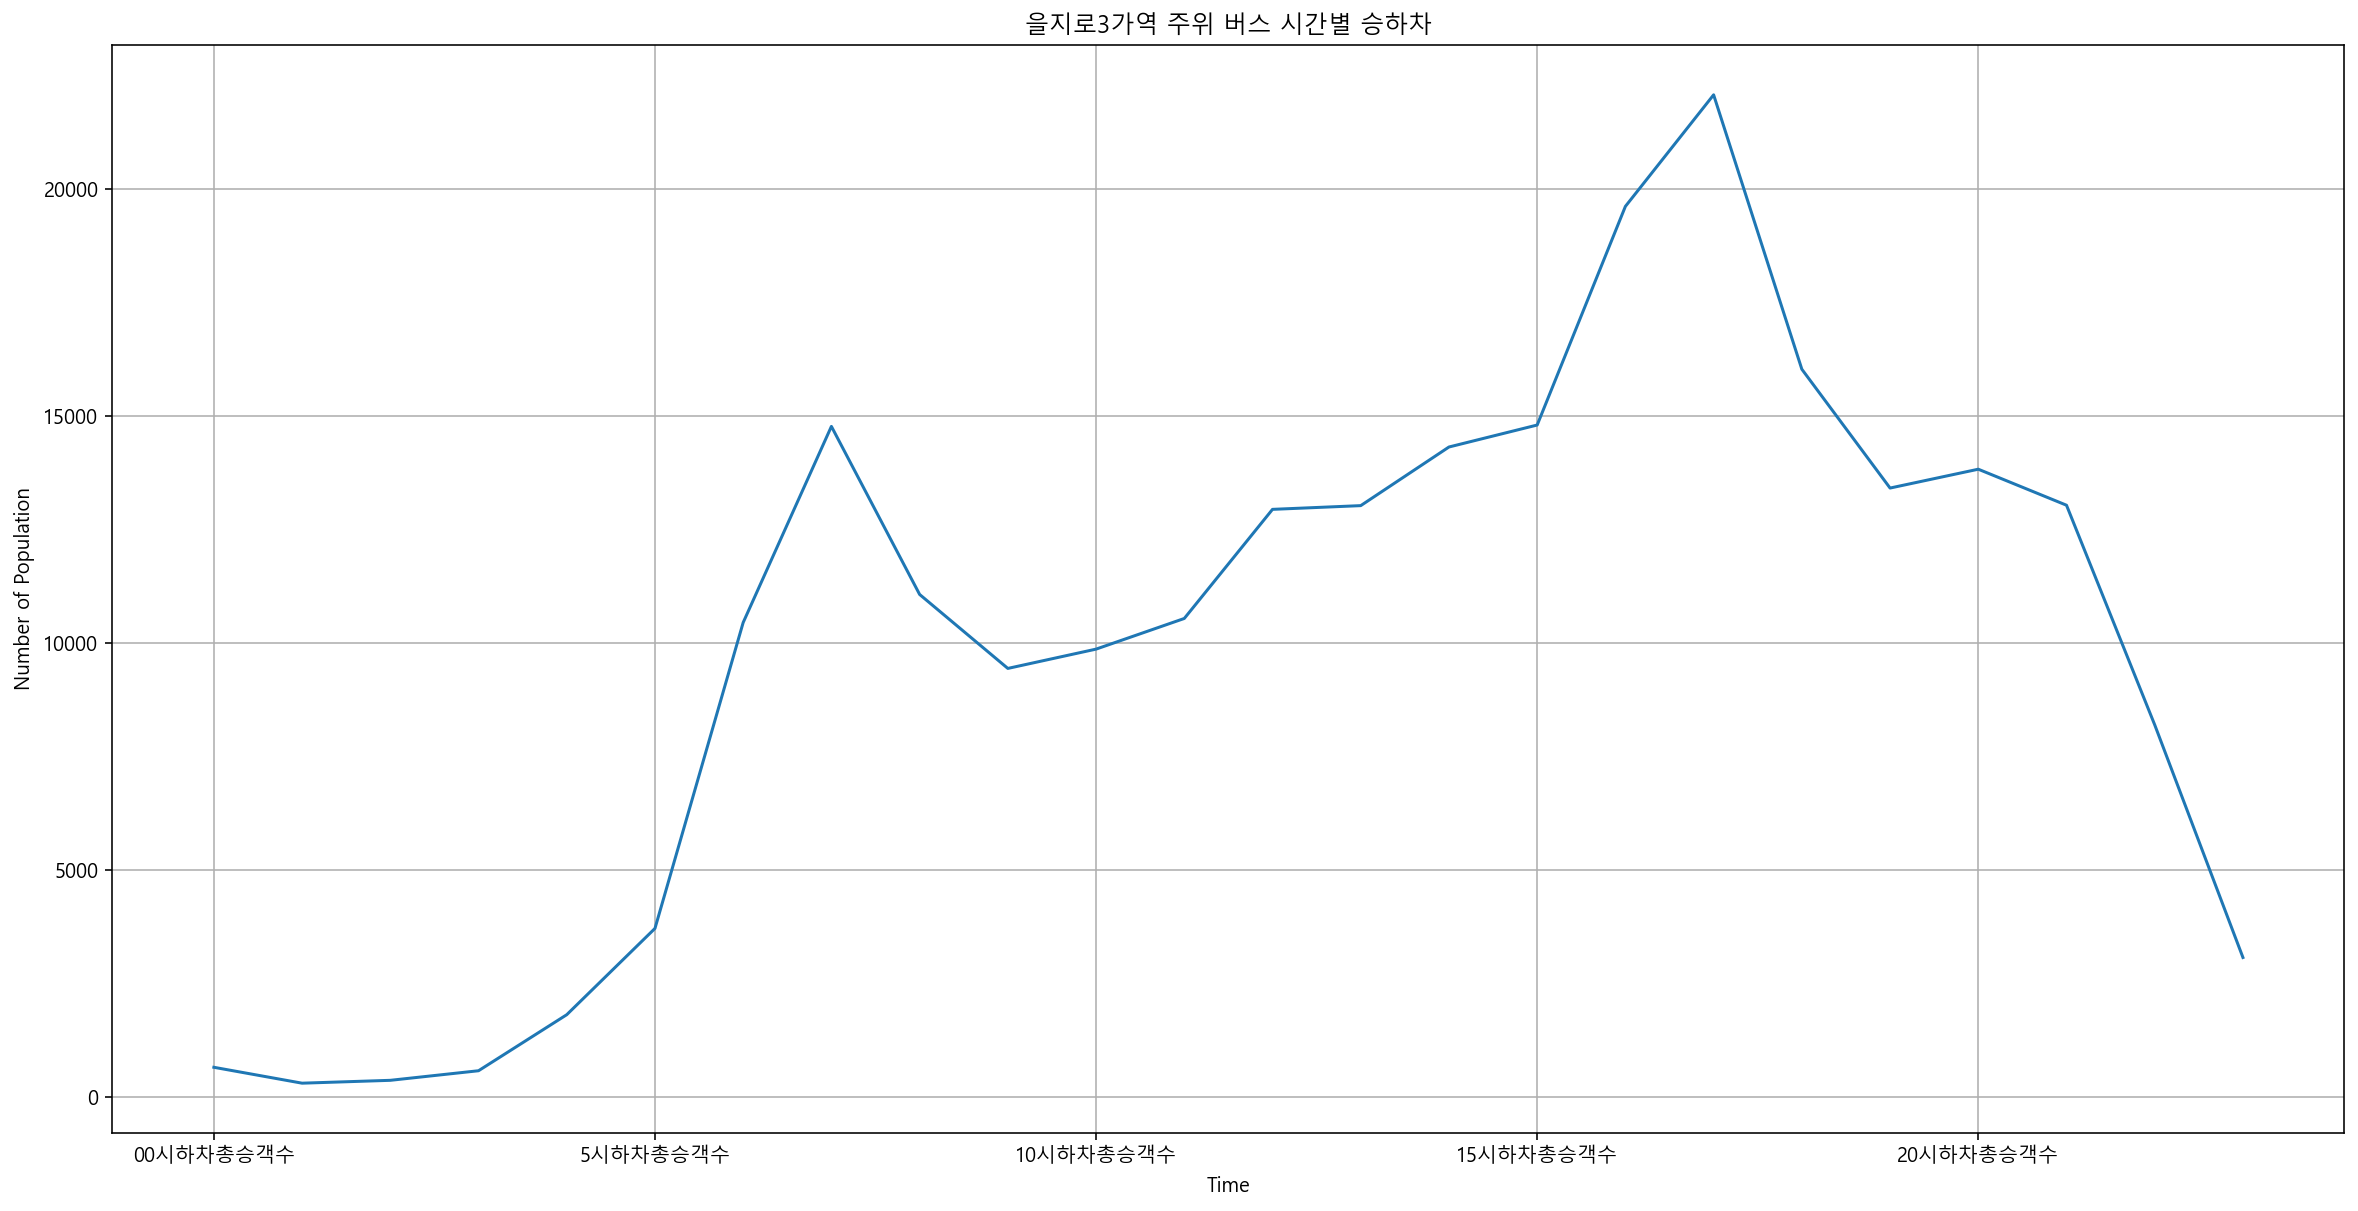

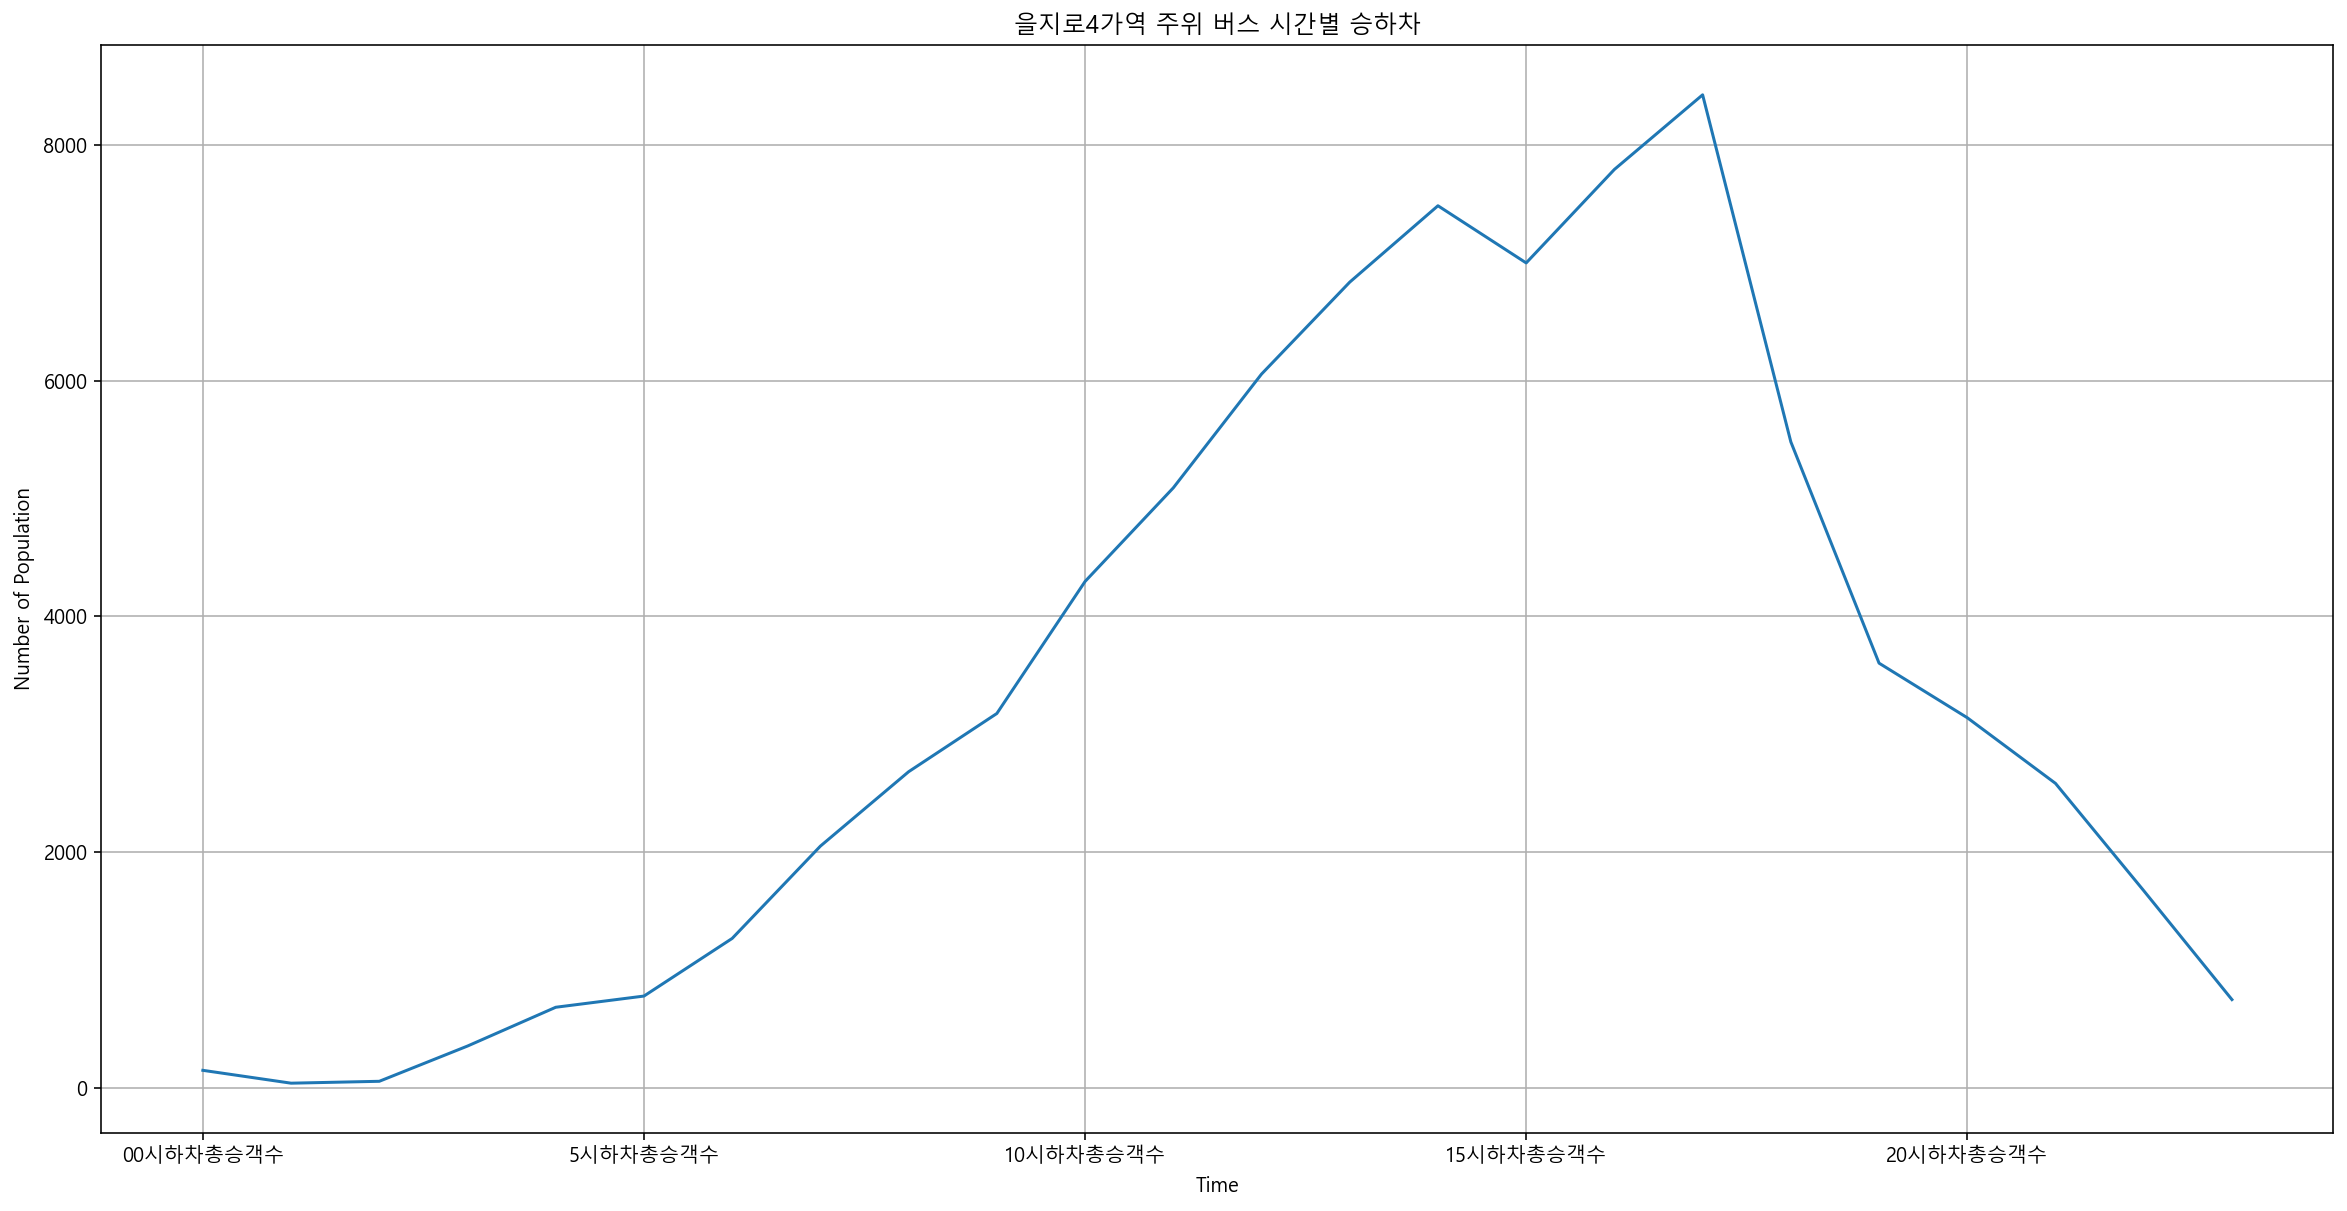

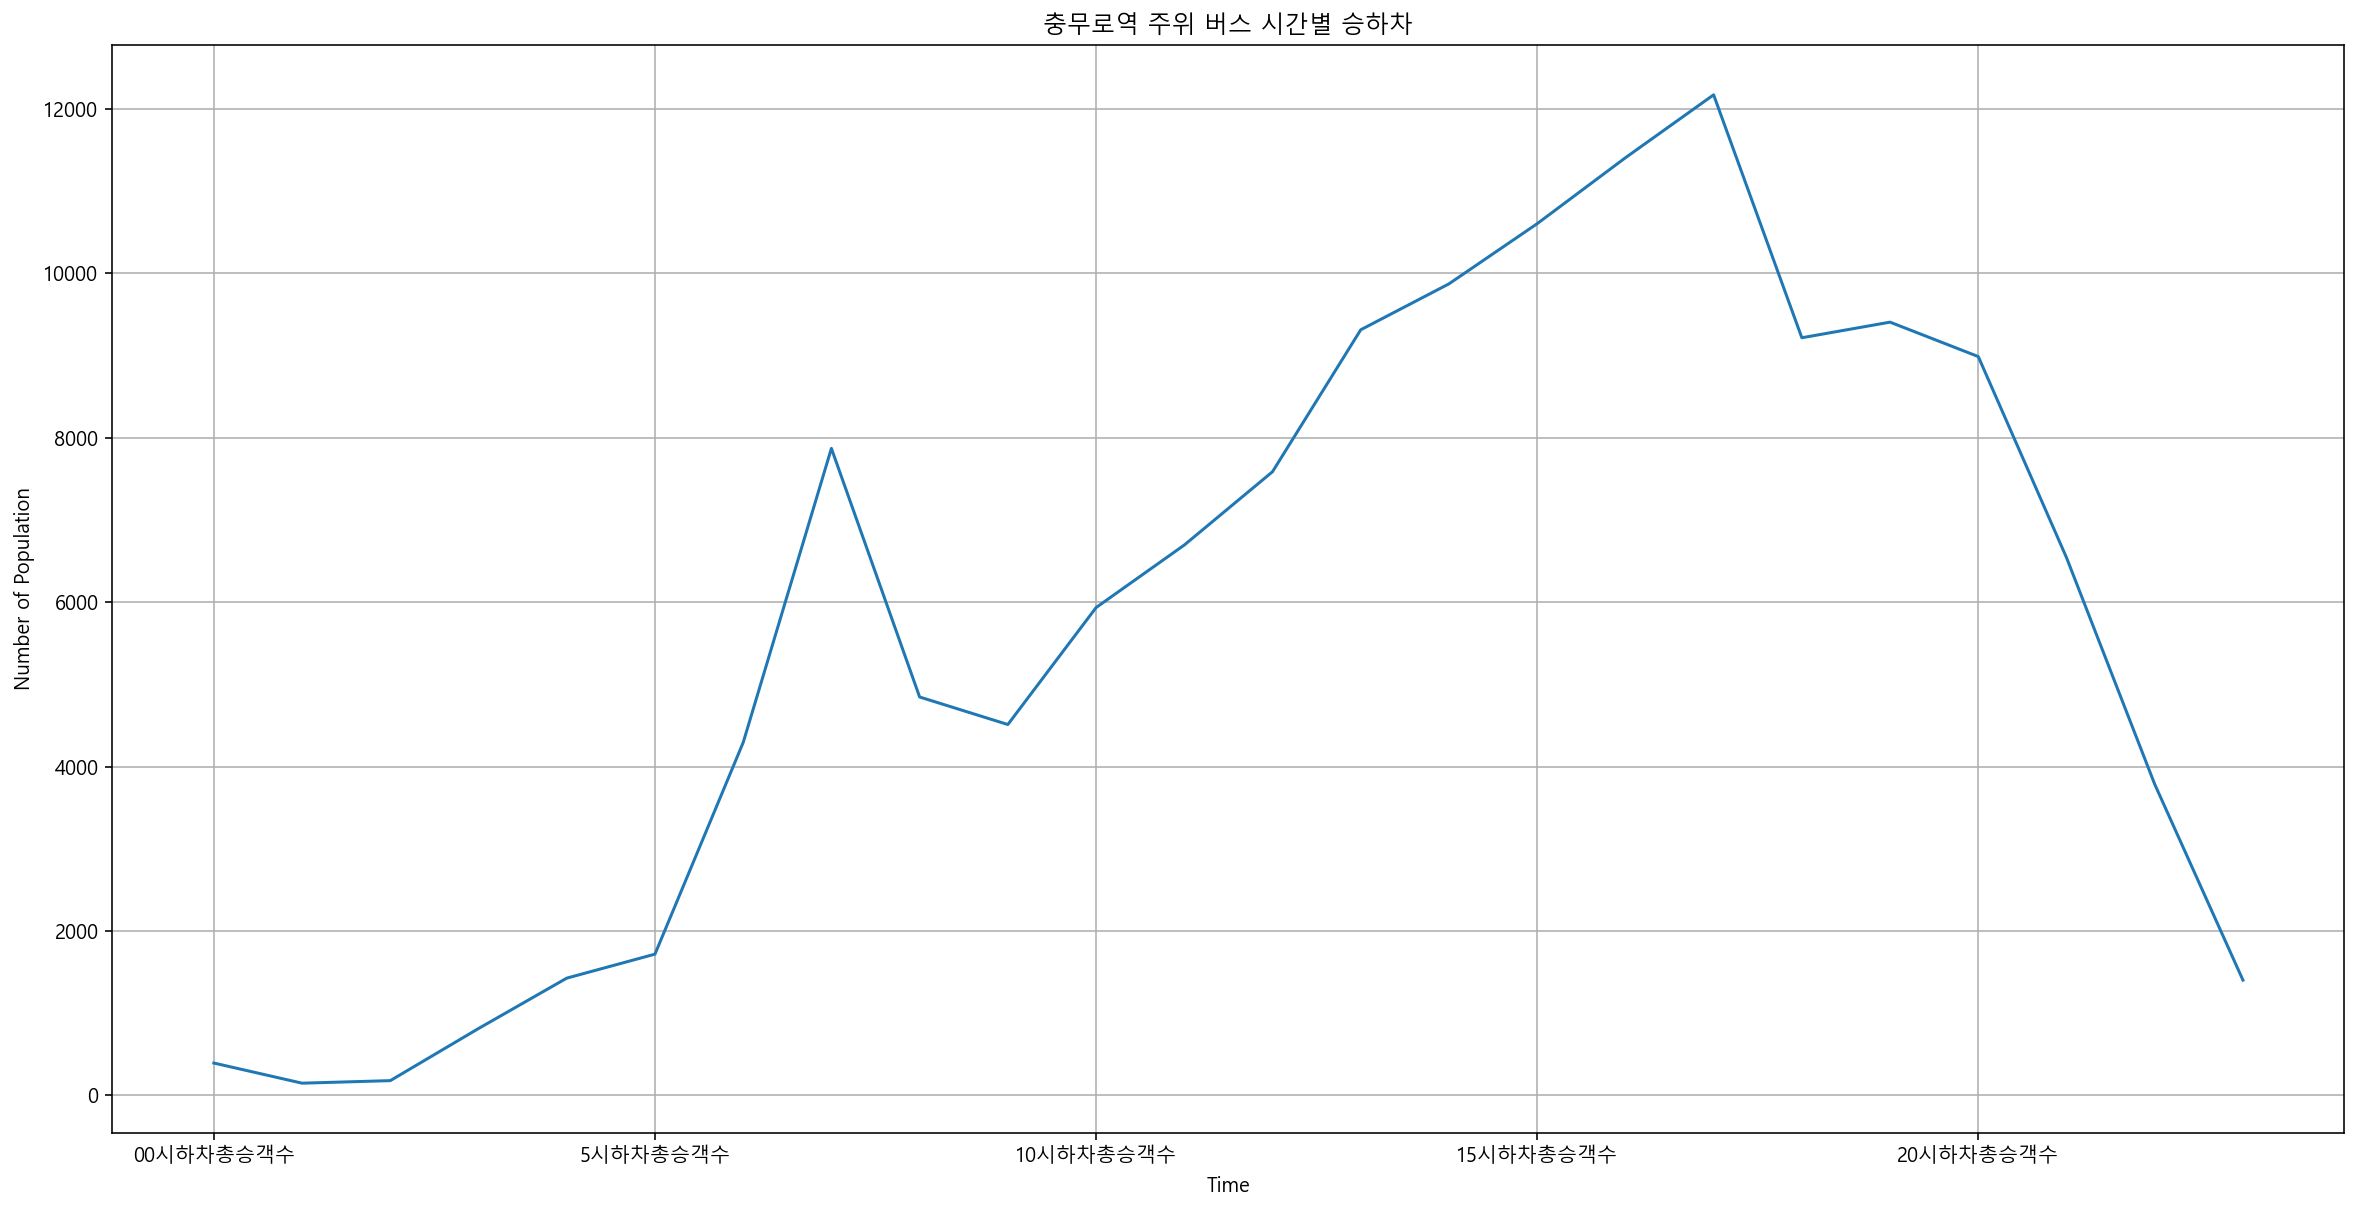

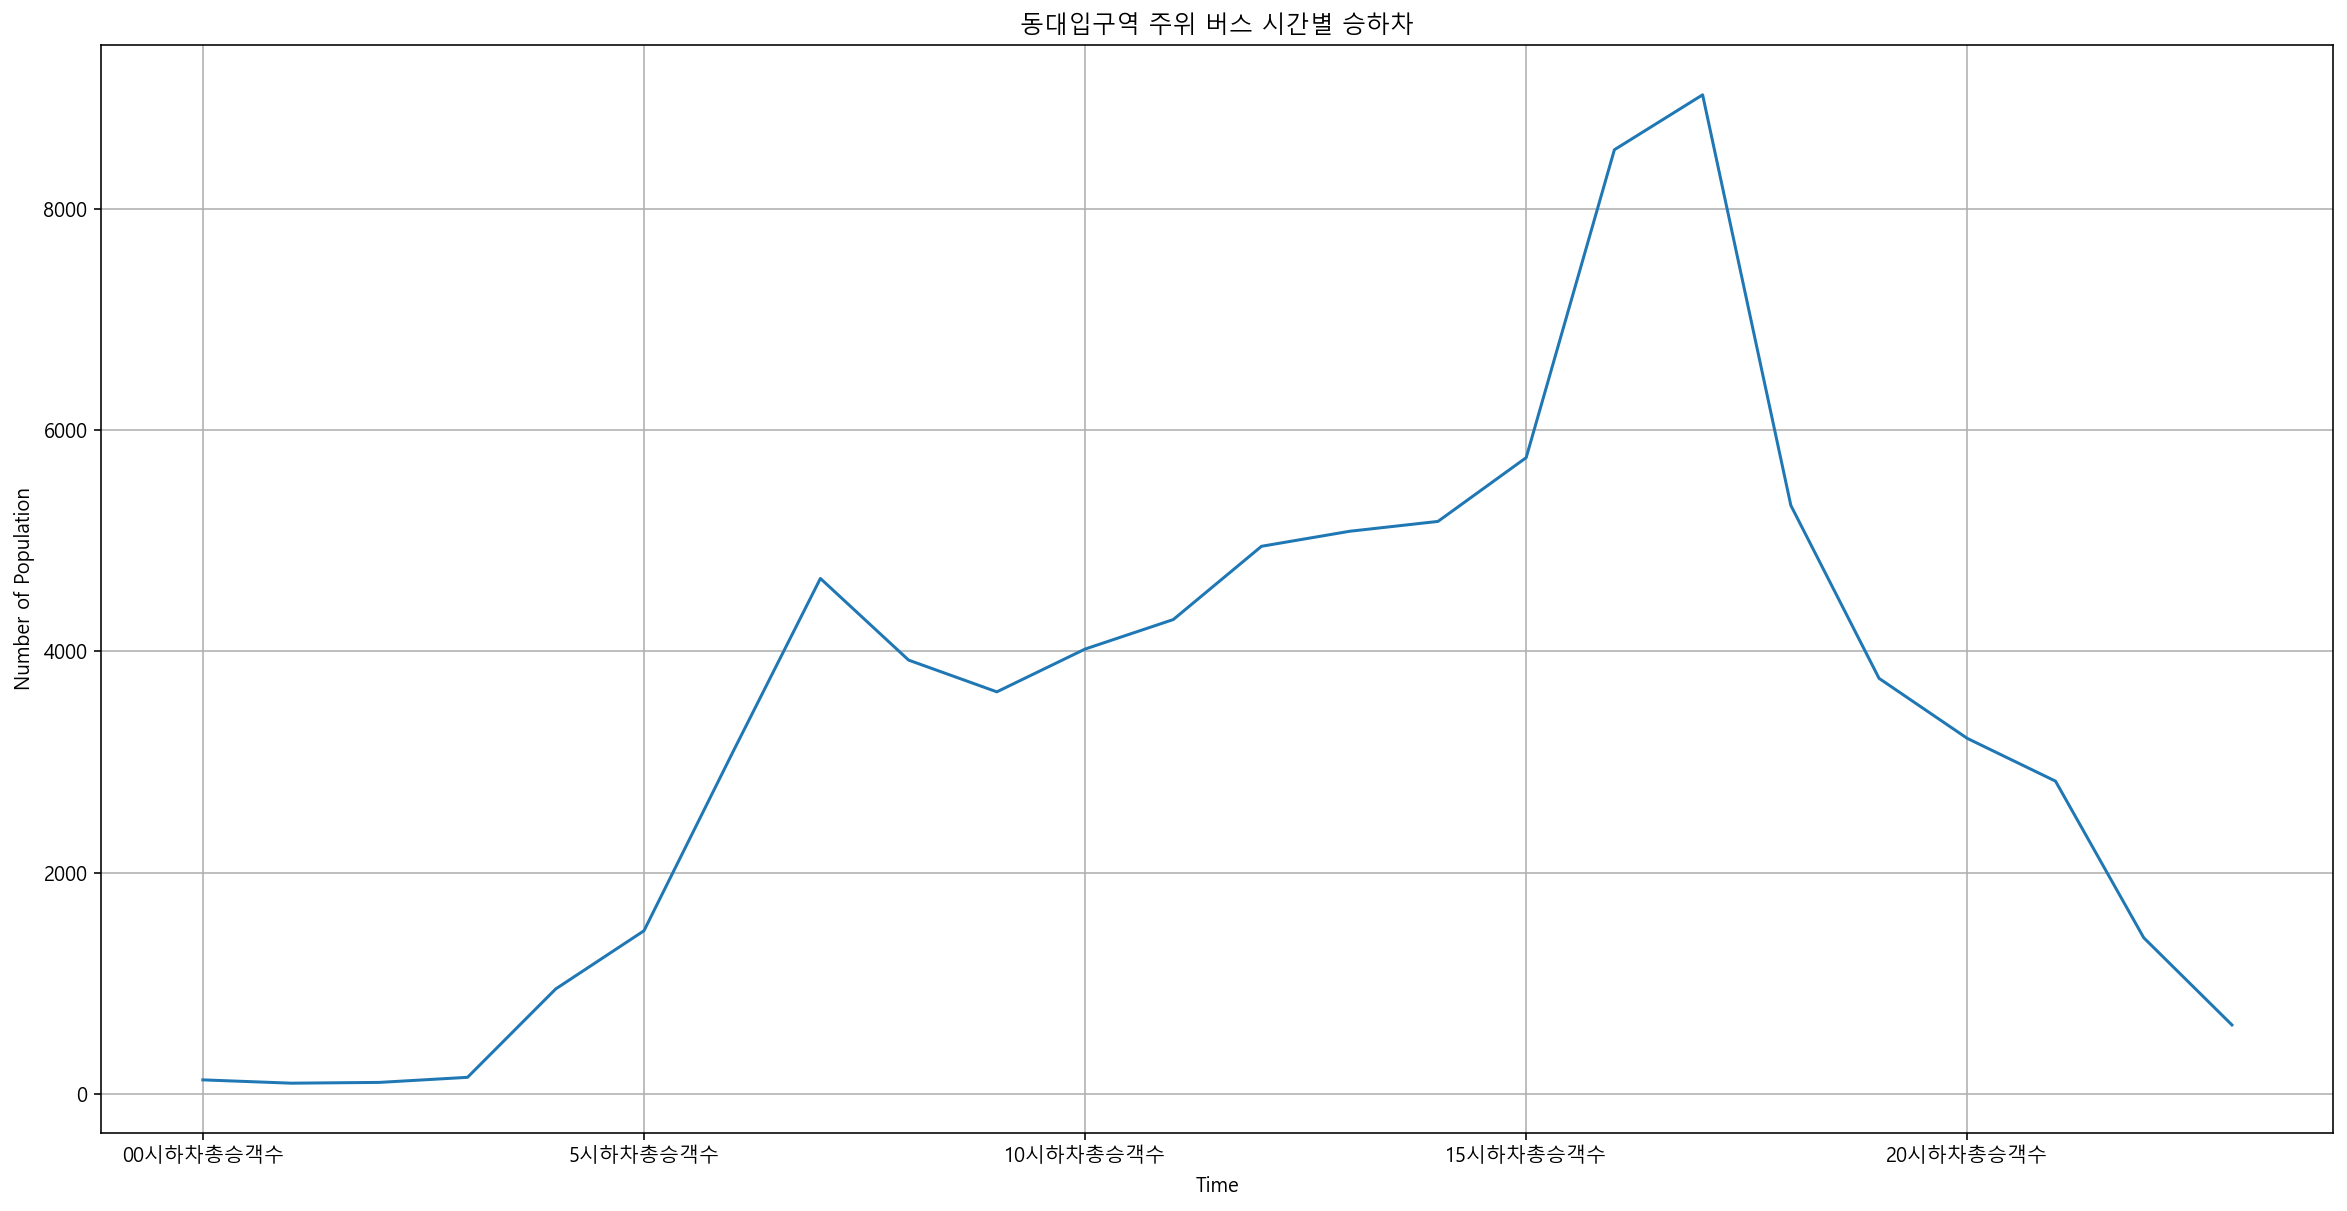

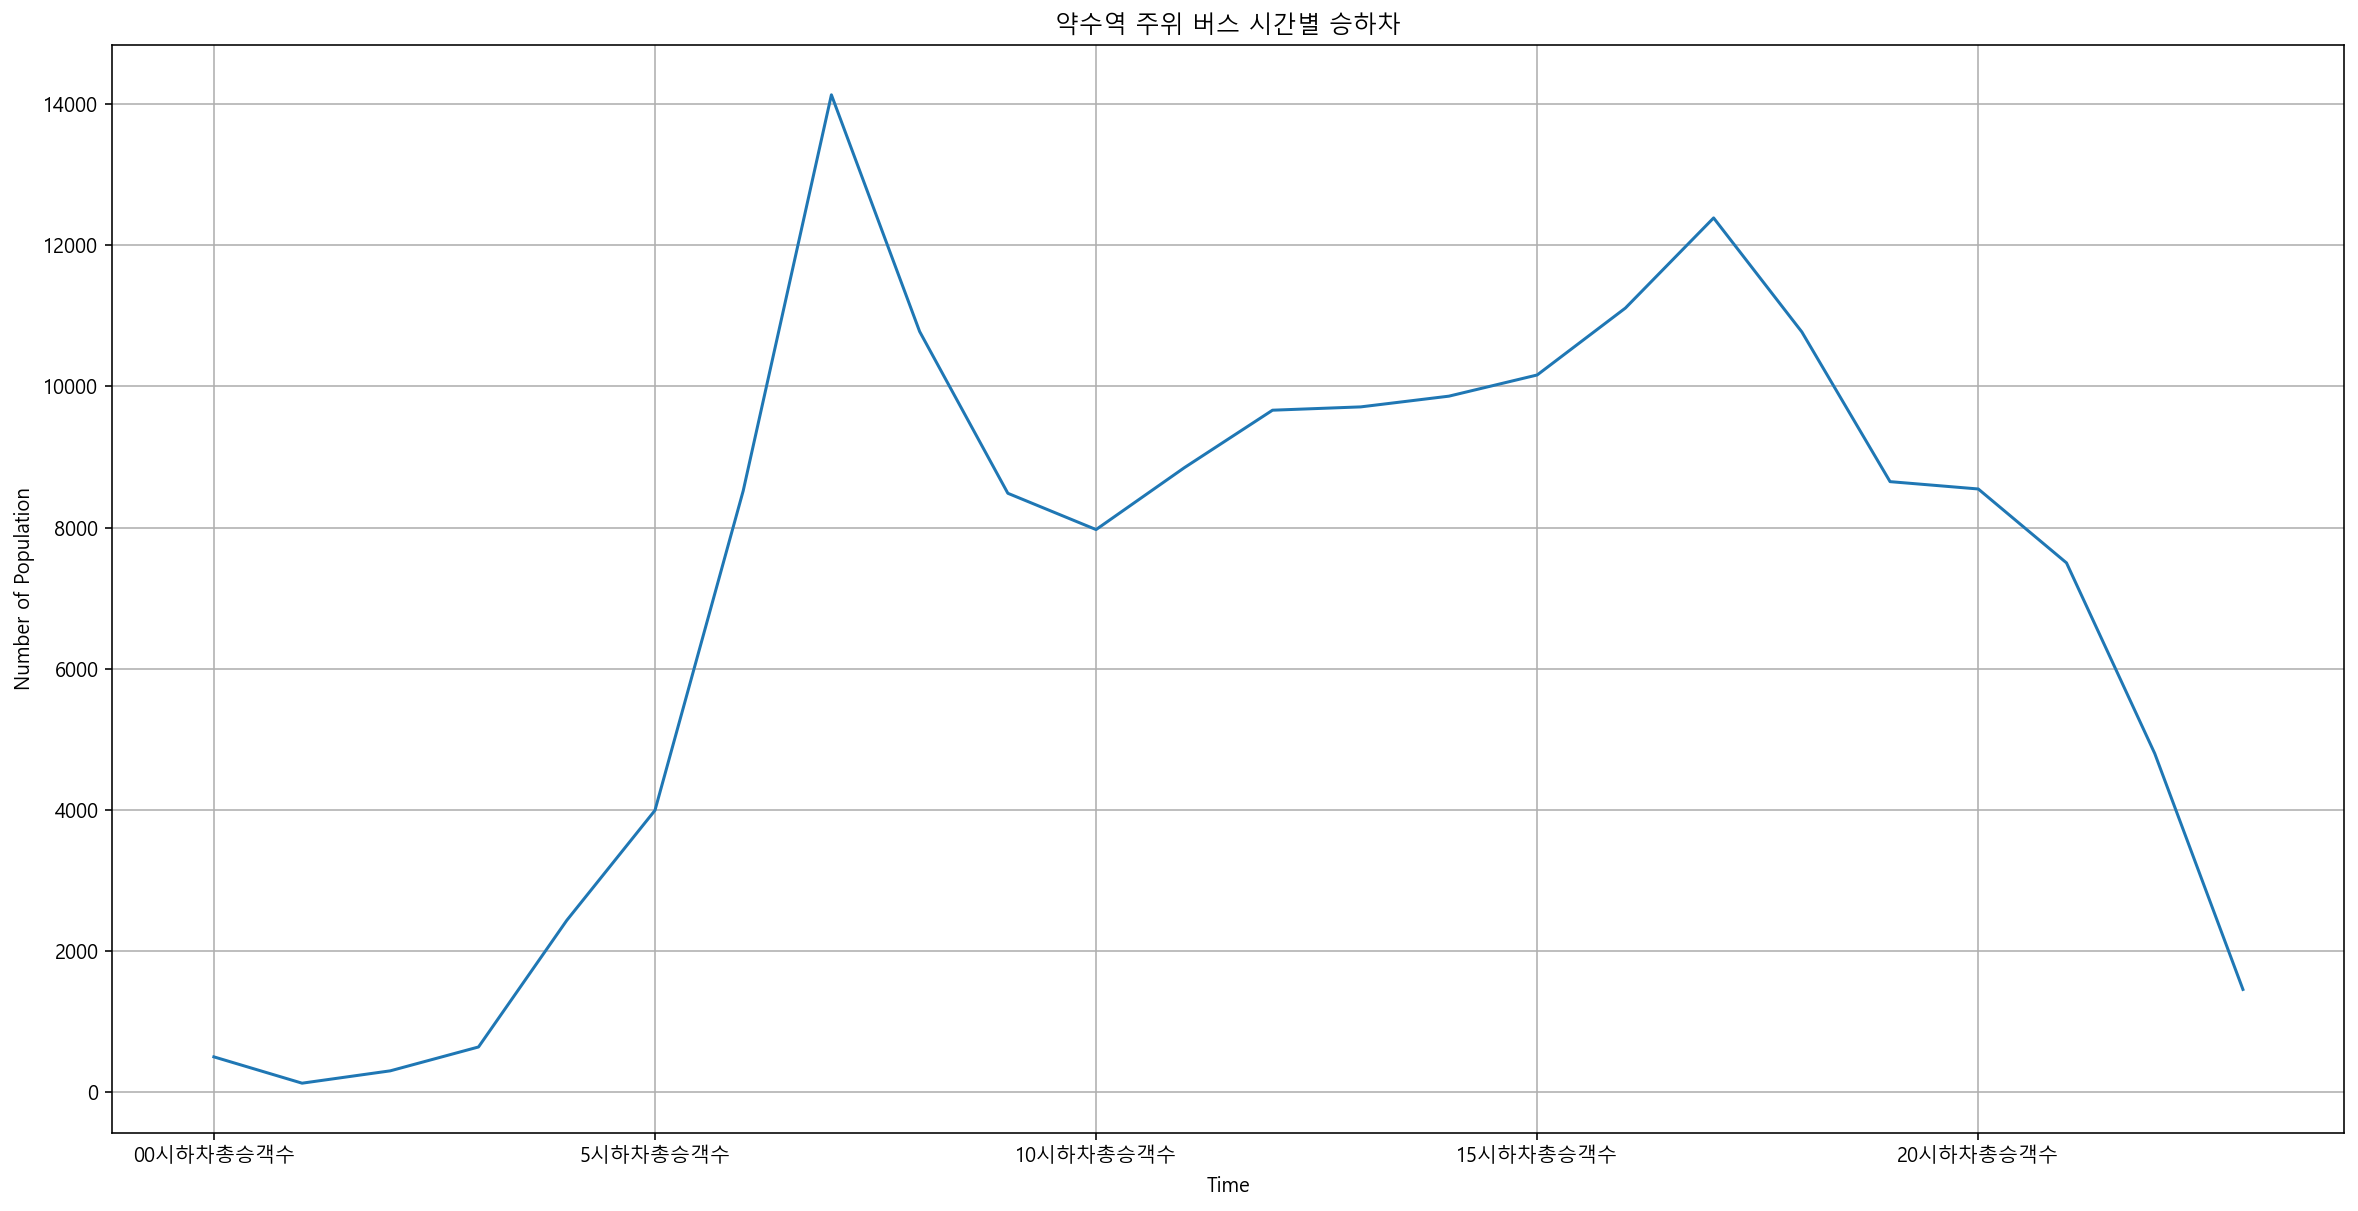

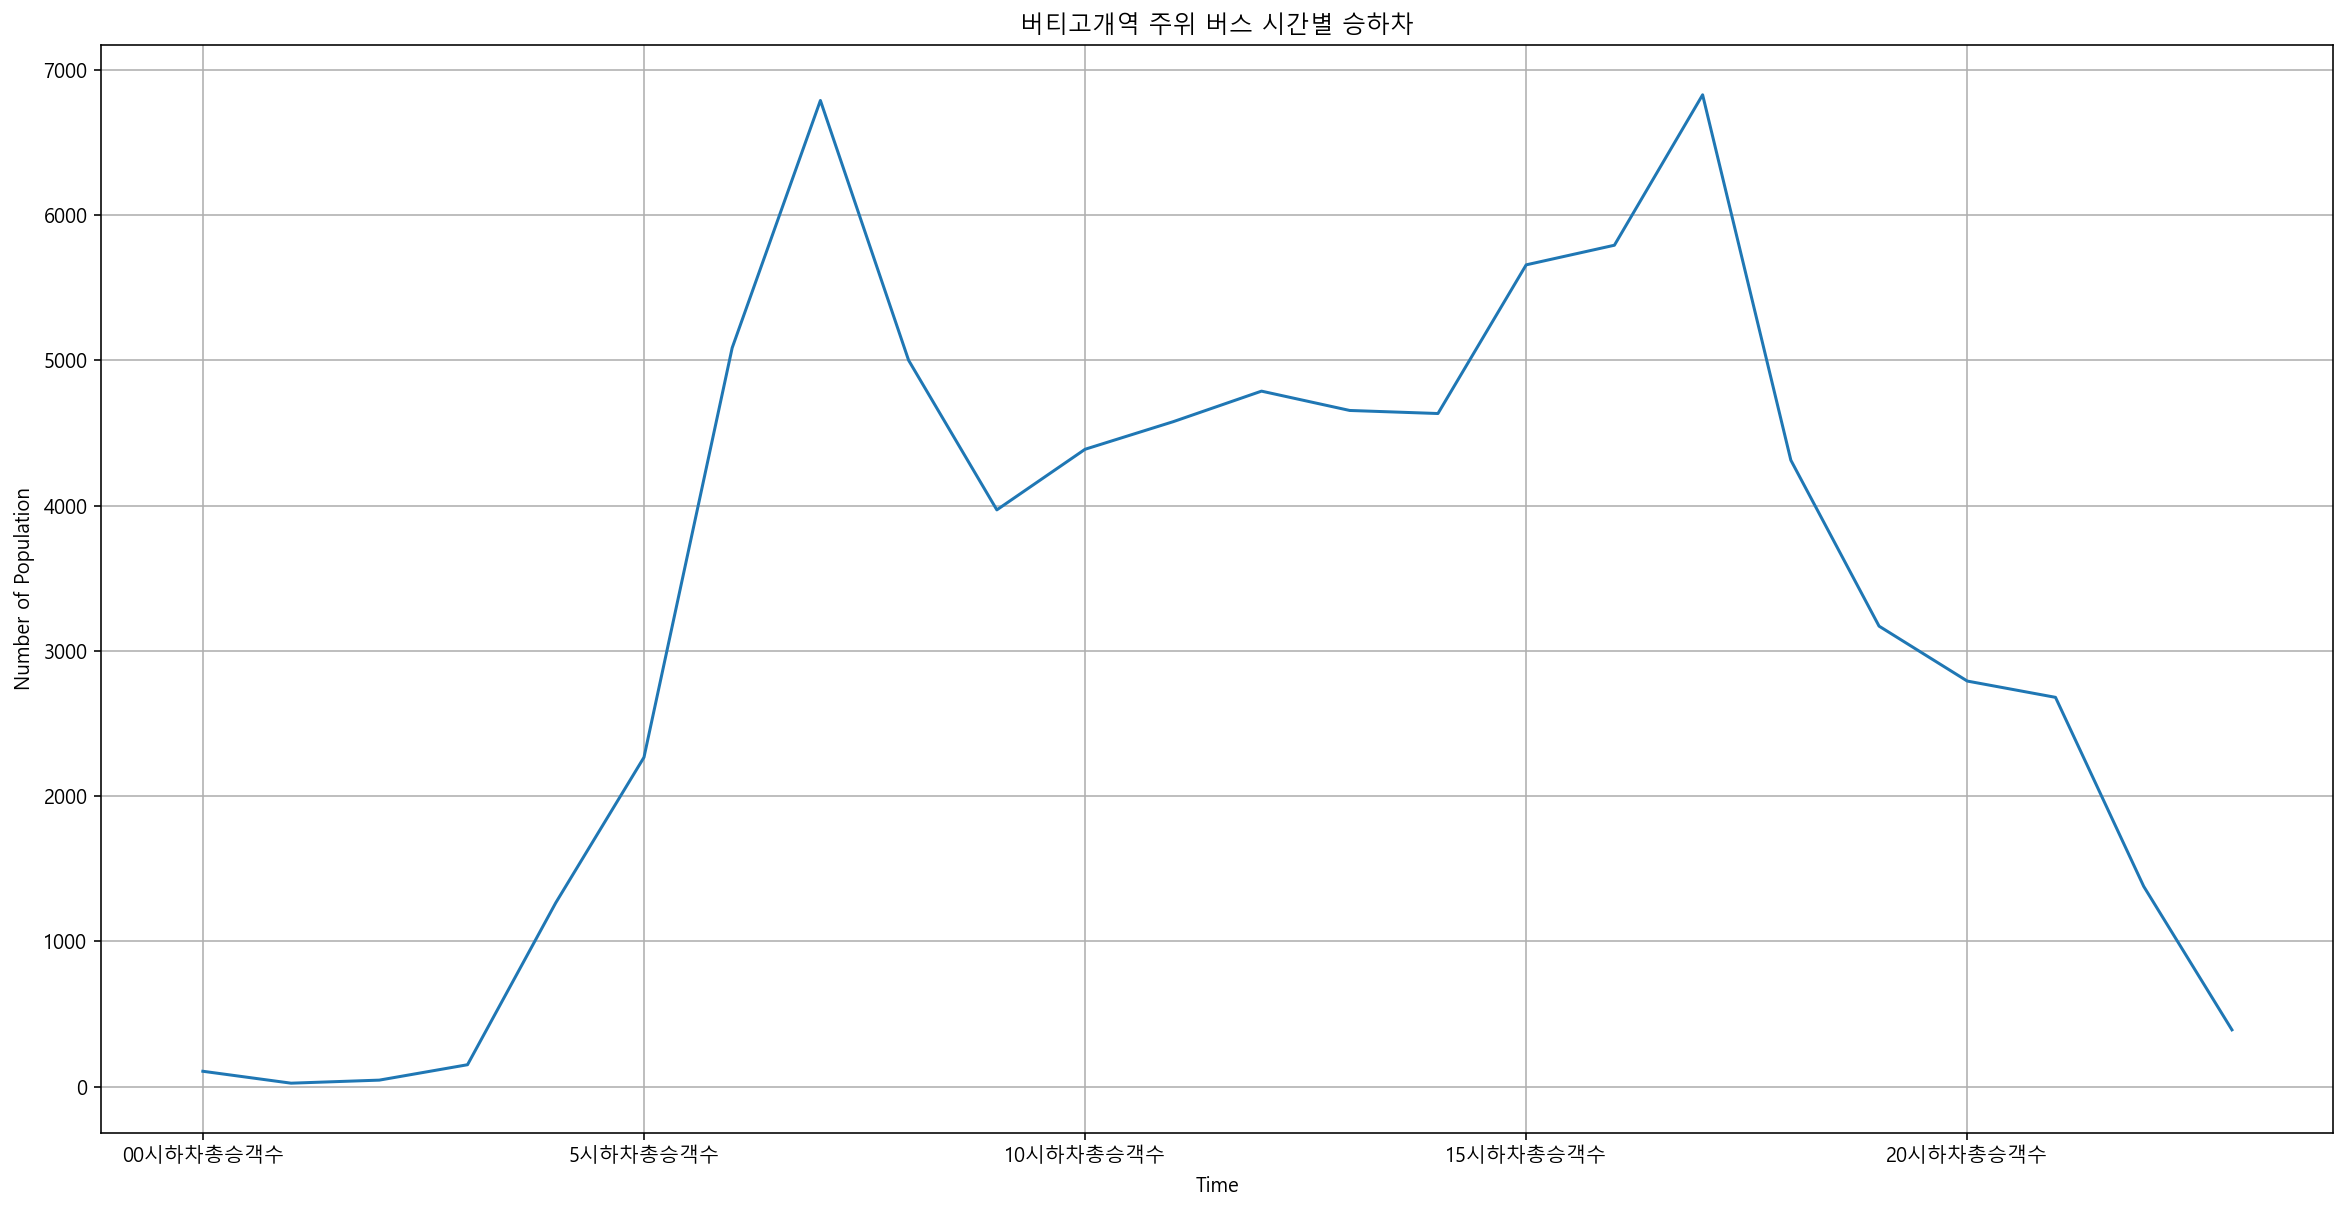

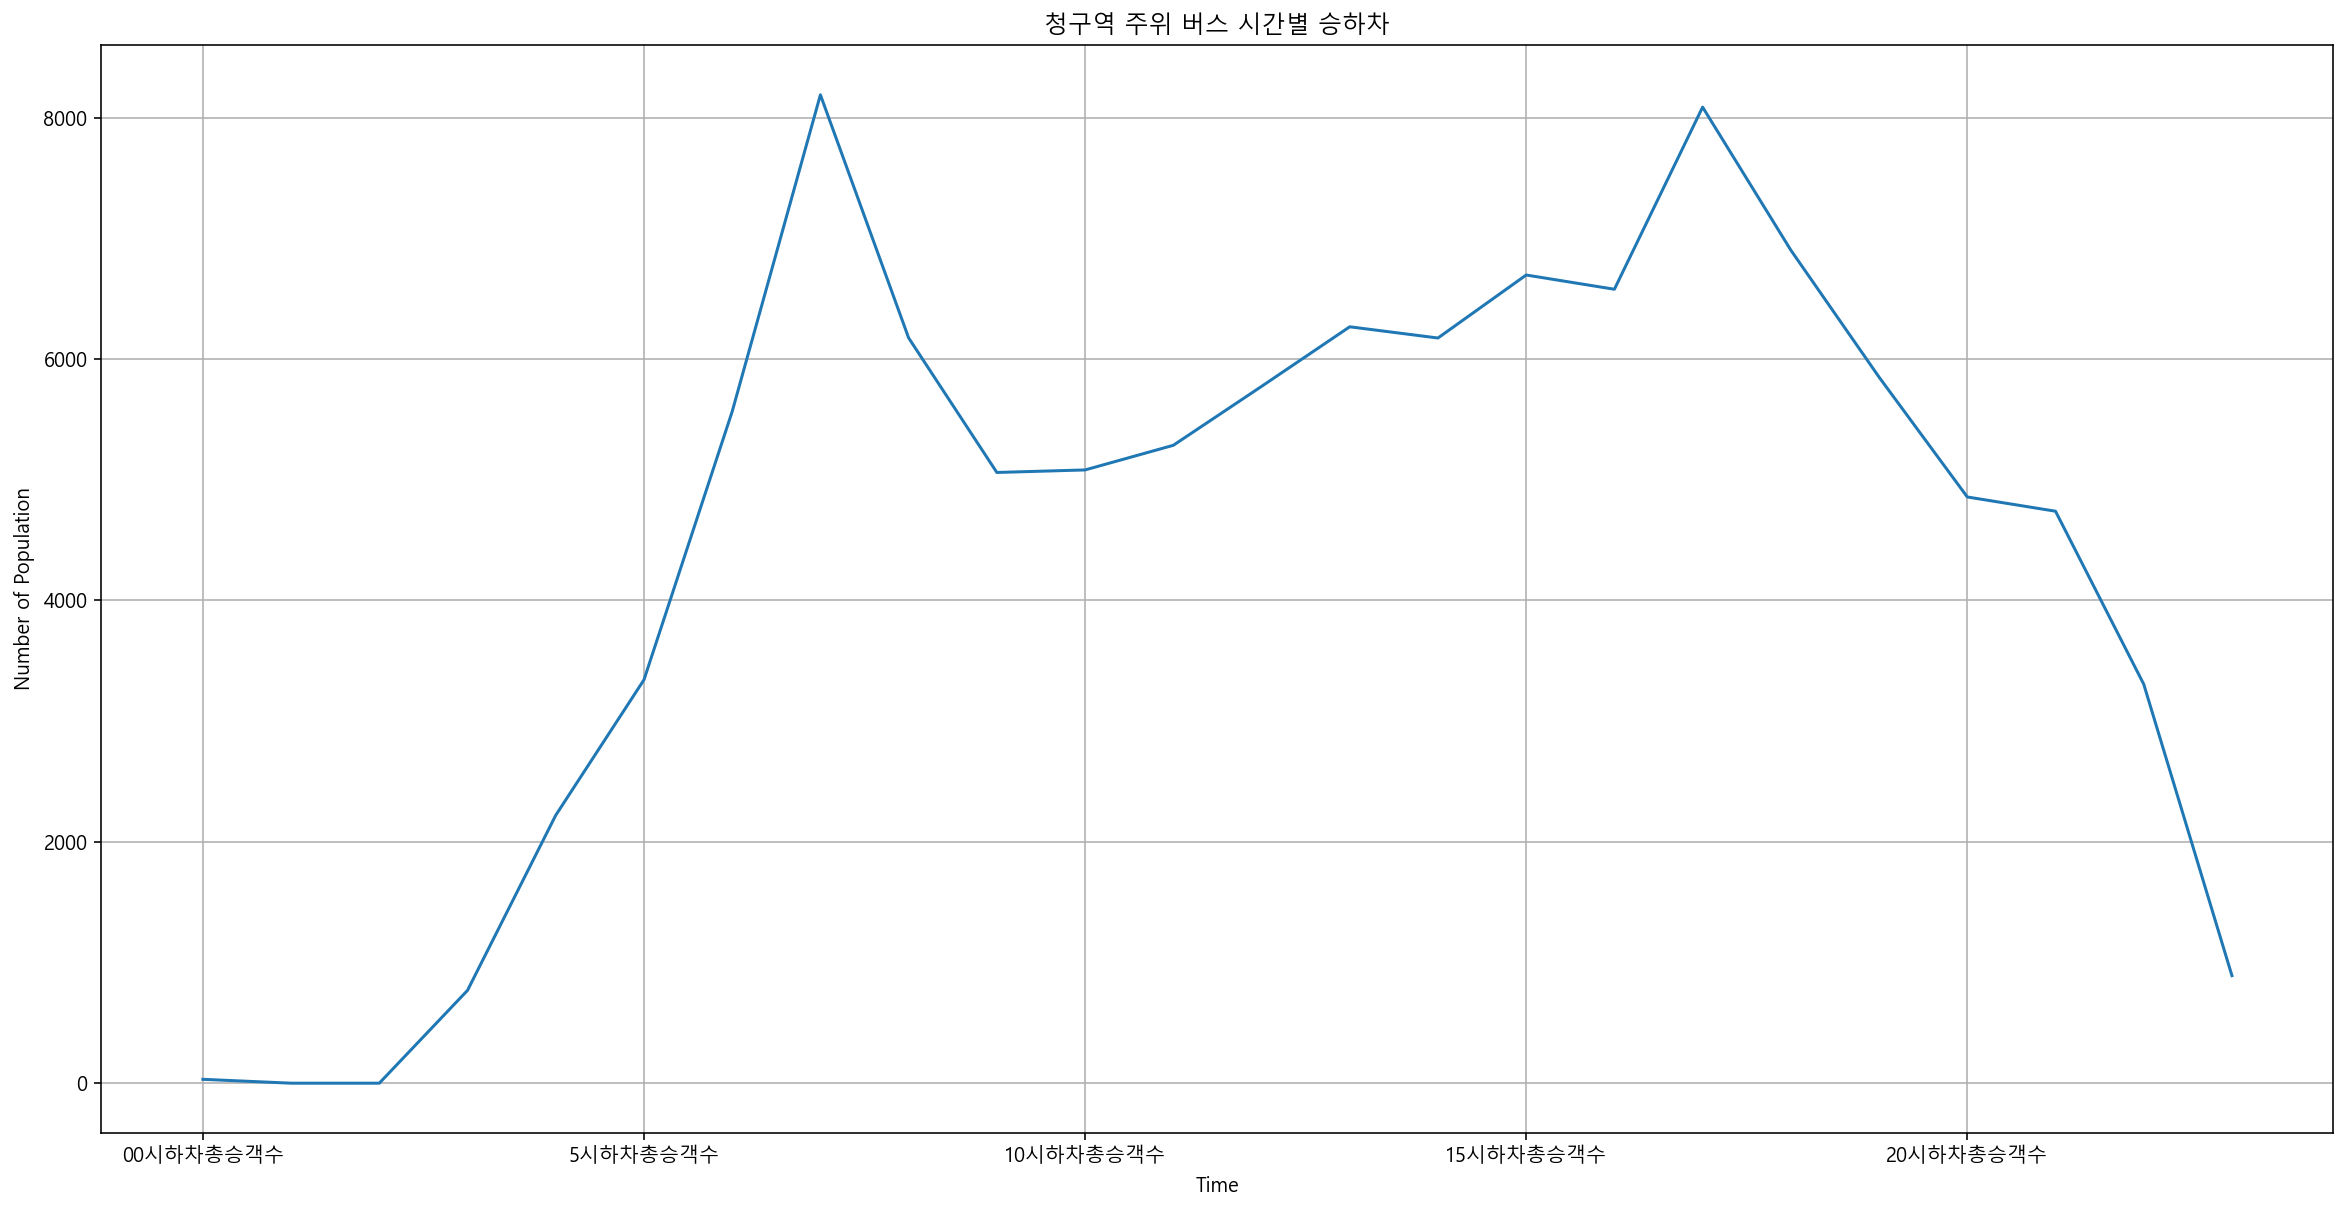

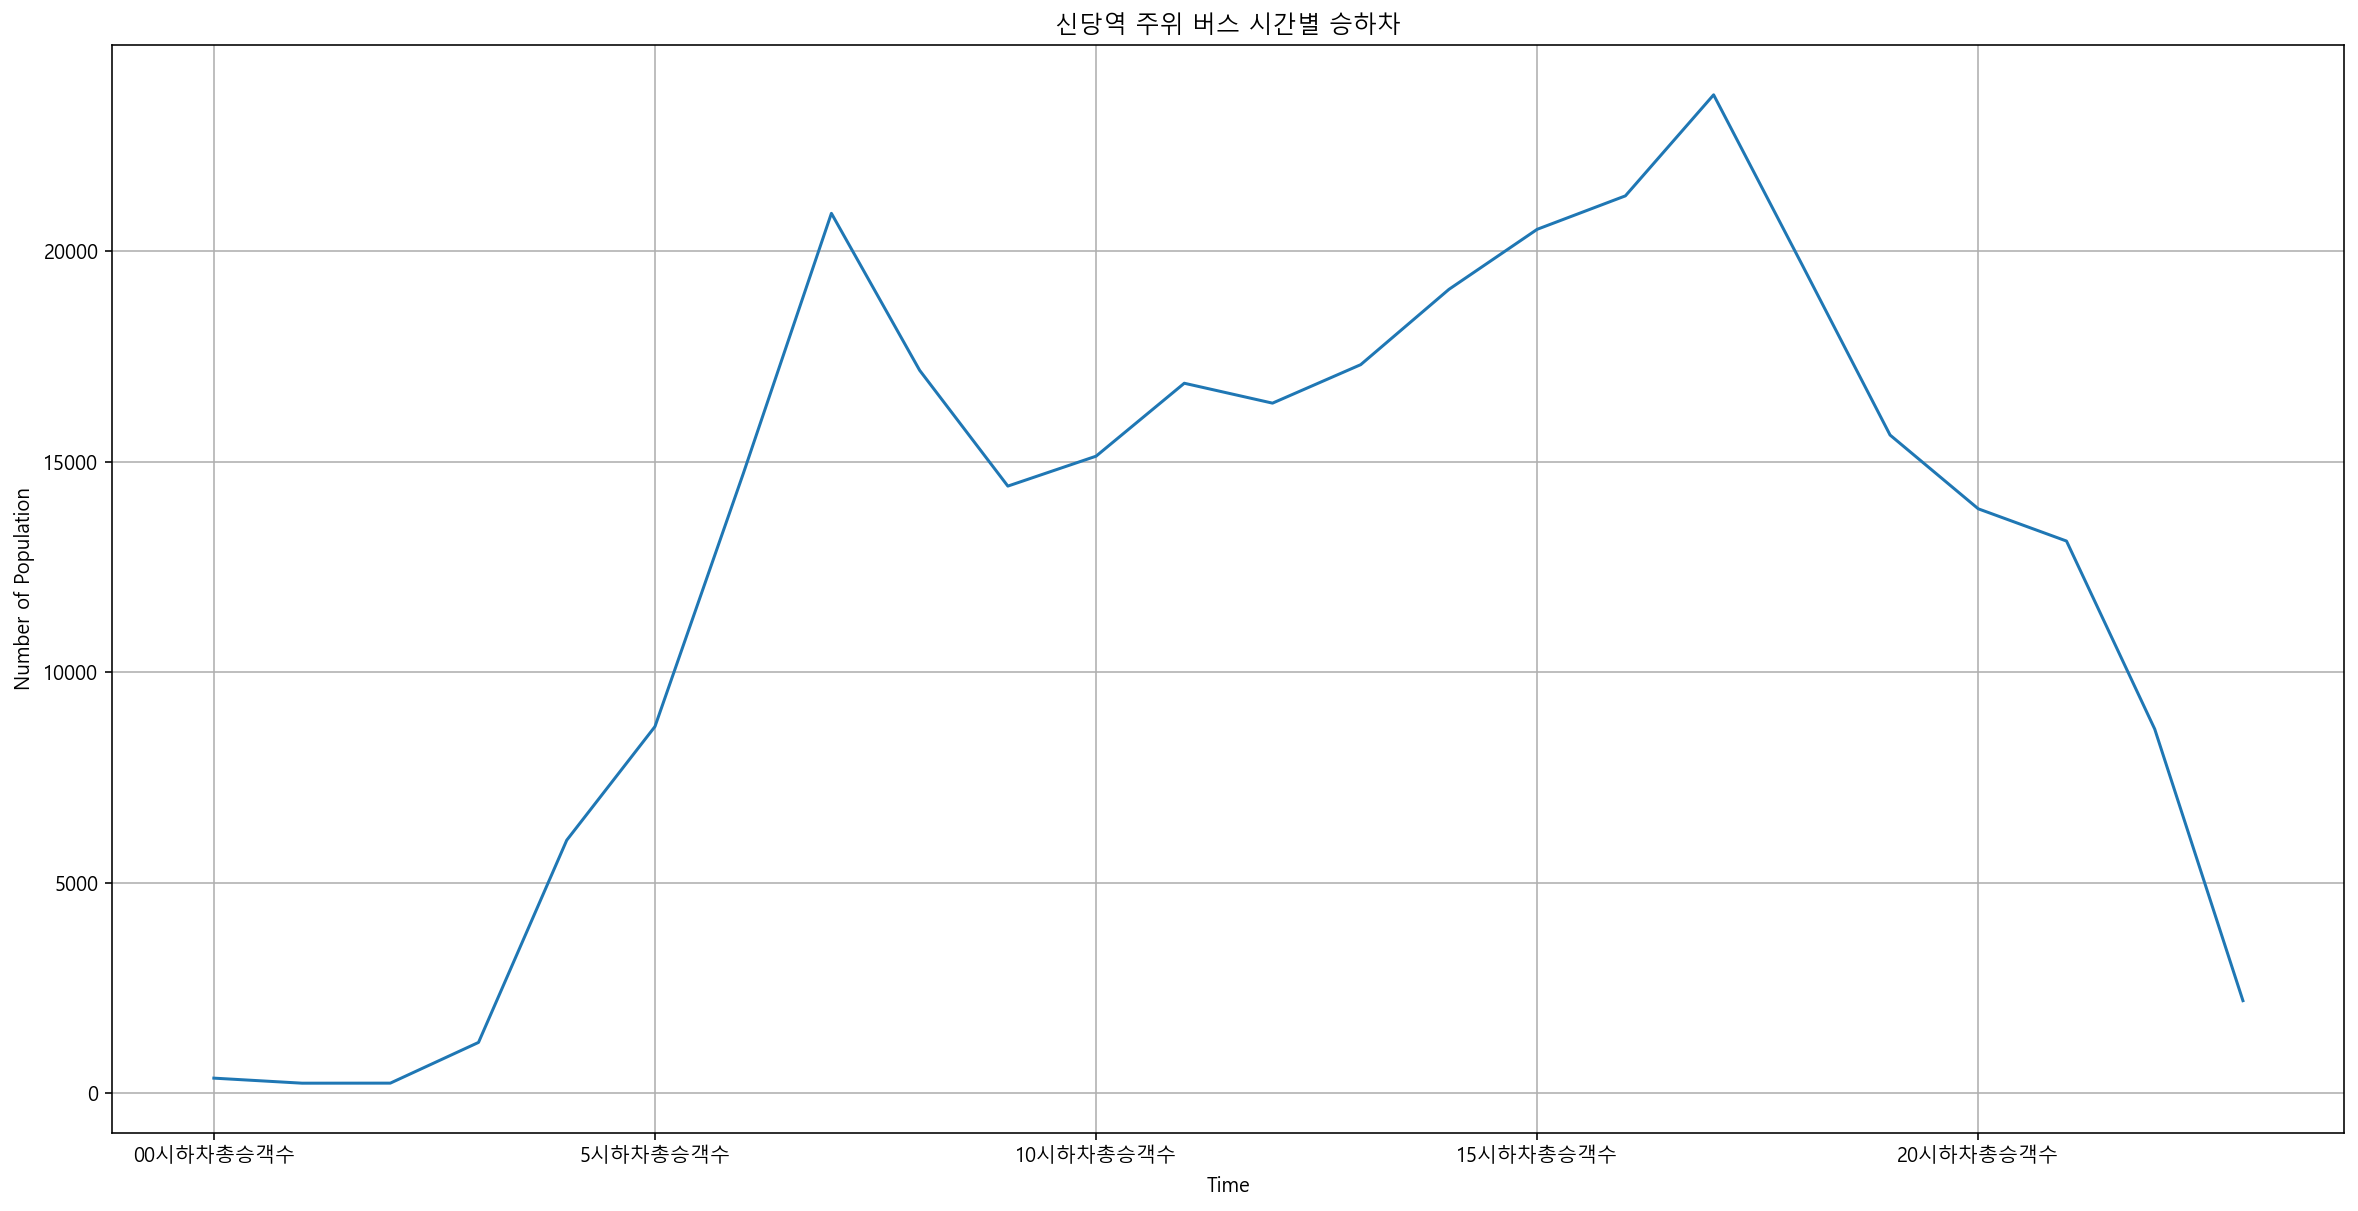

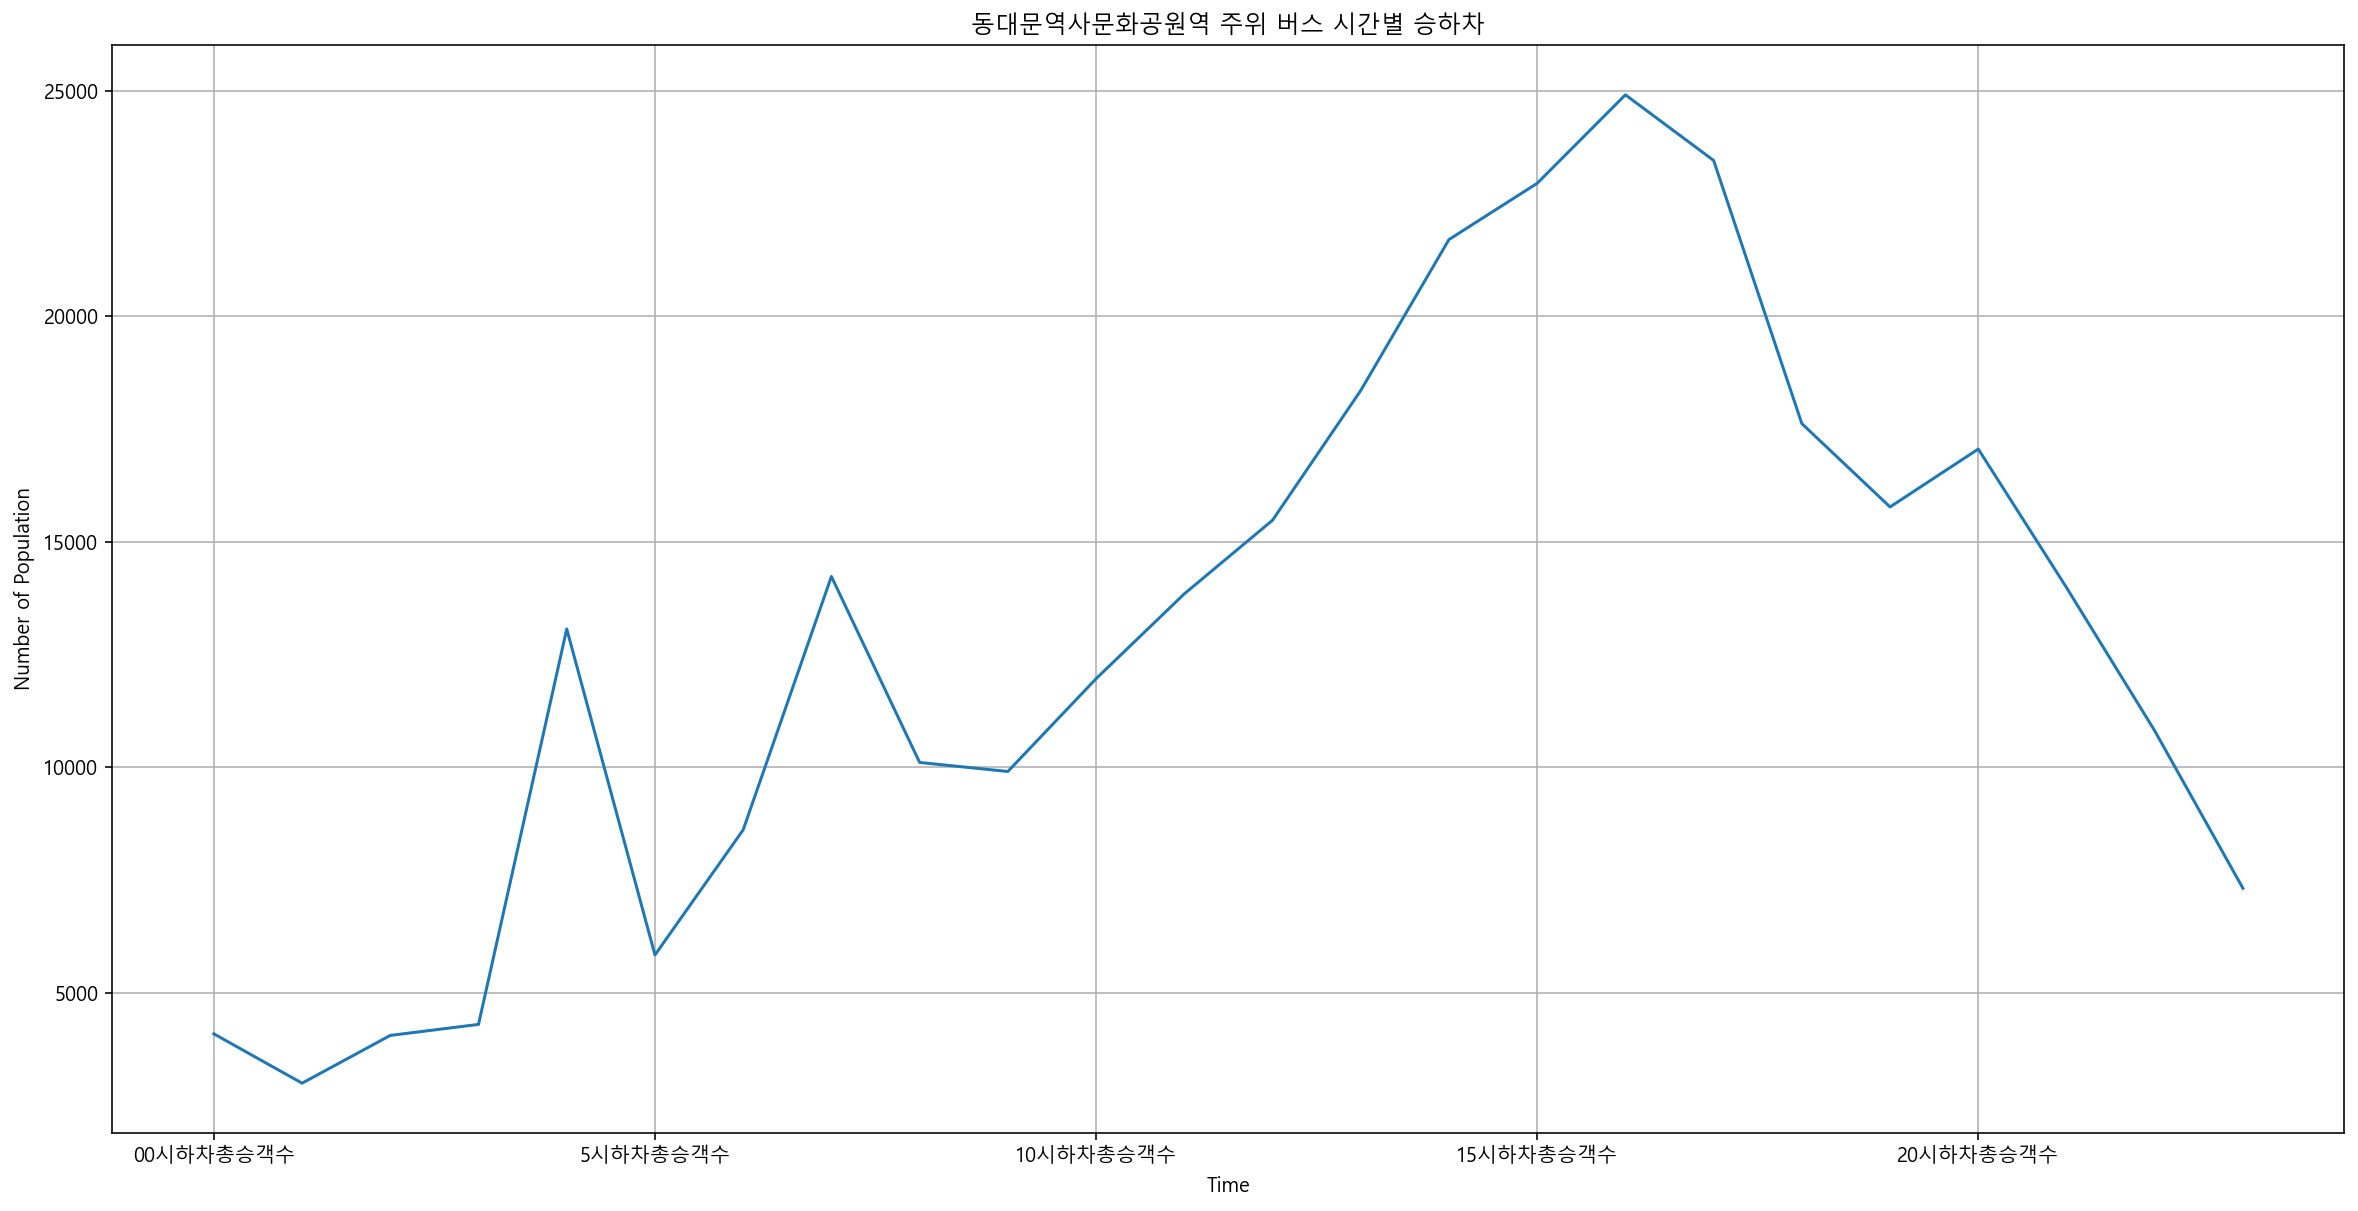

In [22]:
#중구, 2020 5월 분포 보자
for station in Seoul_junggu:
    drawing(bt_down_8, station)

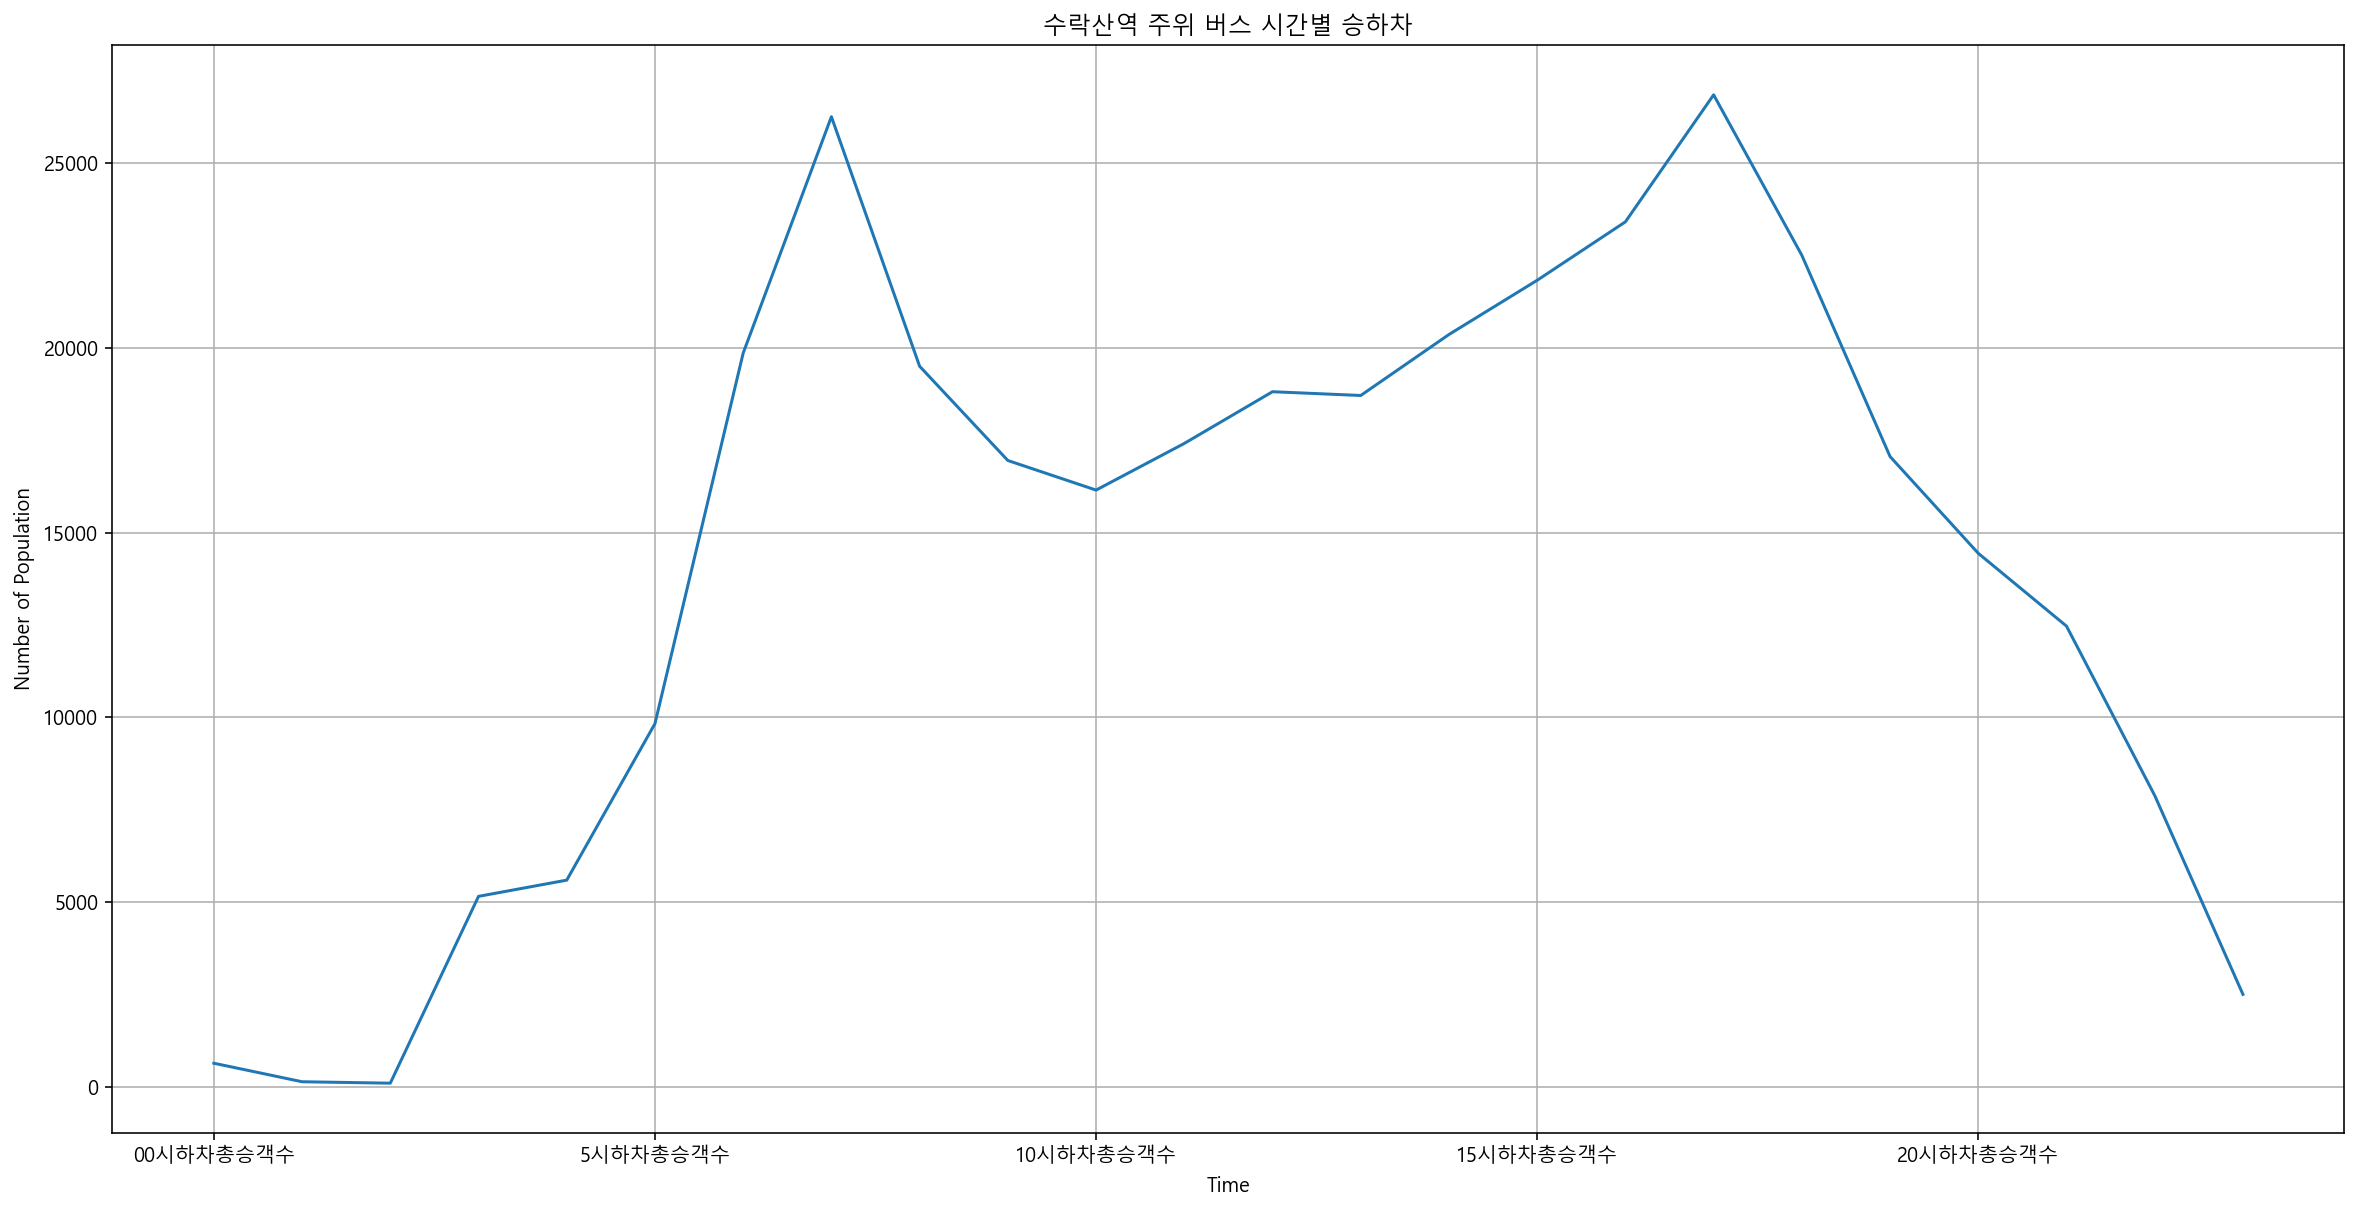

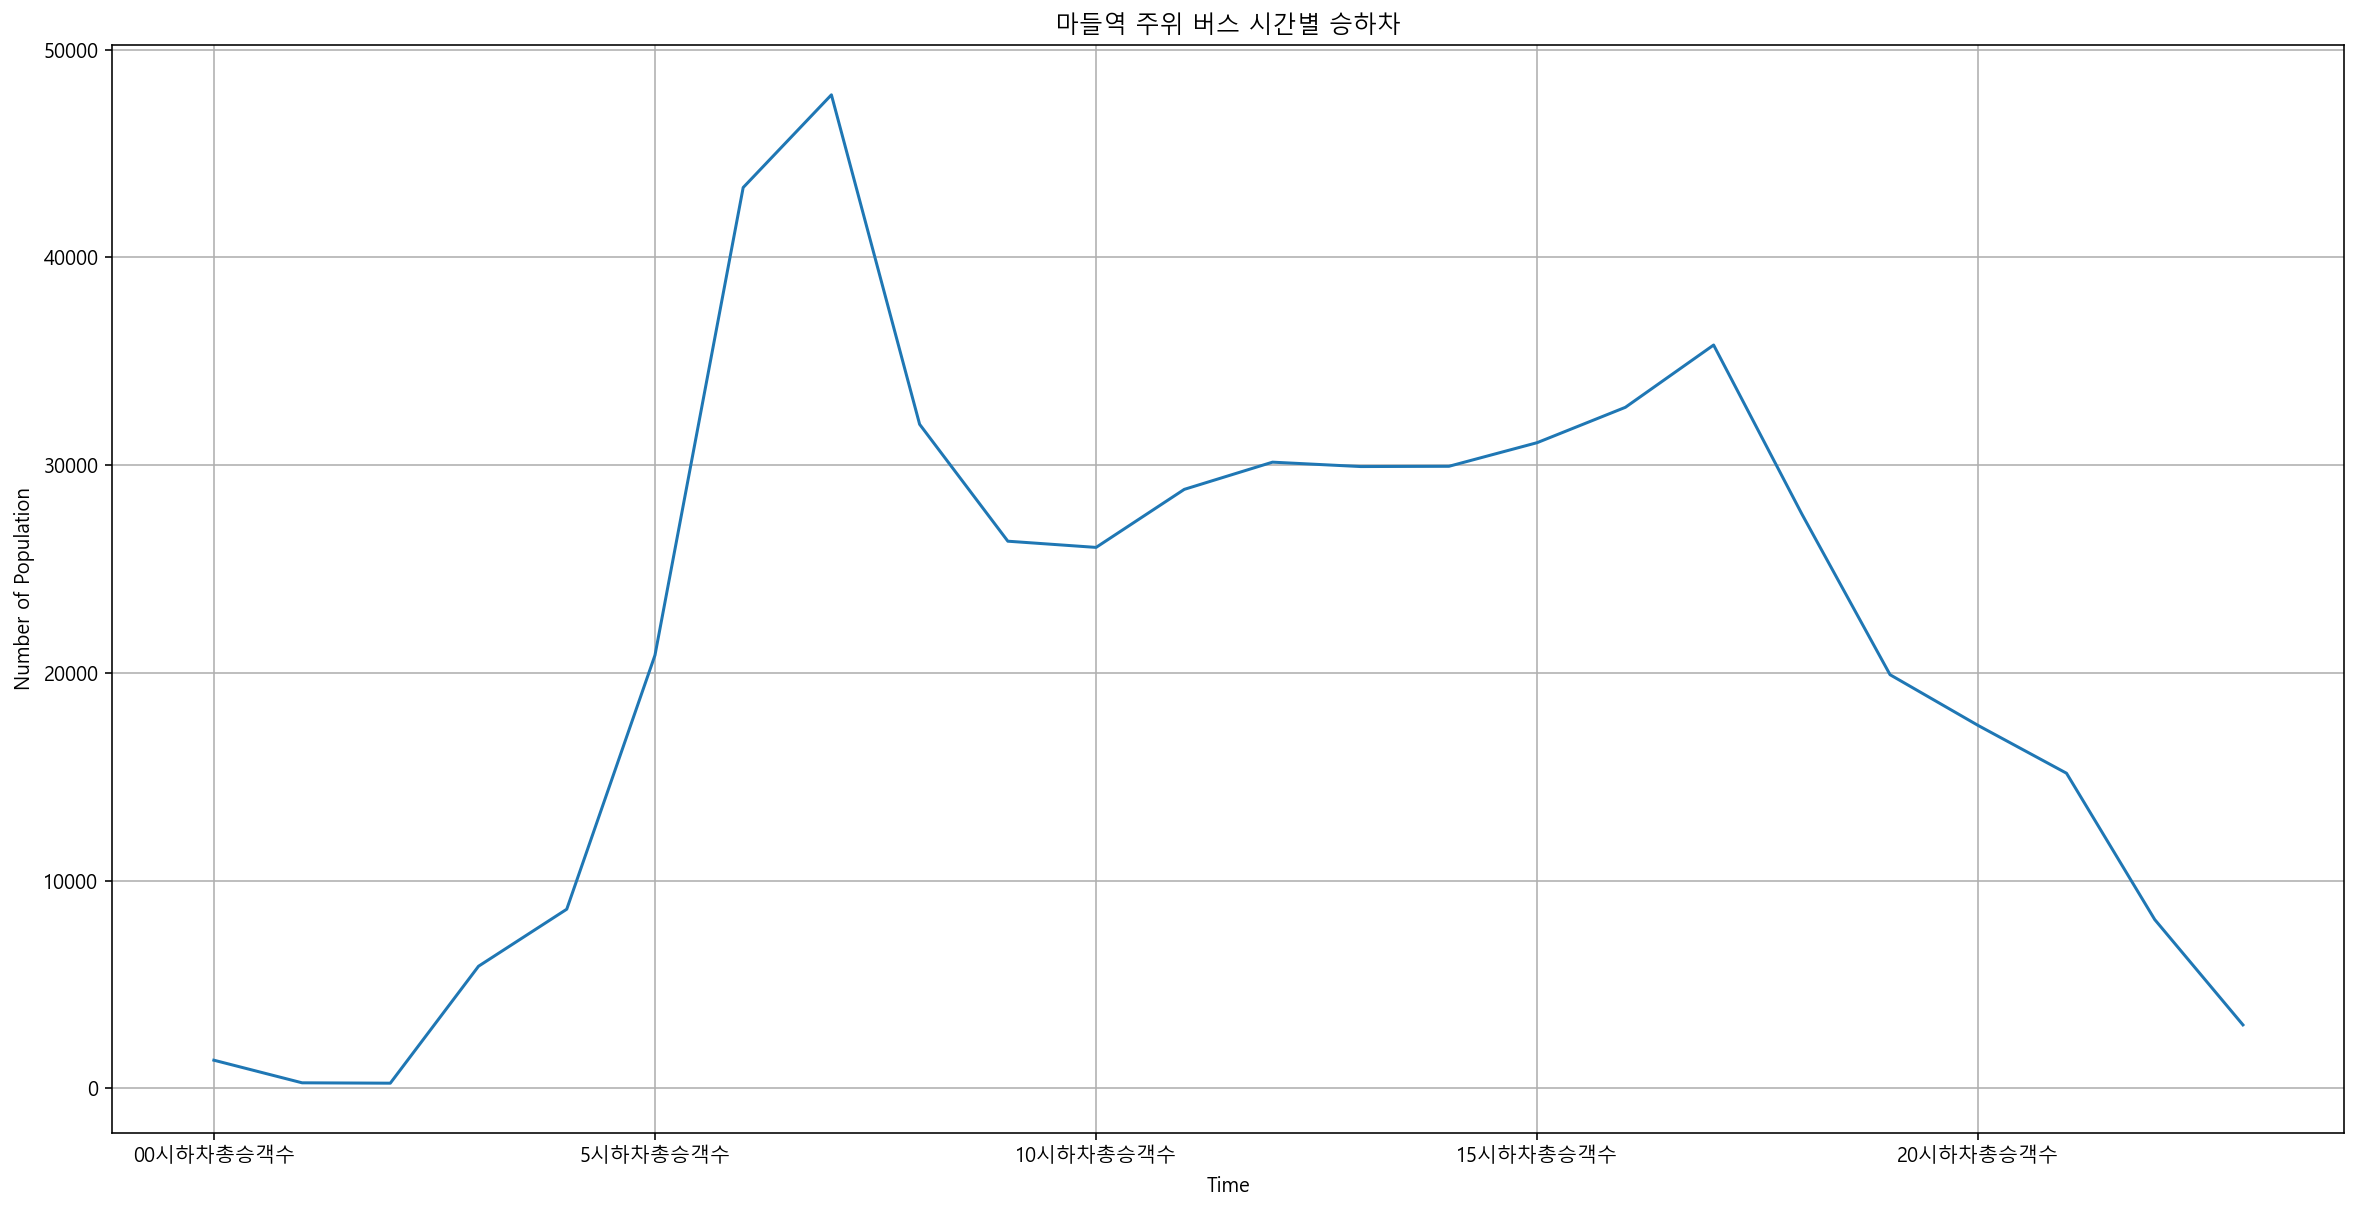

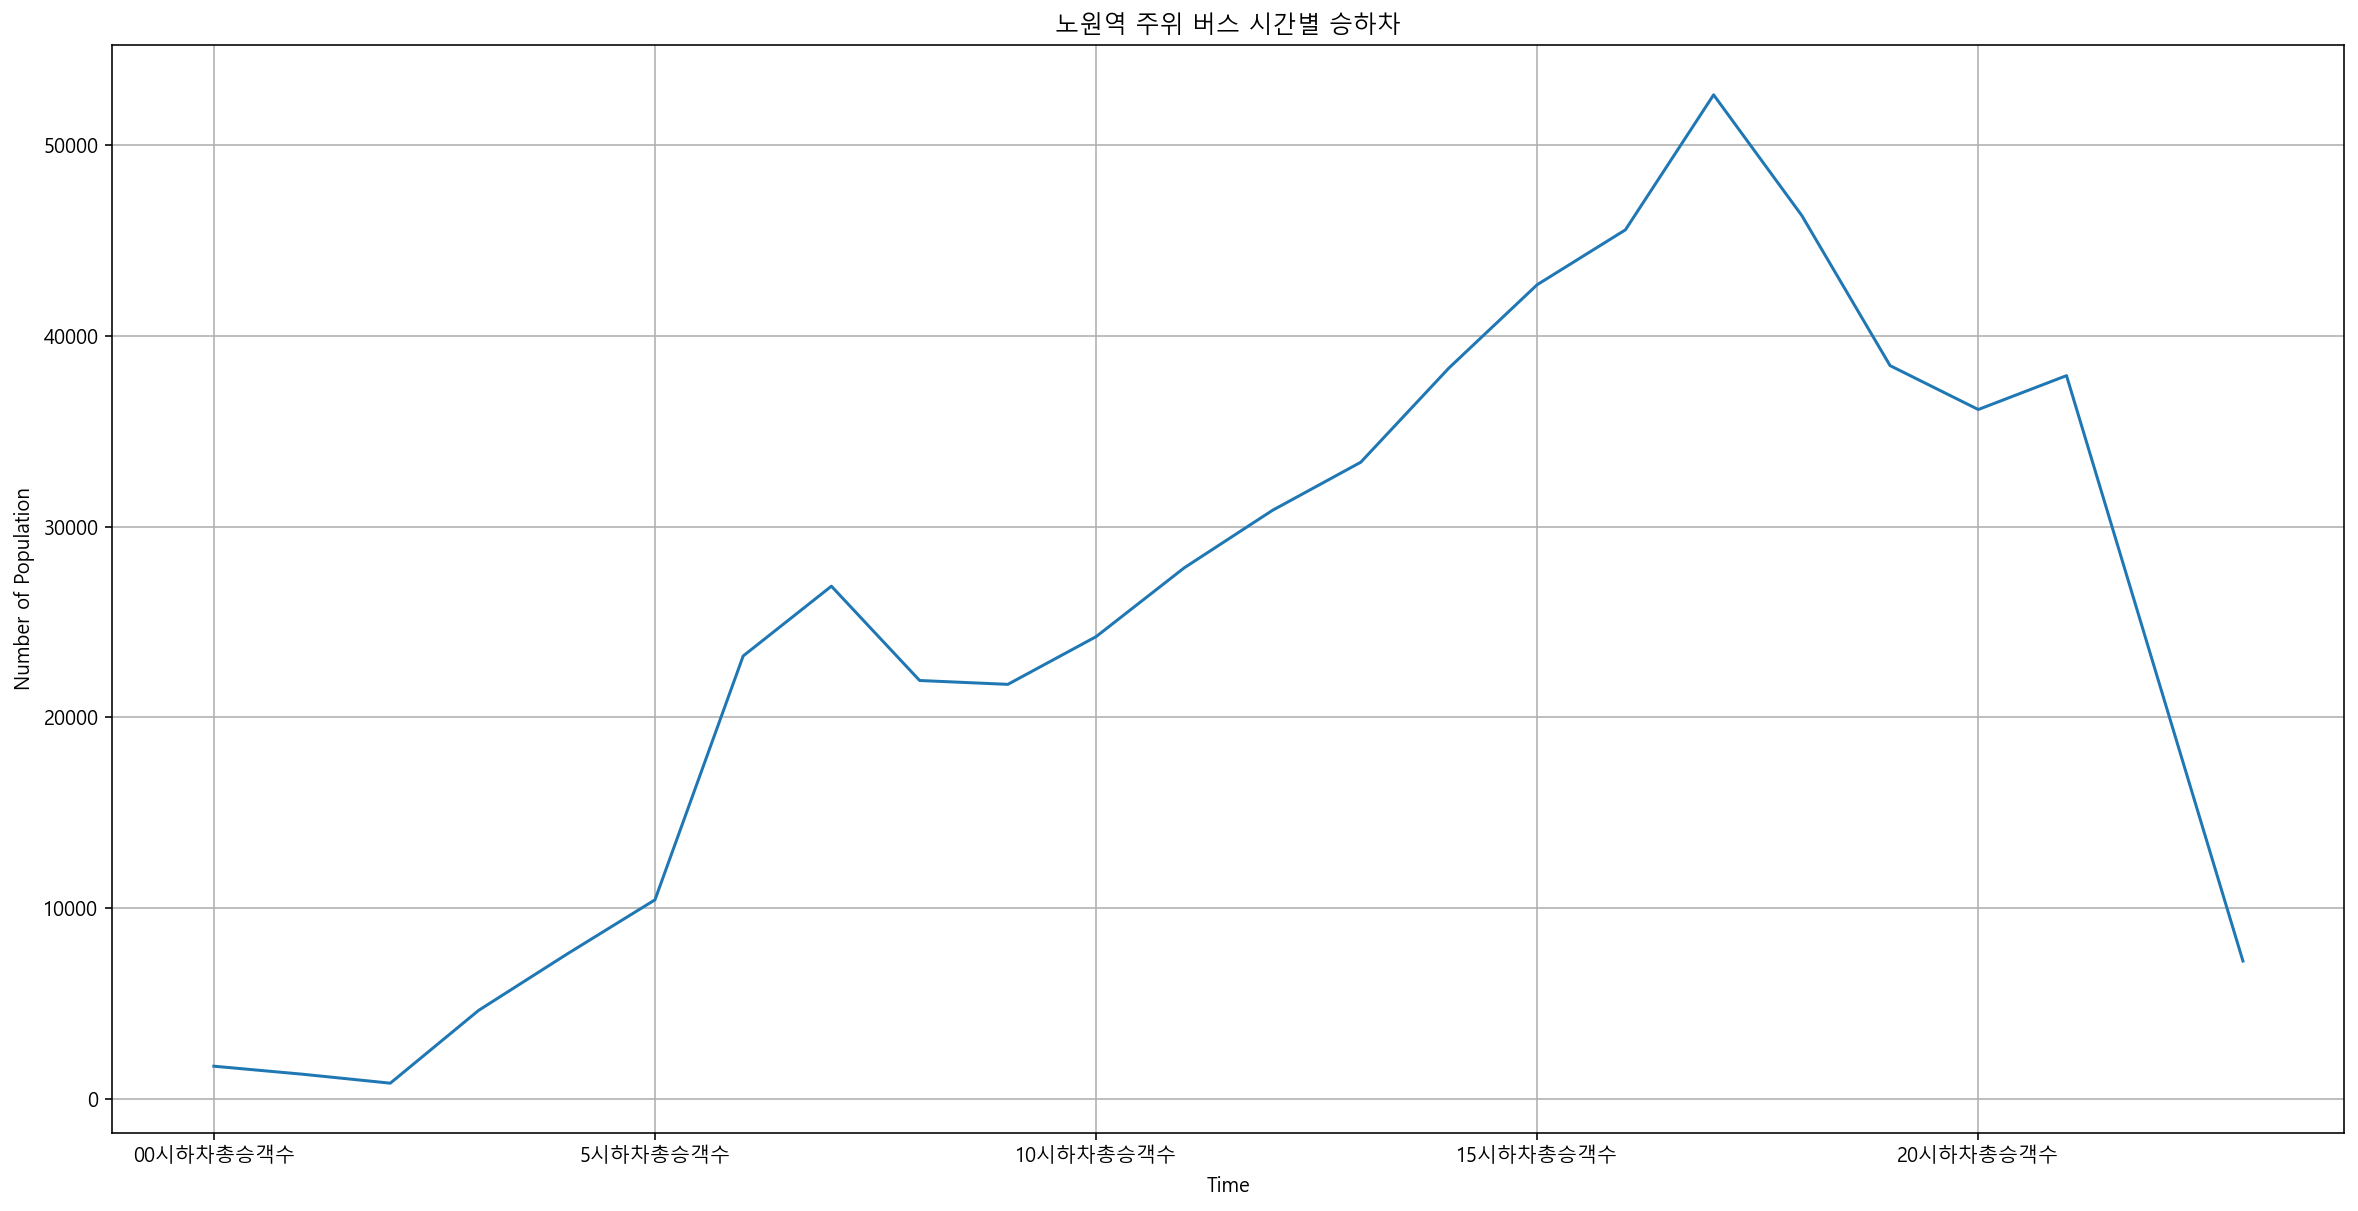

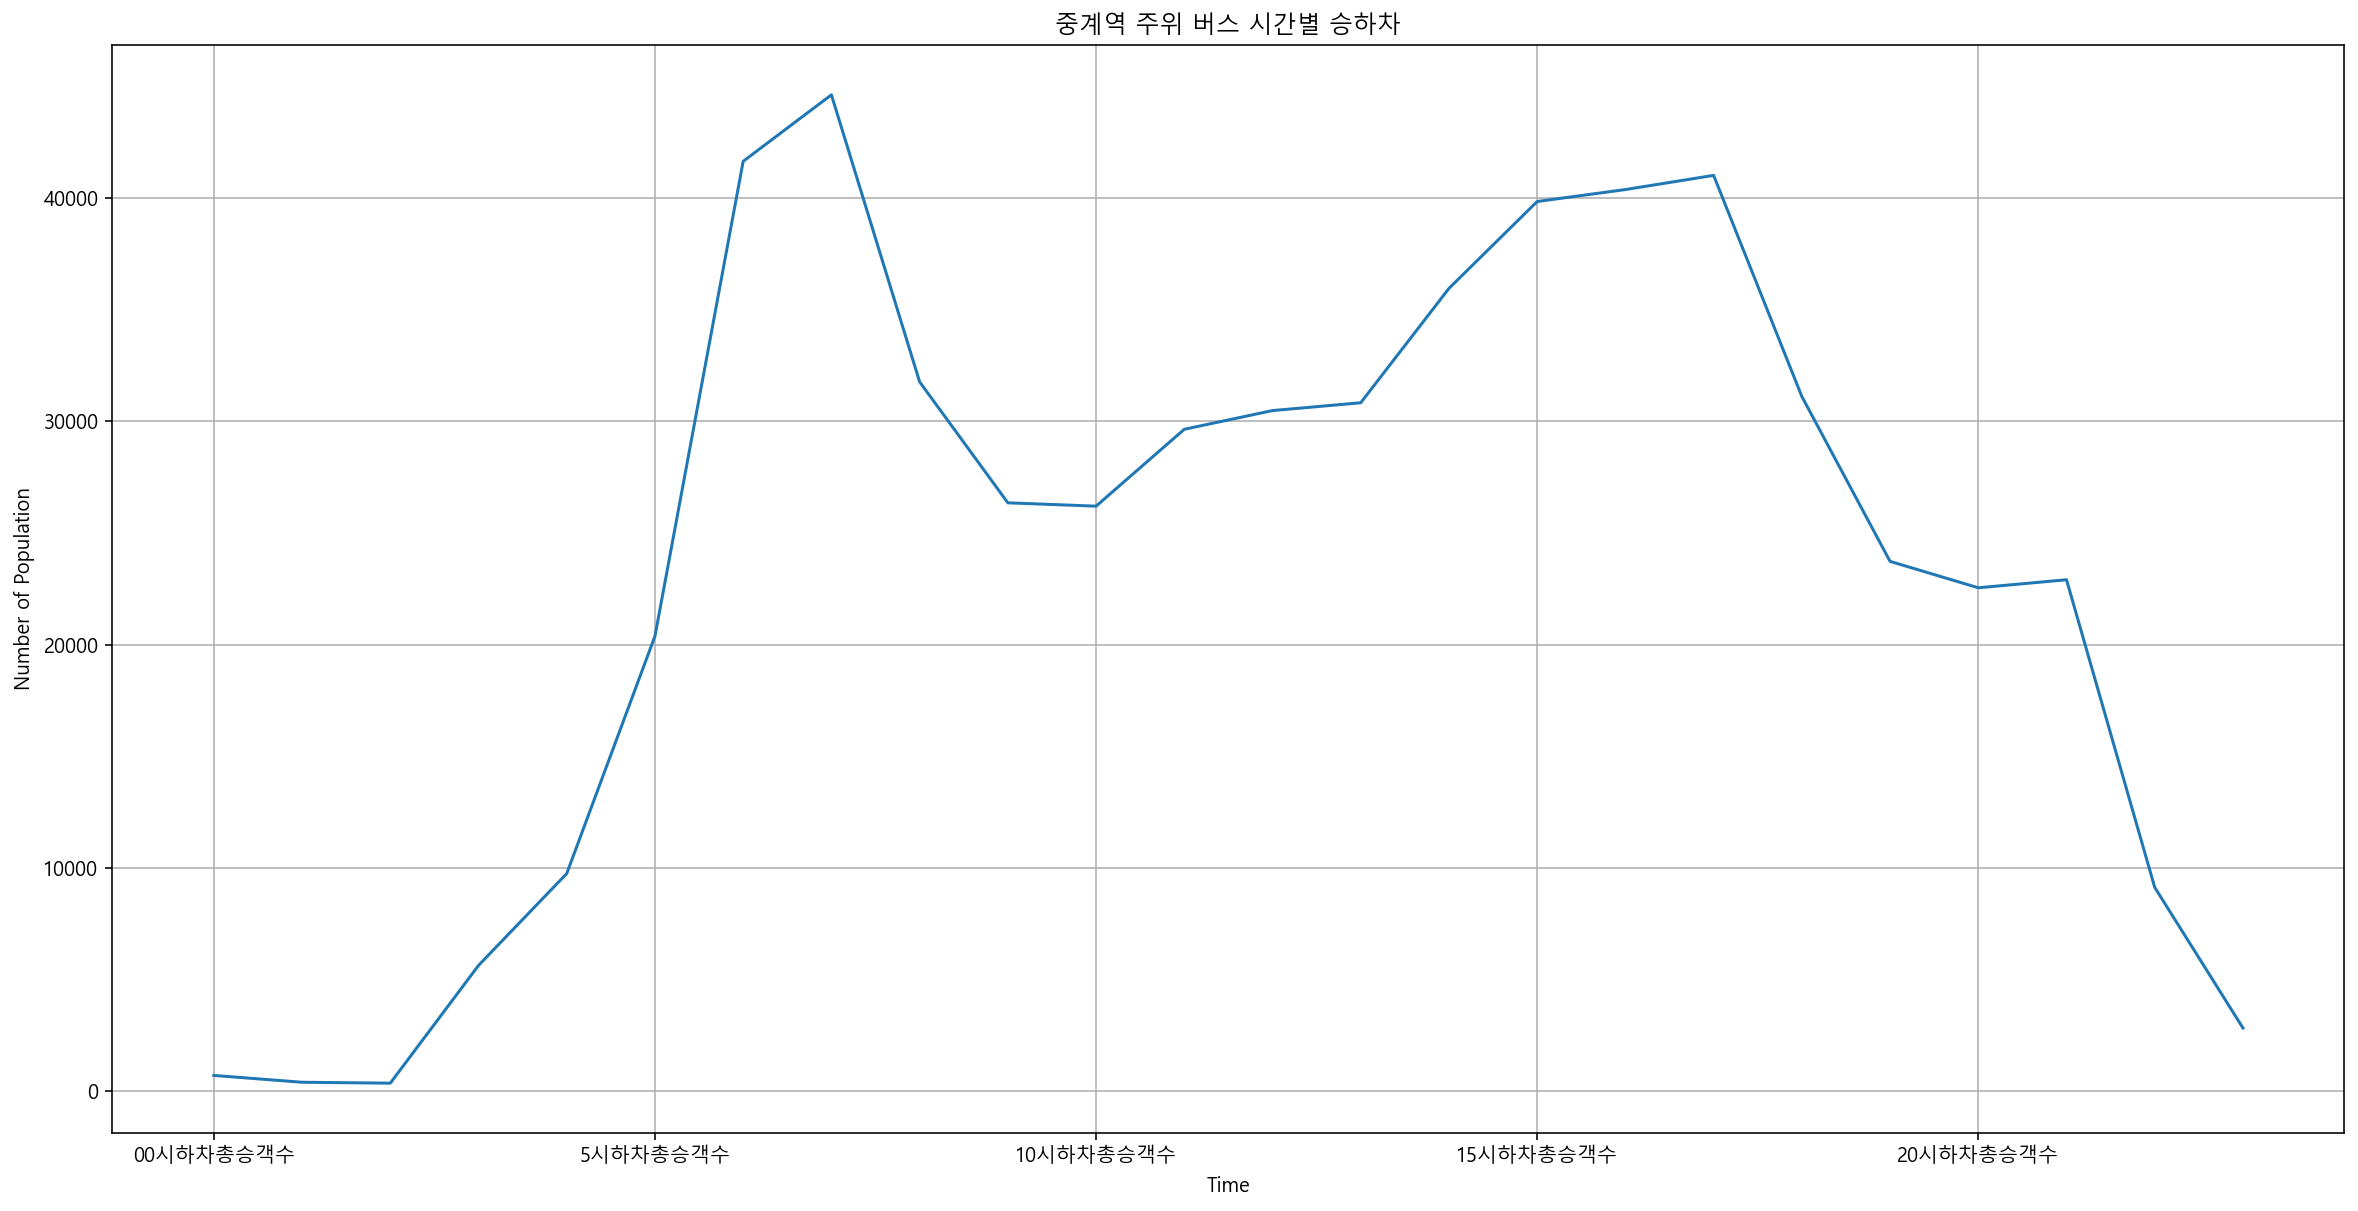

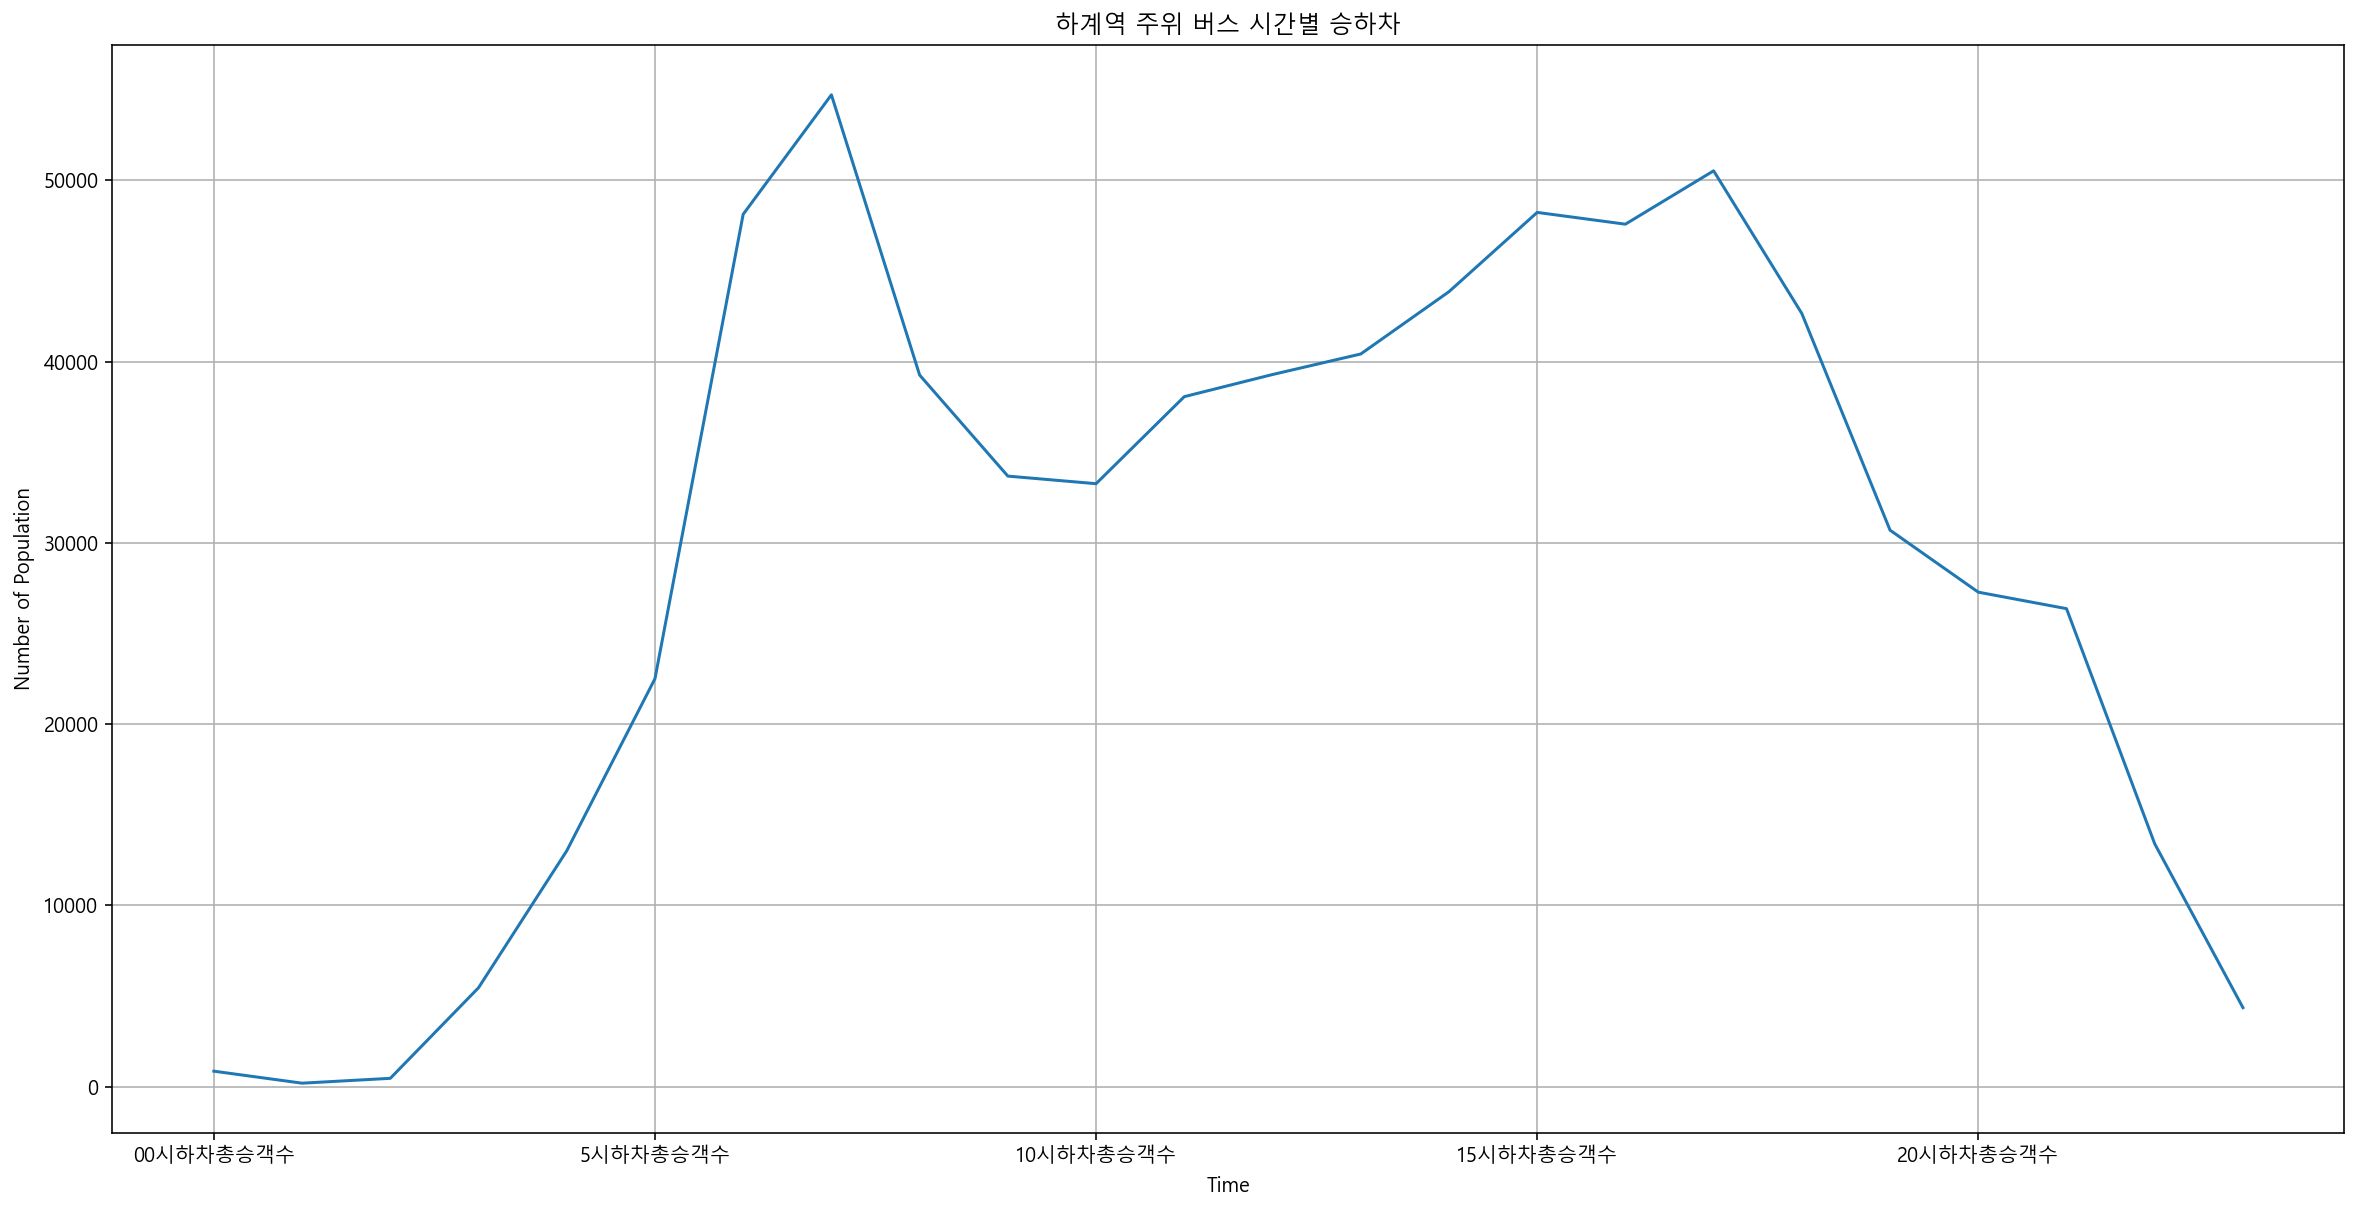

월계역은 데이터에 존재하지 않습니다
광운대역은 데이터에 존재하지 않습니다


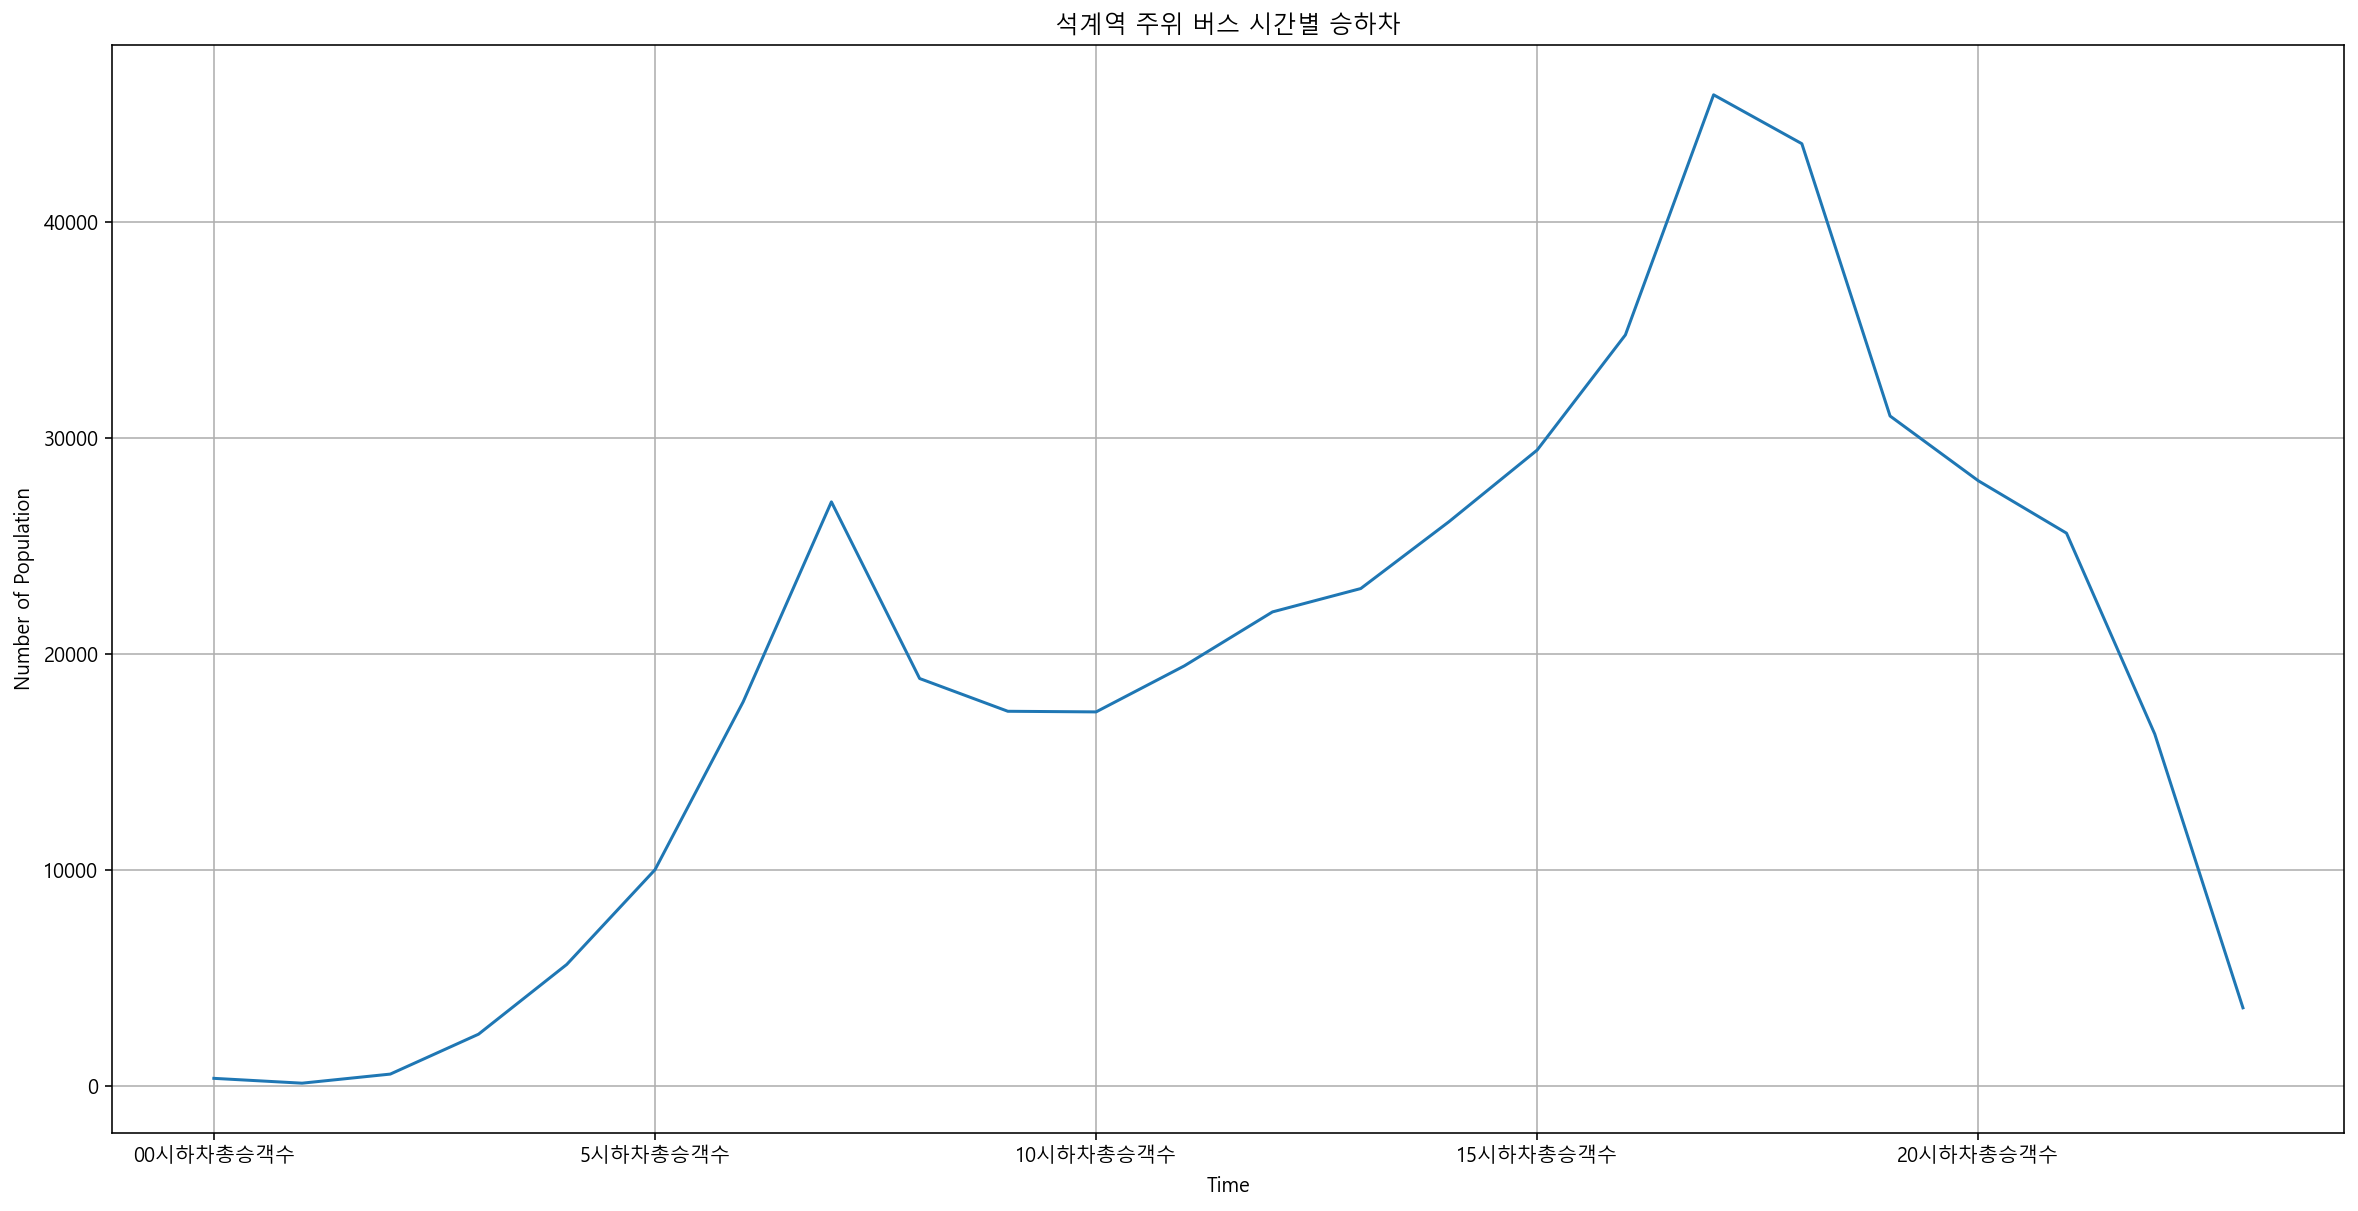

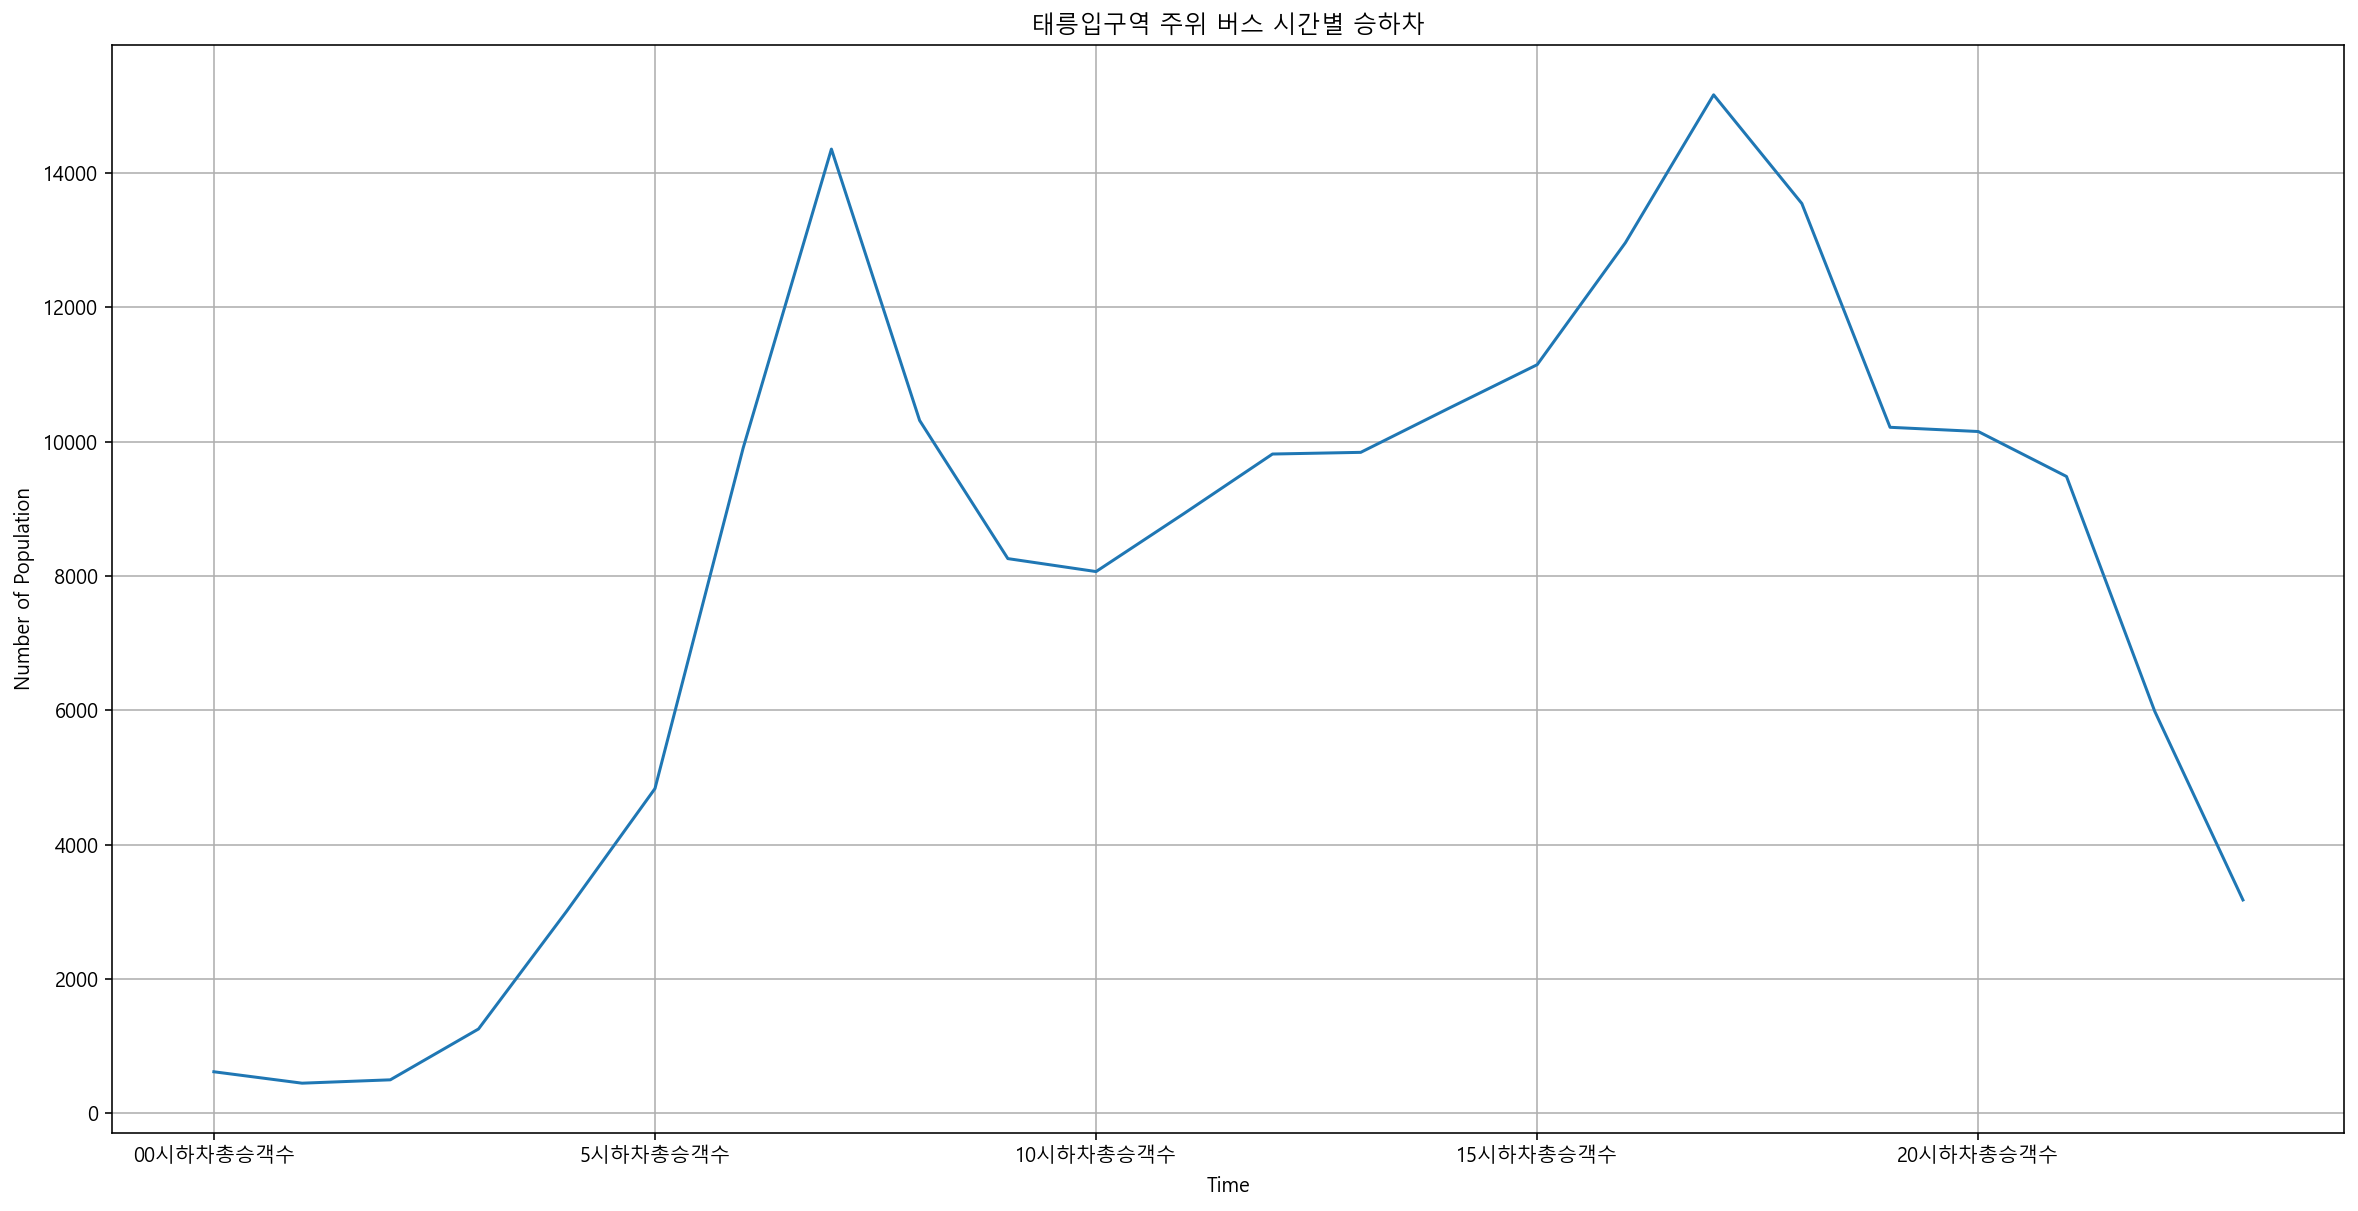

화랑대역은 데이터에 존재하지 않습니다
공릉역은 데이터에 존재하지 않습니다


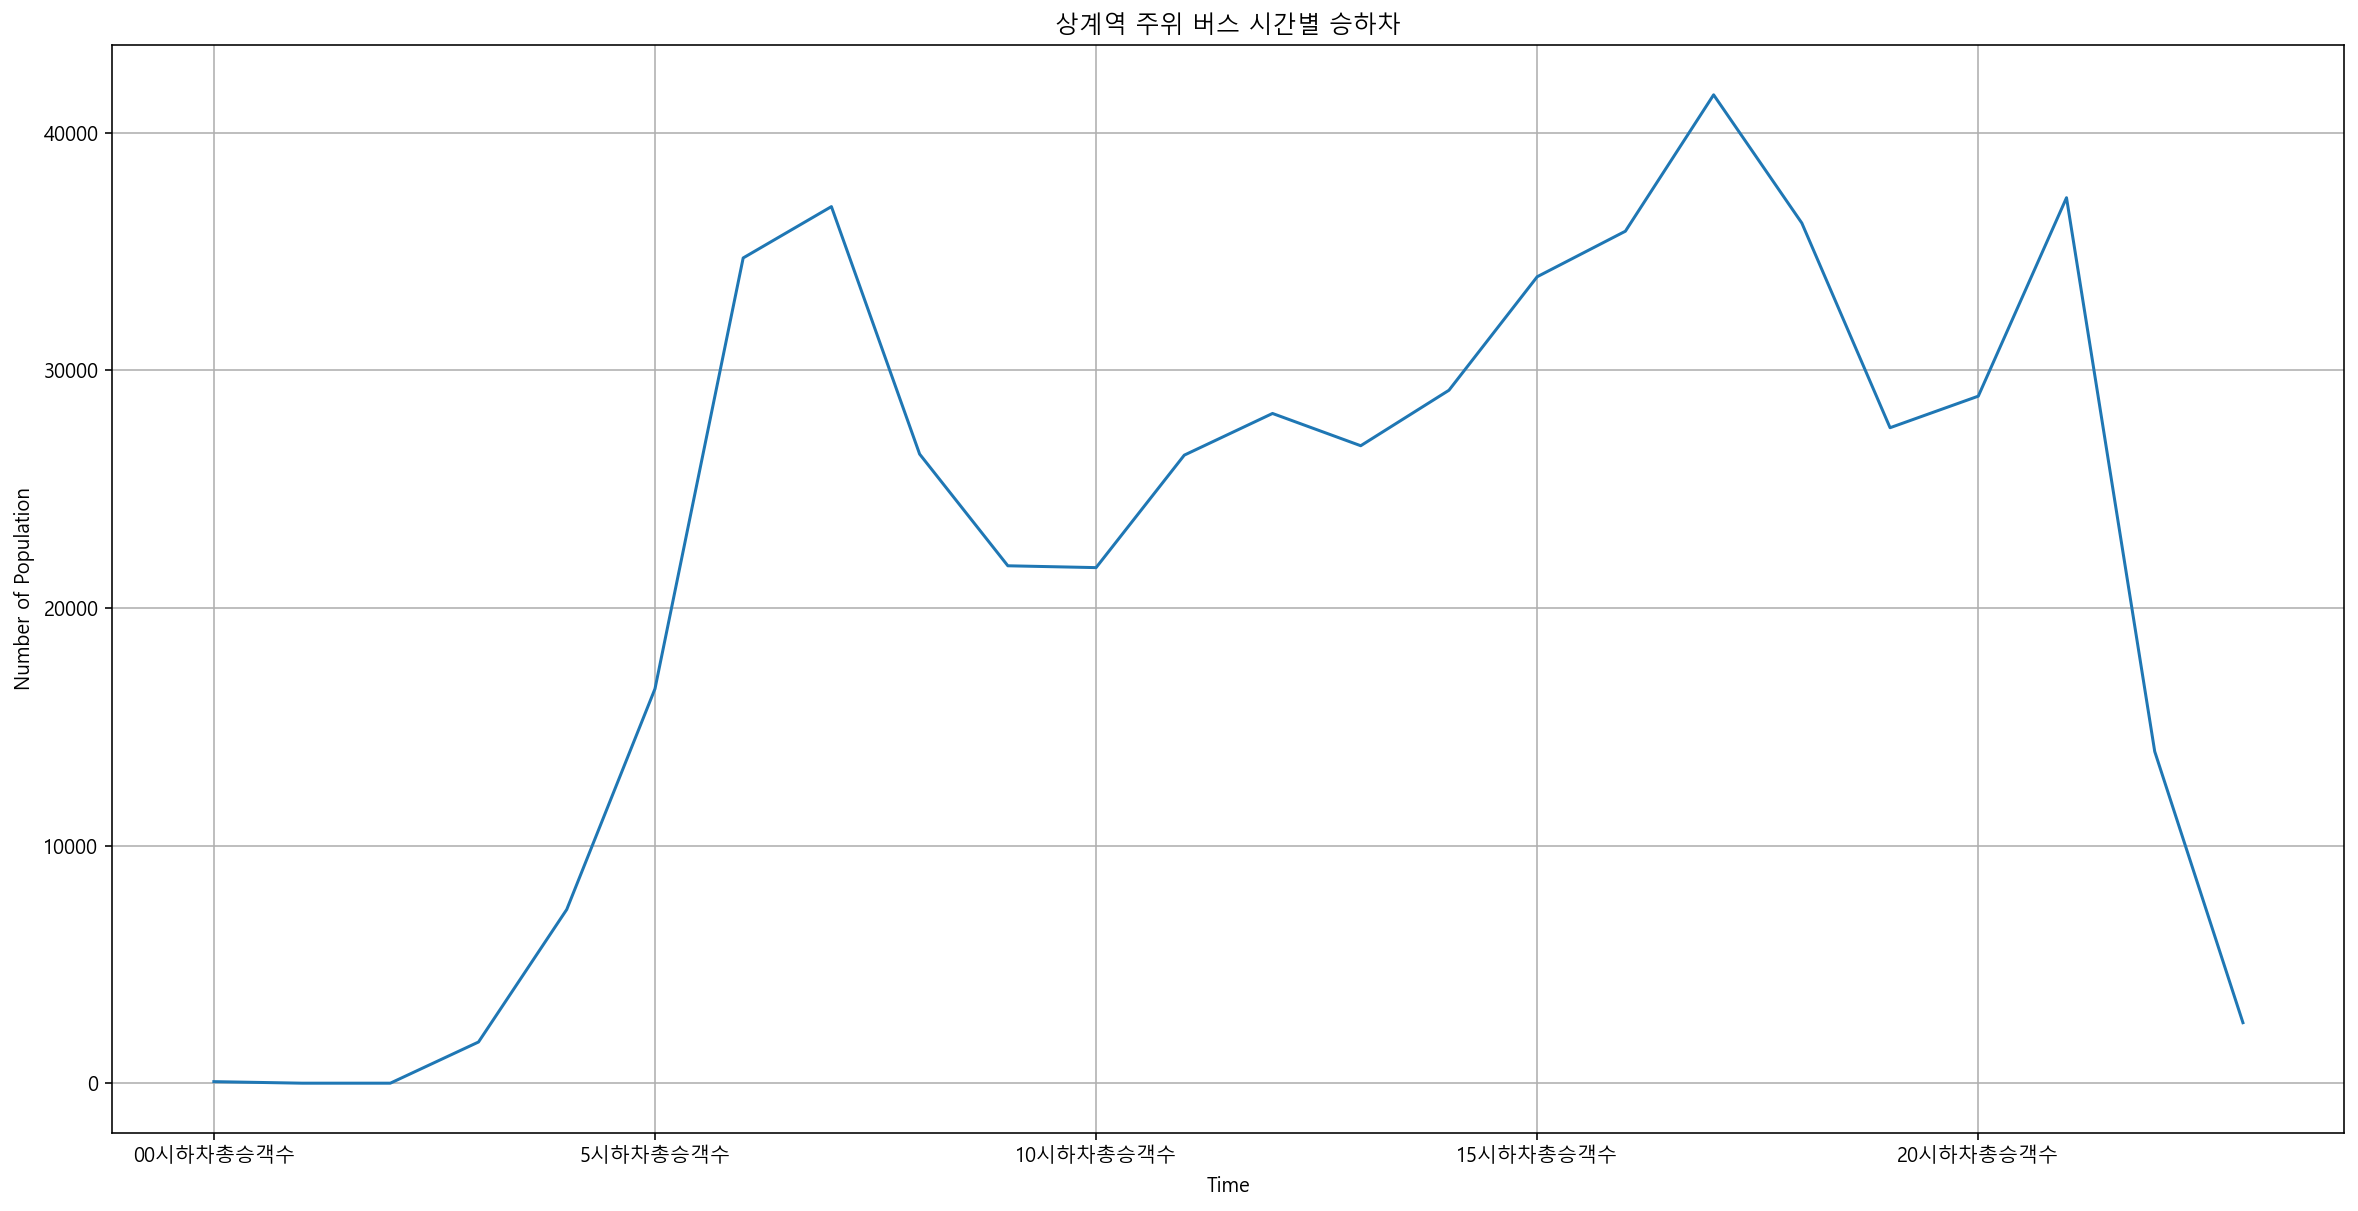

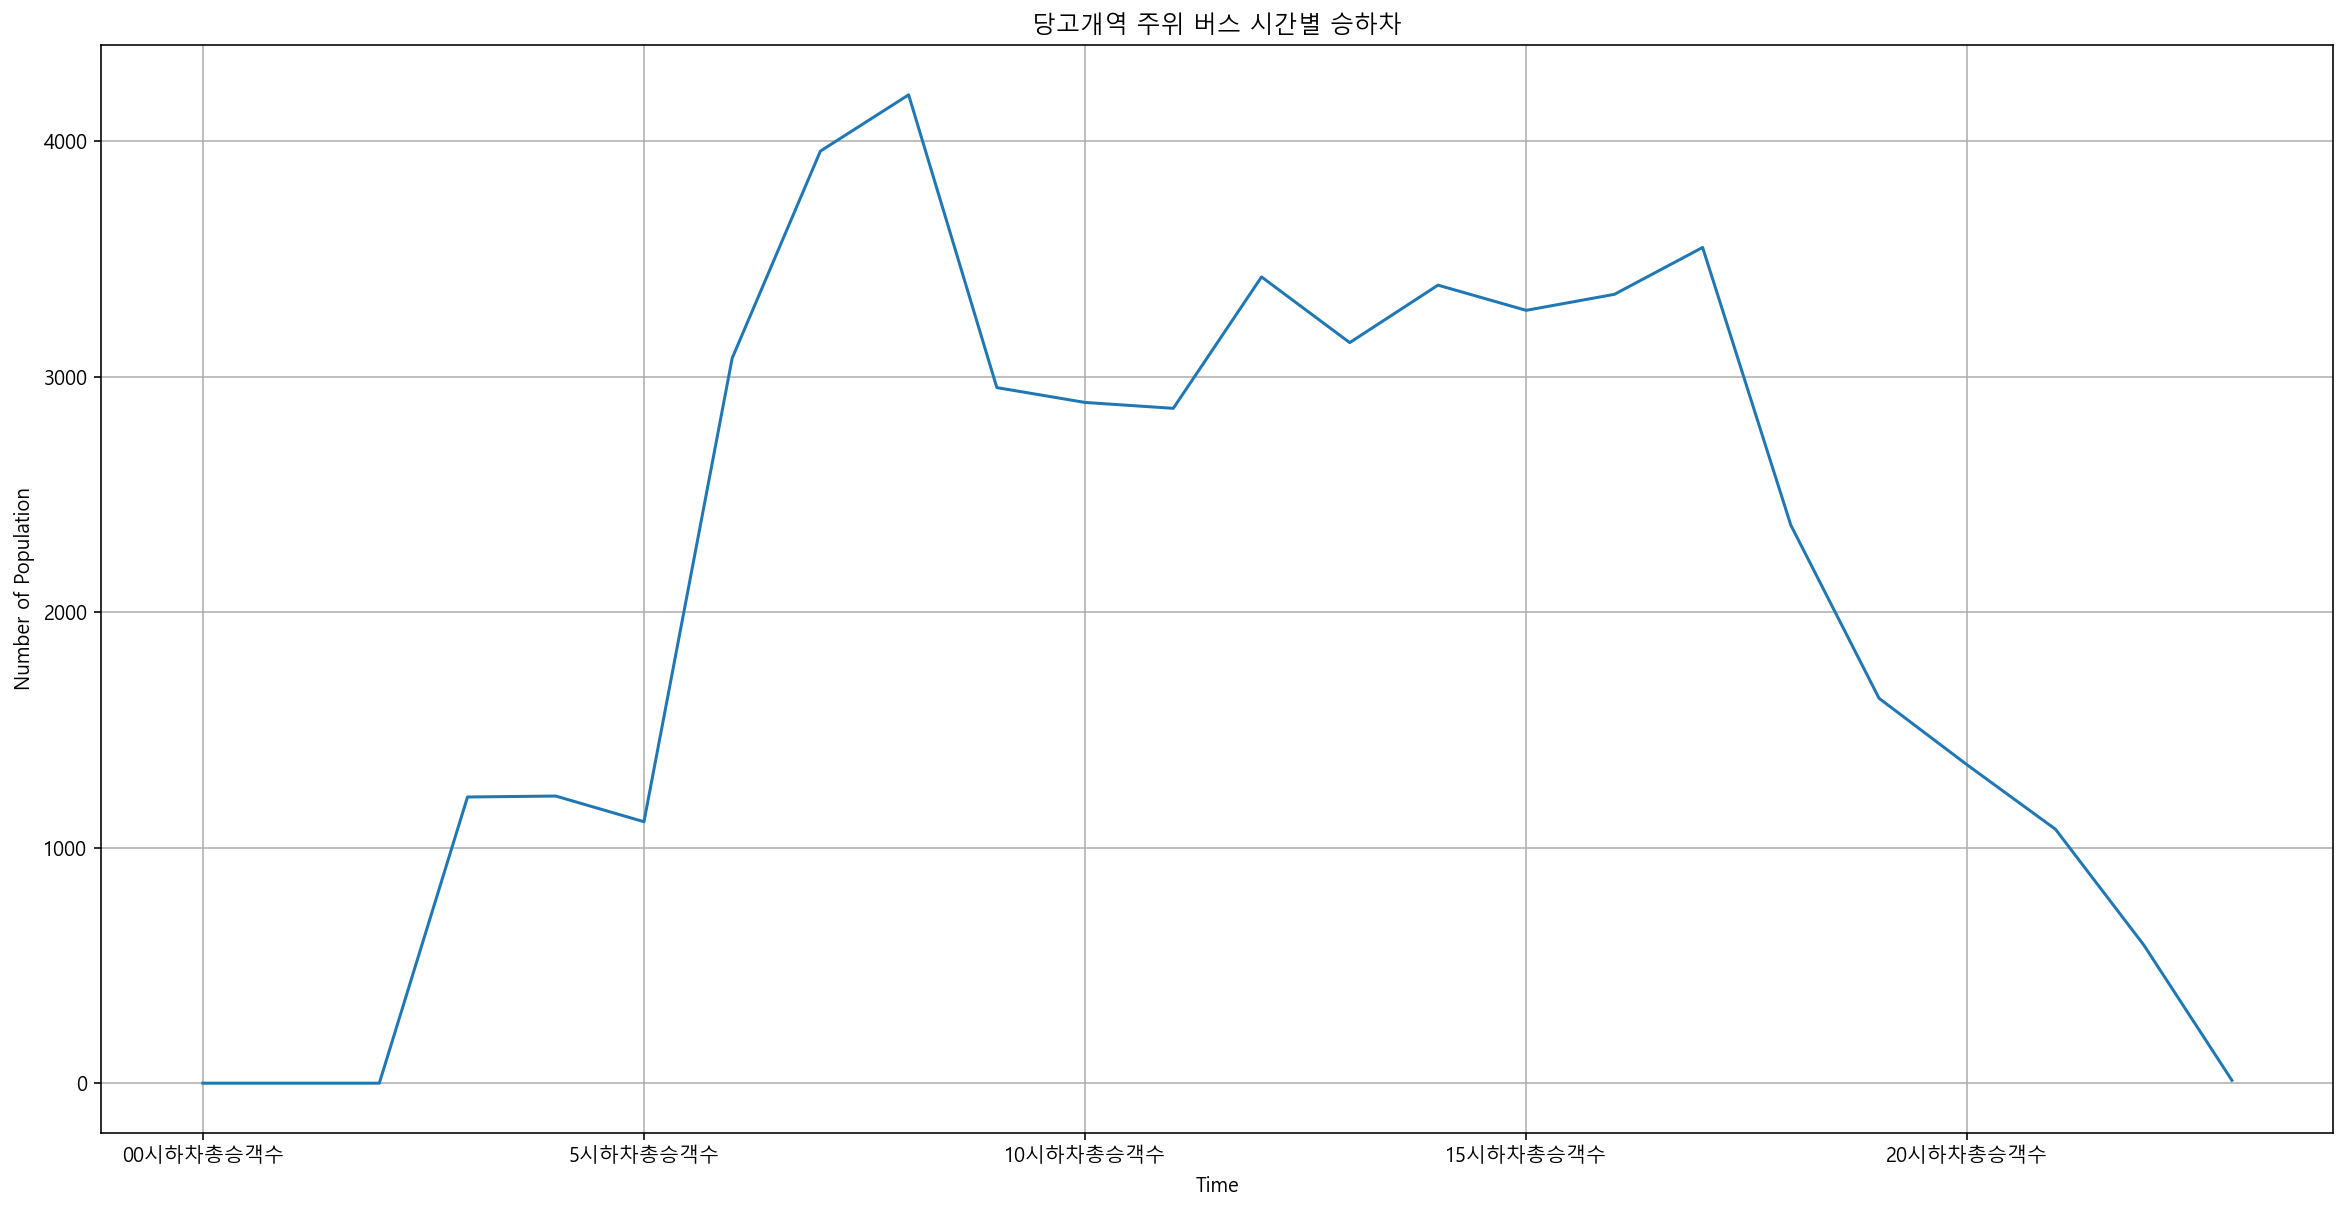

In [23]:
#노원, 2020 5월 분포 보자
for station in Seoul_nowon:
    drawing(bt_down_8, station)

# 한 역만 보려면...

In [24]:
def station_pop(df, station):#역은 문자열로 넣어야 함
    return pd.DataFrame(df.loc[station][1:])

In [25]:
station_pop(bt_down_8, '명동')

,명동
00시하차총승객수,99
1시하차총승객수,40
2시하차총승객수,68
3시하차총승객수,183
4시하차총승객수,502
5시하차총승객수,751
6시하차총승객수,1521
7시하차총승객수,2435
8시하차총승객수,2432
9시하차총승객수,2315


# 원하는 시간에 원하는 역 인원 뽑는 함수

In [26]:
#연속된 시간 보고싶으면 시작시간 끝시간 쓰면 됨 
def time_pop(df, station, time1, *time2):#뒤의 3개 인풋은 문자열로 넣어야 하고, down은 'x시하차' up은 'x시승차'로 넣어야 함
    if time2:
        return pd.DataFrame(df.loc[station]['{}총승객수'.format(time1):'{}총승객수'.format(time2[0])])
    else:
        return df.loc[station]['{}총승객수'.format(time1)]

In [27]:
time_pop(bt_down_1, '명동', '5시하차')

2999

In [28]:
time_pop(bt_down_1, '명동', '5시하차', '7시하차')

,명동
5시하차총승객수,2999
6시하차총승객수,2909
7시하차총승객수,5359


In [29]:
time_pop(bt_up_8, '명동', '5시승차', '13시승차')

,명동
5시승차총승객수,2959
6시승차총승객수,2824
7시승차총승객수,5458
8시승차총승객수,9859
9시승차총승객수,8193
10시승차총승객수,6767
11시승차총승객수,7556
12시승차총승객수,7796
13시승차총승객수,7846


# 월별 데이터지만 회귀한번 해볼까..

In [30]:
time2002

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,202002,20200201,1114052000,소공동,1393.34,1144.91,900.51,721.78,784.43,1479.50,...,7705.97,7389.93,7322.32,8070.40,6488.70,4890.46,4304.38,3683.57,4002.98,2894.37
1,202002,20200201,1114054000,회현동,1586.96,1170.81,898.06,682.55,763.84,2089.57,...,11846.92,11701.47,11364.08,10725.66,8140.20,6399.03,5566.32,5533.92,4715.67,3334.92
2,202002,20200201,1114055000,명동,1534.52,1139.65,1015.20,799.85,773.06,1506.43,...,11188.64,10109.60,10587.30,10697.87,8781.11,6420.97,5091.03,5025.40,4415.18,3415.71
3,202002,20200201,1114057000,필동,1321.52,933.49,803.40,690.18,754.61,954.29,...,4931.33,4989.49,5010.95,5702.29,5089.43,3959.67,3151.50,3048.29,2951.06,2017.30
4,202002,20200201,1114058000,장충동,629.17,561.68,454.77,372.22,388.65,627.47,...,3423.15,3030.29,2882.15,3099.08,2584.95,1811.88,1669.96,1664.65,1164.56,976.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,202002,20200229,2726066100,범물1동,485.96,388.68,348.90,289.15,330.33,409.87,...,1809.52,1957.39,2093.72,2040.10,1849.73,1265.70,1041.32,905.75,712.61,628.77
1997,202002,20200229,2726066200,범물2동,947.07,896.23,851.62,794.46,783.83,787.49,...,1270.22,1276.28,1296.90,1351.59,1351.30,1246.78,1140.83,1108.22,1031.76,1024.64
1998,202002,20200229,2726067000,고산1동,2162.60,1758.41,1318.00,1203.27,1040.30,1184.69,...,5968.43,6474.89,6595.47,6772.06,6391.21,5232.65,4209.28,3874.91,3198.69,2708.60
1999,202002,20200229,2726068000,고산2동,2599.19,2085.08,1549.93,1509.08,1406.71,1800.18,...,11057.90,11587.25,12424.47,11691.56,10228.67,7664.57,6384.05,5682.11,4365.86,3399.61


### 일단 명동역과 명동의 corr()돌려보자

In [31]:
#명동의 2020년 2월 유동인구데이터 총합
MD2002_total = time2002[time2002['HDONG_NM']=='명동'].iloc[:,3:].groupby('HDONG_NM').sum()
MD2002_total

,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,TMST_08,TMST_09,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
HDONG_NM,,,,,,,,,,,,,,,,,,,,,
명동,43920.04,26205.07,19063.49,15595.44,24501.15,56305.1,154402.35,428772.57,925300.16,584972.49,...,312157.75,297925.86,292522.33,317403.11,399624.96,271738.46,172888.76,155434.39,134578.3,93233.55


In [32]:
MD_col = MD2002_total.columns

In [33]:
MD2002_bus = station_pop(bt_down_5, '명동').T
MD2002_bus

,00시하차총승객수,1시하차총승객수,2시하차총승객수,3시하차총승객수,4시하차총승객수,5시하차총승객수,6시하차총승객수,7시하차총승객수,8시하차총승객수,9시하차총승객수,...,14시하차총승객수,15시하차총승객수,16시하차총승객수,17시하차총승객수,18시하차총승객수,19시하차총승객수,20시하차총승객수,21시하차총승객수,22시하차총승객수,23시하차총승객수
명동,326,161,122,132,1177,3208,2989,5471,11953,9306,...,6957,6966,6765,6498,7093,5223,3579,3001,2308,1150


In [34]:
MD2002_bus.columns = MD_col
MD2002_bus

,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,TMST_08,TMST_09,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
명동,326,161,122,132,1177,3208,2989,5471,11953,9306,...,6957,6966,6765,6498,7093,5223,3579,3001,2308,1150


In [35]:
test = pd.concat([MD2002_total, MD2002_bus],axis=0).T
test

,명동,명동
TMST_00,43920.04,326.0
TMST_01,26205.07,161.0
TMST_02,19063.49,122.0
TMST_03,15595.44,132.0
TMST_04,24501.15,1177.0
TMST_05,56305.10,3208.0
TMST_06,154402.35,2989.0
TMST_07,428772.57,5471.0
TMST_08,925300.16,11953.0
TMST_09,584972.49,9306.0


In [36]:
test.corr()

,명동,명동
명동,1.000000,0.934676
명동,0.934676,1.000000


### 노원도 해보자

In [37]:
#노원역이 포함된 상계2동의 2020년 2월 유동인구데이터 총합
NW2002_total = time2002[time2002['HDONG_NM']=='상계2동'].iloc[:,3:].groupby('HDONG_NM').sum()
NW2002_total

,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,TMST_08,TMST_09,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
HDONG_NM,,,,,,,,,,,,,,,,,,,,,
상계2동,37051.84,22923.33,17260.26,14510.29,14907.01,24074.3,42881.4,77201.0,130416.79,132071.68,...,133606.53,134853.72,142705.5,159062.7,197681.17,183627.08,119540.96,98430.95,86164.69,61231.39


In [38]:
NW_col = NW2002_total.columns

In [39]:
NW2002_bus = station_pop(bt_down_5, '노원').T
NW2002_bus

,00시하차총승객수,1시하차총승객수,2시하차총승객수,3시하차총승객수,4시하차총승객수,5시하차총승객수,6시하차총승객수,7시하차총승객수,8시하차총승객수,9시하차총승객수,...,14시하차총승객수,15시하차총승객수,16시하차총승객수,17시하차총승객수,18시하차총승객수,19시하차총승객수,20시하차총승객수,21시하차총승객수,22시하차총승객수,23시하차총승객수
노원,4276,1566,1106,840,2207,8486,17331,34974,51460,44392,...,40375,40252,38862,41487,45617,35201,22691,18536,17225,9859


In [40]:
NW2002_bus.columns = NW_col
NW2002_bus

,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,TMST_08,TMST_09,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
노원,4276,1566,1106,840,2207,8486,17331,34974,51460,44392,...,40375,40252,38862,41487,45617,35201,22691,18536,17225,9859


In [41]:
test = pd.concat([NW2002_total, NW2002_bus],axis=0).T
test

,상계2동,노원
TMST_00,37051.84,4276.0
TMST_01,22923.33,1566.0
TMST_02,17260.26,1106.0
TMST_03,14510.29,840.0
TMST_04,14907.01,2207.0
TMST_05,24074.30,8486.0
TMST_06,42881.40,17331.0
TMST_07,77201.00,34974.0
TMST_08,130416.79,51460.0
TMST_09,132071.68,44392.0


In [42]:
test.corr()

,상계2동,노원
상계2동,1.000000,0.896701
노원,0.896701,1.000000


### 수락산역도...

In [43]:
#수락산의 2020년 2월 유동인구데이터 총합
SRS2002_total = time2002[time2002['HDONG_NM']=='상계1동'].iloc[:,3:].groupby('HDONG_NM').sum()
SRS2002_total

,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,TMST_08,TMST_09,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
HDONG_NM,,,,,,,,,,,,,,,,,,,,,
상계1동,46056.58,29763.15,22022.94,18516.69,20167.14,33512.09,59107.44,108169.81,169285.26,150257.81,...,157170.08,164407.38,174639.64,200301.8,227633.42,206551.7,137619.55,115428.15,100081.76,75494.67


In [44]:
SRS_col = SRS2002_total.columns

In [45]:
SRS2002_bus = station_pop(bt_down_5, '수락산').T
SRS2002_bus

,00시하차총승객수,1시하차총승객수,2시하차총승객수,3시하차총승객수,4시하차총승객수,5시하차총승객수,6시하차총승객수,7시하차총승객수,8시하차총승객수,9시하차총승객수,...,14시하차총승객수,15시하차총승객수,16시하차총승객수,17시하차총승객수,18시하차총승객수,19시하차총승객수,20시하차총승객수,21시하차총승객수,22시하차총승객수,23시하차총승객수
수락산,5385,2381,441,87,1086,4180,8924,15809,25550,19219,...,17394,18764,20343,22754,27782,25723,18372,16430,15816,10451


In [46]:
SRS2002_bus.columns = SRS_col
SRS2002_bus

,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,TMST_07,TMST_08,TMST_09,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
수락산,5385,2381,441,87,1086,4180,8924,15809,25550,19219,...,17394,18764,20343,22754,27782,25723,18372,16430,15816,10451


In [47]:
test = pd.concat([SRS2002_total, SRS2002_bus],axis=0).T
test

,상계1동,수락산
TMST_00,46056.58,5385.0
TMST_01,29763.15,2381.0
TMST_02,22022.94,441.0
TMST_03,18516.69,87.0
TMST_04,20167.14,1086.0
TMST_05,33512.09,4180.0
TMST_06,59107.44,8924.0
TMST_07,108169.81,15809.0
TMST_08,169285.26,25550.0
TMST_09,150257.81,19219.0


In [48]:
test.corr()

,상계1동,수락산
상계1동,1.000000,0.970814
수락산,0.970814,1.000000


### 결론:월별 합계로 해서 역하나에 그 동 하나 corr()돌리니 되게 잘맞는 편인데, 이게 일별예측, 시간별 예측까지 갈 수 있을지 모르겠다.

### 다만, 동-지하철-버스 3개가 연동되어서 지하철+버스의 데이터가 동을 맞추게 하는건 수범형과 데이터 공유 후 해봐야할 듯 하고, 의미가 있을지도 생각해 봐야 할 듯.